<a href="https://colab.research.google.com/gist/pouyahosseinzadeh/090fe618e3a3277f166606c2e2a48b3d/prediction-of-high-impact-solar-energetic-particle-events-using-multimodal-time-series-data-fusion-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import random

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
# from sktime.classification.interval_based import TimeSeriesForestClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.optimizers import Adam
import random

In [ ]:
!pip install tsfresh
!pip install sktime
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.7 MB/s eta 0:00:00


In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

# Univariate Time series

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

1        2        3        4        5        6        7        8  \
0   0.00486  0.00412  0.00509  0.00546  0.00564  0.00509  0.00673  0.00644   
1   0.00509  0.00470  0.00471  0.00501  0.00463  0.00630  0.00546  0.00506   
2   0.00411  0.00465  0.00492  0.00516  0.00546  0.00524  0.00509  0.00465   
3   0.00434  0.00374  0.00441  0.00465  0.00442  0.00499  0.00386  0.00442   
4   0.00614  0.00434  0.00427  0.00434  0.00434  0.00465  0.00564  0.00397   
..      ...      ...      ...      ...      ...      ...      ...      ...   
69  0.00292  0.00318  0.00314  0.00217  0.00304  0.00277  0.00292  0.00247   
70  0.00247  0.00246  0.00374  0.00329  0.00329  0.00311  0.00195  0.00329   
71  0.00262  0.00362  0.00262  0.00284  0.00289  0.00239  0.00322  0.00165   
72  0.00254  0.00307  0.00311  0.00284  0.00269  0.00217  0.00217  0.00247   
73  0.00284  0.00260  0.00307  0.00224  0.00329  0.00231  0.00292  0.00352   

          9       10  ...       63       64       65       66       67  \
0   0.00644  0.00442  ...  0.00681  0.00479  0.00561  0.00586  0.00592   
1   0.00569  0.00442  ...  0.00516  0.00479  0.00524  0.00506  0.00486   
2   0.00397  0.00427  ...  0.00427  0.00434  0.00494  0.00465  0.00499   
3   0.00465  0.00434  ...  0.00398  0.00427  0.00501  0.00501  0.00388   
4   0.00486  0.00442  ...  0.00397  0.00398  0.00344  0.00397  0.00367   
..      ...      ...  ...      ...      ...      ...      ...      ...   
69  0.00333  0.00314  ...  0.00268  0.00307  0.00187  0.00304  0.00247   
70  0.00275  0.00277  ...  0.00246  0.00277  0.00329  0.00188  0.00224   
71  0.00268  0.00292  ...  0.00299  0.00292  0.00239  0.00275  0.00284   
72  0.00254  0.00326  ...  0.00210  0.00318  0.00217  0.00239  0.00333   
73  0.00282  0.00224  ...  0.00304  0.00187  0.00299  0.00282  0.00292   

         68       69       70       71  event  
0   0.00465  0.00543  0.00598  0.00546    SEP  
1   0.00555  0.00506  0.00630  0.00540    SEP  
2   0.00614  0.00389  0.00419  0.00470    SEP  
3   0.00337  0.00449  0.00456  0.00494    SEP  
4   0.00448  0.00465  0.00442  0.00485    SEP  
..      ...      ...      ...      ...    ...  
69  0.00239  0.00304  0.00329  0.00262   NSEP  
70  0.00269  0.00292  0.00246  0.00337   NSEP  
71  0.00232  0.00268  0.00292  0.00284   NSEP  
72  0.00254  0.00307  0.00333  0.00277   NSEP  
73  0.00277  0.00202  0.00391  0.00224   NSEP  

[74 rows x 72 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lst_accu_stratified_TS_Uni_TSF = []
lst_accuBalanced_stratified_TS_Uni_TSF = []
lst_f1_stratified_TS_Uni_TSF = []
precision_all = []
recall_all = []
lst_TSS_stratified_A_TSF = []
lst_HSS_stratified_A_TSF = []


index = 0
for train_index, test_index in skf.split(X, y):
    index = index + 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)



    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_TS_Uni_TSF.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_TS_Uni_TSF.append(balanced_accuracy_score(y_test, pred_A)) # Balanced Accuracy
    f1_TSF_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_TS_Uni_TSF.append(f1_TSF_A)
    precision_TSF_A = precision_score(y_test, pred_A, average = 'macro')
    precision_all.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test, pred_A, average = 'macro')
    recall_all.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF.append(HSS_TSF_A)


In [ ]:
import numpy as np

ACC_TSF_TS_Uni = round(np.mean(lst_accu_stratified_TS_Uni_TSF), 2)
ACC_TSF_TS_Uni

0.78

In [ ]:
import numpy as np

F1_TSF_TS_Uni = round(np.mean(lst_f1_stratified_TS_Uni_TSF), 2)
F1_TSF_TS_Uni

0.78

In [ ]:
import numpy as np

precision_all_Uni = precision_all

precision_TSF_TS_Uni = round(np.mean(precision_all_Uni), 2)
precision_TSF_TS_Uni

0.79

In [ ]:
import numpy as np

recall_all_Uni = recall_all

recall_TSF_TS_Uni = round(np.mean(recall_all_Uni), 2)
recall_TSF_TS_Uni

0.79

In [ ]:
import numpy as np

lst_TSS_stratified_A_TSF_Uni = lst_TSS_stratified_A_TSF

TSS_TSF_TS_Uni = round(np.mean(lst_TSS_stratified_A_TSF_Uni), 2)
TSS_TSF_TS_Uni

0.57

In [ ]:
import numpy as np

lst_HSS_stratified_A_TSF_Uni = lst_HSS_stratified_A_TSF

HSS_TSF_TS_Uni = round(np.mean(lst_HSS_stratified_A_TSF_Uni), 2)
HSS_TSF_TS_Uni

0.57

# Imbalanced

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni_High_for_Imbalanced.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

1        2        3        4        5        6        7        8  \
0   0.00486  0.00412  0.00509  0.00546  0.00564  0.00509  0.00673  0.00644   
1   0.00509  0.00470  0.00471  0.00501  0.00463  0.00630  0.00546  0.00506   
2   0.00411  0.00465  0.00492  0.00516  0.00546  0.00524  0.00509  0.00465   
3   0.00434  0.00374  0.00441  0.00465  0.00442  0.00499  0.00386  0.00442   
4   0.00614  0.00434  0.00427  0.00434  0.00434  0.00465  0.00564  0.00397   
..      ...      ...      ...      ...      ...      ...      ...      ...   
95  0.00269  0.00275  0.00337  0.00344  0.00297  0.00232  0.00254  0.00333   
96  0.00359  0.00262  0.00314  0.00203  0.00262  0.00299  0.00362  0.00314   
97  0.00322  0.00277  0.00239  0.00376  0.00247  0.00239  0.00275  0.00322   
98  0.00247  0.00239  0.00262  0.00337  0.00231  0.00224  0.00224  0.00232   
99  0.00322  0.00289  0.00329  0.00314  0.00398  0.00224  0.00337  0.00262   

          9       10  ...       63       64       65       66       67  \
0   0.00644  0.00442  ...  0.00681  0.00479  0.00561  0.00586  0.00592   
1   0.00569  0.00442  ...  0.00516  0.00479  0.00524  0.00506  0.00486   
2   0.00397  0.00427  ...  0.00427  0.00434  0.00494  0.00465  0.00499   
3   0.00465  0.00434  ...  0.00398  0.00427  0.00501  0.00501  0.00388   
4   0.00486  0.00442  ...  0.00397  0.00398  0.00344  0.00397  0.00367   
..      ...      ...  ...      ...      ...      ...      ...      ...   
95  0.00277  0.00307  ...  0.00247  0.00210  0.00299  0.00318  0.00224   
96  0.00210  0.00333  ...  0.00359  0.00282  0.00307  0.00269  0.00187   
97  0.00307  0.00326  ...  0.00247  0.00239  0.00247  0.00352  0.00262   
98  0.00217  0.00247  ...  0.00314  0.00262  0.00299  0.00289  0.00262   
99  0.00376  0.00299  ...  0.00337  0.00329  0.00314  0.00289  0.00239   

         68       69       70       71  event  
0   0.00465  0.00543  0.00598  0.00546    SEP  
1   0.00555  0.00506  0.00630  0.00540    SEP  
2   0.00614  0.00389  0.00419  0.00470    SEP  
3   0.00337  0.00449  0.00456  0.00494    SEP  
4   0.00448  0.00465  0.00442  0.00485    SEP  
..      ...      ...      ...      ...    ...  
95  0.00232  0.00195  0.00269  0.00269   NSEP  
96  0.00275  0.00262  0.00299  0.00275   NSEP  
97  0.00260  0.00262  0.00262  0.00304   NSEP  
98  0.00232  0.00260  0.00389  0.00314   NSEP  
99  0.00314  0.00304  0.00322  0.00314   NSEP  

[100 rows x 72 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lst_accu_stratified_TS_Uni_TSF_IMB = []
lst_accuBalanced_stratified_TS_Uni_TSF_IMB = []
lst_f1_stratified_TS_Uni_TSF_IMB = []
precision_all_IMB = []
recall_all_IMB = []
lst_TSS_stratified_A_TSF_IMB = []
lst_HSS_stratified_A_TSF_IMB = []


index = 0
for train_index, test_index in skf.split(X, y):
    index = index + 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)



    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_TS_Uni_TSF_IMB.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_TS_Uni_TSF_IMB.append(balanced_accuracy_score(y_test, pred_A)) # Balanced Accuracy
    f1_TSF_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_TS_Uni_TSF_IMB.append(f1_TSF_A)
    precision_TSF_A = precision_score(y_test, pred_A, average = 'macro')
    precision_all_IMB.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test, pred_A, average = 'macro')
    recall_all_IMB.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF_IMB.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF_IMB.append(HSS_TSF_A)



In [ ]:
import numpy as np

ACC_TSF_TS_Uni_IMB = round(np.mean(lst_accu_stratified_TS_Uni_TSF_IMB), 2)
ACC_TSF_TS_Uni_IMB

0.71

In [ ]:
import numpy as np

F1_TSF_TS_Uni_IMB = round(np.mean(lst_f1_stratified_TS_Uni_TSF_IMB), 2)
F1_TSF_TS_Uni_IMB

0.69

In [ ]:
import numpy as np

precision_all_Uni_IMB = precision_all_IMB

precision_TSF_TS_Uni_IMB = round(np.mean(precision_all_Uni_IMB), 2)
precision_TSF_TS_Uni_IMB

0.69

In [ ]:
import numpy as np

recall_all_Uni_IMB = recall_all_IMB

recall_TSF_TS_Uni_IMB = round(np.mean(recall_all_Uni_IMB), 2)
recall_TSF_TS_Uni_IMB

0.66

In [ ]:
import numpy as np

lst_TSS_stratified_A_TSF_Uni_IMB = lst_TSS_stratified_A_TSF_IMB

TSS_TSF_TS_Uni_IMB = round(np.mean(lst_TSS_stratified_A_TSF_Uni_IMB), 2)
TSS_TSF_TS_Uni_IMB

0.32

In [ ]:
import numpy as np

lst_HSS_stratified_A_TSF_Uni_IMB = lst_HSS_stratified_A_TSF_IMB

HSS_TSF_TS_Uni_IMB = round(np.mean(lst_HSS_stratified_A_TSF_Uni_IMB), 2)
HSS_TSF_TS_Uni_IMB

0.34

# Images

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

0    1    2           3         4    5    6           7  \
0    863.23944  0.0  0.0   875.12070  0.000000  0.0  0.0   997.24426   
1    862.90020  0.0  0.0   874.83154  0.000000  0.0  0.0   996.85410   
2    991.74250  0.0  0.0  1005.25150  0.000000  0.0  0.0  1151.38100   
3    990.57440  0.0  0.0  1004.53200  0.000000  0.0  0.0  1149.44630   
4   1023.94476  0.0  0.0  1038.60030  0.000000  0.0  0.0  1190.53090   
..         ...  ...  ...         ...       ...  ...  ...         ...   
69  1070.92360  0.0  0.0  1086.13890  0.024115  0.0  0.0  1244.86470   
70  1052.14010  0.0  0.0  1067.20510  0.000000  0.0  0.0  1222.77440   
71  1087.73020  0.0  0.0  1103.17960  0.000000  0.0  0.0  1264.49160   
72  1052.21410  0.0  0.0  1067.28440  0.000000  0.0  0.0  1222.47570   
73  1066.19950  0.0  0.0  1081.41670  0.001843  0.0  0.0  1239.15860   

             8    9  ...        191  192        193  194  195        196  197  \
0    820.94990  0.0  ...  366.81830  0.0  699.27580  0.0  0.0  704.31506  0.0   
1    820.75476  0.0  ...  366.68213  0.0  699.19010  0.0  0.0  704.10846  0.0   
2    941.03150  0.0  ...  413.28440  0.0  798.01447  0.0  0.0  803.52576  0.0   
3    940.53760  0.0  ...  414.21182  0.0  798.02050  0.0  0.0  803.72130  0.0   
4    971.69995  0.0  ...  425.37683  0.0  823.26850  0.0  0.0  829.25055  0.0   
..         ...  ...  ...        ...  ...        ...  ...  ...        ...  ...   
69  1016.24210  0.0  ...  444.82785  0.0  860.89830  0.0  0.0  867.14250  0.0   
70   998.51640  0.0  ...  437.73642  0.0  846.32130  0.0  0.0  852.24230  0.0   
71  1032.02580  0.0  ...  451.82272  0.0  874.26590  0.0  0.0  880.49000  0.0   
72   998.61200  0.0  ...  438.12598  0.0  846.46040  0.0  0.0  852.57410  0.0   
73  1011.76670  0.0  ...  443.19174  0.0  857.29346  0.0  0.0  863.42163  0.0   

          198        199  event  
0    8.927345  648.68900    SEP  
1    8.777816  648.49640    SEP  
2    9.978041  738.63390    SEP  
3    9.895127  738.92535    SEP  
4   10.118138  761.47940    SEP  
..        ...        ...    ...  
69  10.688278  796.42730   NSEP  
70  10.456757  783.00977   NSEP  
71  10.828060  808.78174   NSEP  
72  10.487768  783.25684   NSEP  
73  10.587038  793.16125   NSEP  

[74 rows x 201 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lst_accu_stratified_Sequence_TSF = []
lst_accuBalanced_stratified_Sequence_TSF = []
lst_f1_stratified_Sequence_TSF = []
precision_all = []
recall_all = []
lst_TSS_stratified_A_TSF = []
lst_HSS_stratified_A_TSF = []



index = 0
for train_index, test_index in skf.split(X, y):
    index = index + 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)



    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_Sequence_TSF.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_Sequence_TSF.append(balanced_accuracy_score(y_test, pred_A)) # Balanced Accuracy
    f1_TSF_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_Sequence_TSF.append(f1_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    precision_TSF_A = precision_score(y_test, pred_A, average = 'macro')
    precision_all.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test, pred_A, average = 'macro')
    recall_all.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF.append(HSS_TSF_A)



In [ ]:
import numpy as np

ACC_TSF_Sequence = round(np.mean(lst_accu_stratified_Sequence_TSF), 2)
ACC_TSF_Sequence

0.65

In [ ]:
import numpy as np

F1_TSF_Sequence = round(np.mean(lst_f1_stratified_Sequence_TSF), 2)
F1_TSF_Sequence

0.64

In [ ]:
import numpy as np

lst_precision_stratified_Sequence_TSF = precision_all

precision_TSF_Sequence = round(np.mean(lst_precision_stratified_Sequence_TSF), 2)
precision_TSF_Sequence

0.66

In [ ]:
import numpy as np

lst_recall_stratified_Sequence_TSF = recall_all

recall_TSF_Sequence = round(np.mean(lst_recall_stratified_Sequence_TSF), 2)
recall_TSF_Sequence

0.65

In [ ]:
import numpy as np

lst_TSS_stratified_Sequence_TSF = lst_TSS_stratified_A_TSF

TSS_TSF_Sequence = round(np.mean(lst_TSS_stratified_Sequence_TSF), 2)
TSS_TSF_Sequence

0.29

In [ ]:
import numpy as np

lst_HSS_stratified_Sequence_TSF = lst_HSS_stratified_A_TSF

HSS_TSF_Sequence = round(np.mean(lst_HSS_stratified_Sequence_TSF), 2)
HSS_TSF_Sequence

0.29

# Imbalanced

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/Sequence_100MeV_for_Imbalanced.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/Sequence_NSEP_High_for_Imbalanced.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

0    1    2    3    4         5    6          7         8    9  \
0    990.16833  0.0  0.0  0.0  0.0  0.154457  0.0  761.63153  0.000000  0.0   
1    989.83440  0.0  0.0  0.0  0.0  0.112975  0.0  761.40960  0.000000  0.0   
2   1143.03190  0.0  0.0  0.0  0.0  0.000000  0.0  871.18360  0.000000  0.0   
3   1141.12110  0.0  0.0  0.0  0.0  0.000000  0.0  870.89630  0.000000  0.0   
4   1181.77230  0.0  0.0  0.0  0.0  0.000000  0.0  899.05540  0.017642  0.0   
..         ...  ...  ...  ...  ...       ...  ...        ...       ...  ...   
95  1277.15110  0.0  0.0  0.0  0.0  0.000000  0.0  970.00520  0.000000  0.0   
96  1284.51650  0.0  0.0  0.0  0.0  0.000000  0.0  974.93460  0.029071  0.0   
97  1280.02700  0.0  0.0  0.0  0.0  0.000000  0.0  971.54560  0.051680  0.0   
98  1288.58480  0.0  0.0  0.0  0.0  0.000000  0.0  978.39310  0.000000  0.0   
99  1286.30960  0.0  0.0  0.0  0.0  0.000000  0.0  976.13830  0.000000  0.0   

    ...         191  192        193  194        195  196         197  \
0   ...   986.17010  0.0  610.99420  0.0  612.44180  0.0   964.18910   
1   ...   985.96466  0.0  610.95605  0.0  612.42330  0.0   963.98816   
2   ...  1138.38680  0.0  694.63830  0.0  696.30786  0.0  1111.91220   
3   ...  1136.46630  0.0  695.24480  0.0  696.78894  0.0  1110.31260   
4   ...  1176.69750  0.0  716.30945  0.0  717.77094  0.0  1149.40930   
..  ...         ...  ...        ...  ...        ...  ...         ...   
95  ...  1271.97110  0.0  771.80347  0.0  773.26434  0.0  1242.03090   
96  ...  1279.33390  0.0  775.32280  0.0  776.88330  0.0  1249.10400   
97  ...  1274.81100  0.0  772.83466  0.0  774.38260  0.0  1244.68530   
98  ...  1283.32130  0.0  778.40314  0.0  779.89484  0.0  1253.18050   
99  ...  1280.91150  0.0  776.16670  0.0  777.78440  0.0  1250.62920   

           198  199  event  
0    778.37260  0.0    SEP  
1    778.01380  0.0    SEP  
2    890.87134  0.0    SEP  
3    890.63600  0.0    SEP  
4    919.67194  0.0    SEP  
..         ...  ...    ...  
95   992.45100  0.0   NSEP  
96   997.55540  0.0   NSEP  
97   994.16050  0.0   NSEP  
98  1001.18646  0.0   NSEP  
99   998.78980  0.0   NSEP  

[100 rows x 201 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lst_accu_stratified_Sequence_TSF_IMB = []
lst_accuBalanced_stratified_Sequence_TSF_IMB = []
lst_f1_stratified_Sequence_TSF_IMB = []
precision_all_IMB = []
recall_all_IMB = []
lst_TSS_stratified_A_TSF_IMB = []
lst_HSS_stratified_A_TSF_IMB = []


index = 0
for train_index, test_index in skf.split(X, y):
    index = index + 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)



    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_Sequence_TSF_IMB.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_Sequence_TSF_IMB.append(balanced_accuracy_score(y_test, pred_A)) # Balanced Accuracy
    f1_TSF_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_Sequence_TSF_IMB.append(f1_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    precision_TSF_A = precision_score(y_test, pred_A, average = 'macro')
    precision_all_IMB.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test, pred_A, average = 'macro')
    recall_all_IMB.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF_IMB.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF_IMB.append(HSS_TSF_A)



In [ ]:
import numpy as np

ACC_TSF_Sequence_IMB = round(np.mean(lst_accu_stratified_Sequence_TSF_IMB), 2)
ACC_TSF_Sequence_IMB

0.62

In [ ]:
import numpy as np

F1_TSF_Sequence_IMB = round(np.mean(lst_f1_stratified_Sequence_TSF_IMB), 2)
F1_TSF_Sequence_IMB

0.62

In [ ]:
import numpy as np

lst_precision_stratified_Sequence_TSF_IMB = precision_all_IMB

precision_TSF_Sequence_IMB = round(np.mean(lst_precision_stratified_Sequence_TSF_IMB), 2)
precision_TSF_Sequence_IMB

0.6

In [ ]:
import numpy as np

lst_recall_stratified_Sequence_TSF_IMB = recall_all_IMB

recall_TSF_Sequence_IMB = round(np.mean(lst_recall_stratified_Sequence_TSF_IMB), 2)
recall_TSF_Sequence_IMB

0.6

In [ ]:
import numpy as np

lst_TSS_stratified_Sequence_TSF_IMB = lst_TSS_stratified_A_TSF_IMB

TSS_TSF_Sequence_IMB = round(np.mean(lst_TSS_stratified_Sequence_TSF_IMB), 2)
TSS_TSF_Sequence_IMB

0.2

In [ ]:
import numpy as np

lst_HSS_stratified_Sequence_TSF_IMB = lst_HSS_stratified_A_TSF_IMB

HSS_TSF_Sequence_IMB = round(np.mean(lst_HSS_stratified_Sequence_TSF_IMB), 2)
HSS_TSF_Sequence_IMB

0.2

# Univariate Feature Concatenation

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
SEP_df_B = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
SEP_df = pd.concat([SEP_df_A, SEP_df_B], axis=1)
SEP_df.columns = range(SEP_df.columns.size)
SEP_df

0    1    2           3         4    5    6           7    \
0    863.23944  0.0  0.0   875.12070  0.000000  0.0  0.0   997.24426   
1    862.90020  0.0  0.0   874.83154  0.000000  0.0  0.0   996.85410   
2    991.74250  0.0  0.0  1005.25150  0.000000  0.0  0.0  1151.38100   
3    990.57440  0.0  0.0  1004.53200  0.000000  0.0  0.0  1149.44630   
4   1023.94476  0.0  0.0  1038.60030  0.000000  0.0  0.0  1190.53090   
5   1074.94470  0.0  0.0  1090.11900  0.000000  0.0  0.0  1249.47340   
6   1099.39400  0.0  0.0  1114.76440  0.000000  0.0  0.0  1278.22890   
7   1093.17190  0.0  0.0  1108.40530  0.000000  0.0  0.0  1270.71570   
8   1065.33010  0.0  0.0  1080.45470  0.000000  0.0  0.0  1238.33400   
9   1083.09700  0.0  0.0  1098.51070  0.105838  0.0  0.0  1260.19420   
10  1109.53110  0.0  0.0  1125.28590  0.000000  0.0  0.0  1291.10680   
11  1111.47860  0.0  0.0  1127.10930  0.010735  0.0  0.0  1293.34960   
12  1122.44870  0.0  0.0  1138.21670  0.020775  0.0  0.0  1306.37600   
13  1078.94140  0.0  0.0  1094.23950  0.057162  0.0  0.0  1254.51160   
14  1051.55420  0.0  0.0  1066.34030  0.000000  0.0  0.0  1221.92810   
15  1033.43270  0.0  0.0  1047.94820  0.000000  0.0  0.0  1200.30750   
16  1027.49520  0.0  0.0  1042.07020  0.000000  0.0  0.0  1193.29550   
17  1021.23630  0.0  0.0  1035.62900  0.000000  0.0  0.0  1185.61950   
18  1056.51180  0.0  0.0  1071.41800  0.000000  0.0  0.0  1227.61320   
19  1101.61990  0.0  0.0  1117.12340  0.000000  0.0  0.0  1281.24840   
20  1116.08740  0.0  0.0  1132.03720  0.000000  0.0  0.0  1298.85120   
21  1103.98950  0.0  0.0  1119.74010  0.029211  0.0  0.0  1283.89540   
22  1158.23610  0.0  0.0  1174.57870  0.000000  0.0  0.0  1349.26570   
23  1084.95310  0.0  0.0  1100.50620  0.000000  0.0  0.0  1261.52330   
24  1091.75920  0.0  0.0  1107.18030  0.000000  0.0  0.0  1269.54200   
25  1006.58220  0.0  0.0  1020.81910  0.000000  0.0  0.0  1168.32410   
26   990.96820  0.0  0.0  1005.03790  0.000000  0.0  0.0  1150.04080   
27  1039.14990  0.0  0.0  1053.78210  0.006688  0.0  0.0  1207.47300   
28  1039.41210  0.0  0.0  1054.14360  0.000000  0.0  0.0  1207.80240   
29  1043.27010  0.0  0.0  1058.01840  0.000000  0.0  0.0  1212.22120   
30  1005.71170  0.0  0.0  1019.72880  0.000000  0.0  0.0  1167.23740   
31   800.66120  0.0  0.0   811.79500  0.000000  0.0  0.0   924.63550   
32   802.62240  0.0  0.0   813.79690  0.000000  0.0  0.0   927.14856   
33   802.22437  0.0  0.0   813.41315  0.000000  0.0  0.0   926.89070   
34   870.27185  0.0  0.0   882.48000  0.000000  0.0  0.0  1008.67850   
35   843.38240  0.0  0.0   855.19324  0.000000  0.0  0.0   976.60614   
36   788.68450  0.0  0.0   799.64790  0.000000  0.0  0.0   910.98930   

           8    9    ...       262       263       264       265       266  \
0    820.94990  0.0  ...  0.004340  0.006810  0.004790  0.005610  0.005860   
1    820.75476  0.0  ...  0.004990  0.005160  0.004790  0.005240  0.005060   
2    941.03150  0.0  ...  0.004420  0.004270  0.004340  0.004940  0.004650   
3    940.53760  0.0  ...  0.004120  0.003980  0.004270  0.005010  0.005010   
4    971.69995  0.0  ...  0.004420  0.003970  0.003980  0.003440  0.003970   
5   1019.82460  0.0  ...  0.002470  0.002620  0.002530  0.002390  0.002240   
6   1042.71260  0.0  ...  0.002840  0.002390  0.002390  0.002920  0.002920   
7   1036.89580  0.0  ...  0.002820  0.002170  0.002920  0.002390  0.002890   
8   1010.78550  0.0  ...  0.002390  0.002820  0.003070  0.002390  0.002390   
9   1027.36710  0.0  ...  0.002540  0.003440  0.003470  0.002240  0.002390   
10  1052.30820  0.0  ...  0.001950  0.002460  0.001420  0.003590  0.001950   
11  1054.05910  0.0  ...  0.004780  0.005160  0.004860  0.003910  0.004120   
12  1064.32730  0.0  ...  0.004920  0.005310  0.005690  0.004340  0.004920   
13  1023.59680  0.0  ...  0.002840  0.002620  0.002600  0.002920  0.003220   
14   997.74190  0.0  ...  0.002820  0.004040  0.002540  0.001870  0.002970   
15   980.78540  0.0  ...  

In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
NSEP_df_78_B = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.concat([NSEP_df_78_A, NSEP_df_78_B], axis=1)
NSEP_df_78.columns = range(NSEP_df_78.columns.size)
NSEP_df_78

0    1    2           3         4    5    6           7    \
0    852.92114  0.0  0.0   864.70250  0.000000  0.0  0.0   985.09485   
1    860.94080  0.0  0.0   872.68430  0.000000  0.0  0.0   994.56380   
2    901.00810  0.0  0.0   913.61100  0.000000  0.0  0.0  1042.58170   
3    882.11273  0.0  0.0   894.28046  0.000000  0.0  0.0  1019.89390   
4    952.07090  0.0  0.0   965.51300  0.000000  0.0  0.0  1103.83840   
5    994.38720  0.0  0.0  1008.52580  0.000000  0.0  0.0  1154.02660   
6   1023.22577  0.0  0.0  1037.76920  0.000000  0.0  0.0  1189.34680   
7   1031.30530  0.0  0.0  1045.81640  0.005459  0.0  0.0  1198.88270   
8   1039.15000  0.0  0.0  1054.02080  0.000000  0.0  0.0  1207.94570   
9   1016.30980  0.0  0.0  1030.72660  0.000000  0.0  0.0  1180.53760   
10  1035.80680  0.0  0.0  1050.40090  0.033003  0.0  0.0  1203.01010   
11  1030.92430  0.0  0.0  1045.68360  0.000000  0.0  0.0  1197.59940   
12  1038.22530  0.0  0.0  1053.09630  0.000000  0.0  0.0  1206.53110   
13  1037.73390  0.0  0.0  1052.27300  0.000000  0.0  0.0  1205.63110   
14  1063.48770  0.0  0.0  1078.58480  0.000000  0.0  0.0  1236.21680   
15  1069.00130  0.0  0.0  1084.08520  0.000000  0.0  0.0  1242.67100   
16  1043.92750  0.0  0.0  1058.54040  0.000000  0.0  0.0  1213.44090   
17  1059.63160  0.0  0.0  1074.71740  0.000490  0.0  0.0  1231.92070   
18  1064.99950  0.0  0.0  1080.31790  0.000000  0.0  0.0  1238.23000   
19  1066.73790  0.0  0.0  1082.12710  0.000000  0.0  0.0  1240.16640   
20  1046.68590  0.0  0.0  1061.54940  0.075163  0.0  0.0  1217.02400   
21  1062.03660  0.0  0.0  1077.10220  0.047854  0.0  0.0  1234.81270   
22  1076.72810  0.0  0.0  1092.14210  0.152099  0.0  0.0  1252.47170   
23  1086.55270  0.0  0.0  1102.14840  0.035992  0.0  0.0  1262.98650   
24  1074.57930  0.0  0.0  1089.75290  0.061739  0.0  0.0  1248.98350   
25  1073.28040  0.0  0.0  1088.62650  0.045452  0.0  0.0  1247.73020   
26  1054.30580  0.0  0.0  1069.35140  0.147366  0.0  0.0  1226.18630   
27  1077.67040  0.0  0.0  1092.78780  0.024630  0.0  0.0  1253.13160   
28  1084.36500  0.0  0.0  1099.70940  0.000000  0.0  0.0  1260.99660   
29  1071.01880  0.0  0.0  1086.33860  0.000000  0.0  0.0  1245.35390   
30  1084.25500  0.0  0.0  1099.62280  0.000000  0.0  0.0  1260.89450   
31  1093.33950  0.0  0.0  1108.78640  0.000000  0.0  0.0  1271.35180   
32  1070.92360  0.0  0.0  1086.13890  0.024115  0.0  0.0  1244.86470   
33  1052.14010  0.0  0.0  1067.20510  0.000000  0.0  0.0  1222.77440   
34  1087.73020  0.0  0.0  1103.17960  0.000000  0.0  0.0  1264.49160   
35  1052.21410  0.0  0.0  1067.28440  0.000000  0.0  0.0  1222.47570   
36  1066.19950  0.0  0.0  1081.41670  0.001843  0.0  0.0  1239.15860   

           8    9    ...      262      263      264      265      266  \
0    811.29767  0.0  ...  0.00485  0.00630  0.00583  0.00644  0.00494   
1    818.78766  0.0  ...  0.00521  0.00546  0.00555  0.00593  0.00531   
2    856.49115  0.0  ...  0.00427  0.00434  0.00521  0.00635  0.00516   
3    838.76540  0.0  ...  0.00600  0.00569  0.00471  0.00521  0.00486   
4    904.38513  0.0  ...  0.00404  0.00521  0.00456  0.00404  0.00546   
5    944.10290  0.0  ...  0.00419  0.00494  0.00593  0.00486  0.00479   
6    971.01030  0.0  ...  0.00478  0.00644  0.00434  0.00479  0.00485   
7    978.44210  0.0  ...  0.00479  0.00434  0.00516  0.00486  0.00427   
8    986.04600  0.0  ...  0.00486  0.00398  0.00456  0.00479  0.00412   
9    964.61145  0.0  ...  0.00404  0.00412  0.00521  0.00374  0.00412   
10   983.00460  0.0  ...  0.00352  0.00347  0.00442  0.00427  0.00405   
11   978.46960  0.0  ...  0.00524  0.00501  0.00546  0.00405  0.00486   
12   985.17560  0.0  ...  0.00389  0.00420  0.00427  0.00442  0.00528   
13   984.69670  0.0  ...  0.00449  0.00389  0.00340  0.00427  0.00471   
14  1009.05560  0.0  ...  0.00374  0.00398  0.00404  0.00359  0.00354   
15  1014.20264  0.0  ...  0.00486  0.00478  0.00442  0.00344  0.00420   
16   990.44980  0.0  ...  0.00382

In [ ]:
# data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

0    1    2           3         4    5    6           7  \
0    863.23944  0.0  0.0   875.12070  0.000000  0.0  0.0   997.24426   
1    862.90020  0.0  0.0   874.83154  0.000000  0.0  0.0   996.85410   
2    991.74250  0.0  0.0  1005.25150  0.000000  0.0  0.0  1151.38100   
3    990.57440  0.0  0.0  1004.53200  0.000000  0.0  0.0  1149.44630   
4   1023.94476  0.0  0.0  1038.60030  0.000000  0.0  0.0  1190.53090   
..         ...  ...  ...         ...       ...  ...  ...         ...   
69  1070.92360  0.0  0.0  1086.13890  0.024115  0.0  0.0  1244.86470   
70  1052.14010  0.0  0.0  1067.20510  0.000000  0.0  0.0  1222.77440   
71  1087.73020  0.0  0.0  1103.17960  0.000000  0.0  0.0  1264.49160   
72  1052.21410  0.0  0.0  1067.28440  0.000000  0.0  0.0  1222.47570   
73  1066.19950  0.0  0.0  1081.41670  0.001843  0.0  0.0  1239.15860   

             8    9  ...      263      264      265      266      267  \
0    820.94990  0.0  ...  0.00681  0.00479  0.00561  0.00586  0.00592   
1    820.75476  0.0  ...  0.00516  0.00479  0.00524  0.00506  0.00486   
2    941.03150  0.0  ...  0.00427  0.00434  0.00494  0.00465  0.00499   
3    940.53760  0.0  ...  0.00398  0.00427  0.00501  0.00501  0.00388   
4    971.69995  0.0  ...  0.00397  0.00398  0.00344  0.00397  0.00367   
..         ...  ...  ...      ...      ...      ...      ...      ...   
69  1016.24210  0.0  ...  0.00268  0.00307  0.00187  0.00304  0.00247   
70   998.51640  0.0  ...  0.00246  0.00277  0.00329  0.00188  0.00224   
71  1032.02580  0.0  ...  0.00299  0.00292  0.00239  0.00275  0.00284   
72   998.61200  0.0  ...  0.00210  0.00318  0.00217  0.00239  0.00333   
73  1011.76670  0.0  ...  0.00304  0.00187  0.00299  0.00282  0.00292   

        268      269      270      271  event  
0   0.00465  0.00543  0.00598  0.00546    SEP  
1   0.00555  0.00506  0.00630  0.00540    SEP  
2   0.00614  0.00389  0.00419  0.00470    SEP  
3   0.00337  0.00449  0.00456  0.00494    SEP  
4   0.00448  0.00465  0.00442  0.00485    SEP  
..      ...      ...      ...      ...    ...  
69  0.00239  0.00304  0.00329  0.00262   NSEP  
70  0.00269  0.00292  0.00246  0.00337   NSEP  
71  0.00232  0.00268  0.00292  0.00284   NSEP  
72  0.00254  0.00307  0.00333  0.00277   NSEP  
73  0.00277  0.00202  0.00391  0.00224   NSEP  

[74 rows x 273 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lst_accu_stratified_Concatenation_Uni_TSF = []
lst_accuBalanced_stratified_Concatenation_Uni_TSF = []
lst_f1_stratified_Concatenation_Uni_TSF = []
precision_all = []
recall_all = []
lst_TSS_stratified_A_TSF = []
lst_HSS_stratified_A_TSF = []



index = 0
for train_index, test_index in skf.split(X, y):
    index = index + 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)



    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_Concatenation_Uni_TSF.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_Concatenation_Uni_TSF.append(balanced_accuracy_score(y_test, pred_A)) # Balanced Accuracy
    f1_TSF_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_Concatenation_Uni_TSF.append(f1_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    precision_TSF_A = precision_score(y_test, pred_A, average = 'macro')
    precision_all.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test, pred_A, average = 'macro')
    recall_all.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF.append(HSS_TSF_A)



In [ ]:
import numpy as np

ACC_TSF_Concatenation_Uni = round(np.mean(lst_accu_stratified_Concatenation_Uni_TSF), 2)
ACC_TSF_Concatenation_Uni

0.77

In [ ]:
import numpy as np

F1_TSF_Concatenation_Uni = round(np.mean(lst_f1_stratified_Concatenation_Uni_TSF), 2)
F1_TSF_Concatenation_Uni

0.77

In [ ]:
import numpy as np

lst_precision_stratified_Concatenation_Uni_TSF = precision_all

precision_TSF_Concatenation_Uni = round(np.mean(lst_precision_stratified_Concatenation_Uni_TSF), 2)
precision_TSF_Concatenation_Uni

0.78

In [ ]:
import numpy as np

lst_recall_stratified_Concatenation_Uni_TSF = recall_all

recall_TSF_Concatenation_Uni = round(np.mean(lst_recall_stratified_Concatenation_Uni_TSF), 2)
recall_TSF_Concatenation_Uni

0.77

In [ ]:
import numpy as np

lst_TSS_stratified_Concatenation_Uni_TSF = lst_TSS_stratified_A_TSF

TSS_TSF_Concatenation_Uni = round(np.mean(lst_TSS_stratified_Concatenation_Uni_TSF), 2)
TSS_TSF_Concatenation_Uni

0.54

In [ ]:
import numpy as np

lst_HSS_stratified_Concatenation_Uni_TSF = lst_HSS_stratified_A_TSF

HSS_TSF_Concatenation_Uni = round(np.mean(lst_HSS_stratified_Concatenation_Uni_TSF), 2)
HSS_TSF_Concatenation_Uni

0.54

# Imbalanced

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV_for_Imbalanced.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
SEP_df_B = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
SEP_df = pd.concat([SEP_df_A, SEP_df_B], axis=1)
SEP_df.columns = range(SEP_df.columns.size)
SEP_df

0    1    2    3    4         5    6           7         8    9    \
0    990.16833  0.0  0.0  0.0  0.0  0.154457  0.0   761.63153  0.000000  0.0   
1    989.83440  0.0  0.0  0.0  0.0  0.112975  0.0   761.40960  0.000000  0.0   
2   1143.03190  0.0  0.0  0.0  0.0  0.000000  0.0   871.18360  0.000000  0.0   
3   1141.12110  0.0  0.0  0.0  0.0  0.000000  0.0   870.89630  0.000000  0.0   
4   1181.77230  0.0  0.0  0.0  0.0  0.000000  0.0   899.05540  0.017642  0.0   
5   1240.29490  0.0  0.0  0.0  0.0  0.057477  0.0   943.64610  0.000000  0.0   
6   1268.89760  0.0  0.0  0.0  0.0  0.000000  0.0   964.80140  0.000000  0.0   
7   1261.42710  0.0  0.0  0.0  0.0  0.000000  0.0   959.47736  0.000000  0.0   
8   1229.29920  0.0  0.0  0.0  0.0  0.057455  0.0   935.43090  0.000000  0.0   
9   1251.01600  0.0  0.0  0.0  0.0  0.000000  0.0   949.96040  0.039941  0.0   
10  1281.42990  0.0  0.0  0.0  0.0  0.001222  0.0   973.03690  0.026586  0.0   
11  1283.59750  0.0  0.0  0.0  0.0  0.013165  0.0   974.60876  0.078196  0.0   
12  1296.77980  0.0  0.0  0.0  0.0  0.000000  0.0   984.13470  0.052166  0.0   
13  1245.25290  0.0  0.0  0.0  0.0  0.004686  0.0   947.13007  0.000000  0.0   
14  1213.15500  0.0  0.0  0.0  0.0  0.000000  0.0   923.32135  0.000000  0.0   
15  1191.44150  0.0  0.0  0.0  0.0  0.000000  0.0   907.78620  0.000000  0.0   
16  1184.67190  0.0  0.0  0.0  0.0  0.036525  0.0   902.78900  0.000000  0.0   
17  1176.93040  0.0  0.0  0.0  0.0  0.058058  0.0   897.46610  0.000000  0.0   
18  1218.50390  0.0  0.0  0.0  0.0  0.020176  0.0   927.84924  0.000000  0.0   
19  1271.93270  0.0  0.0  0.0  0.0  0.000000  0.0   966.54047  0.050593  0.0   
20  1289.26030  0.0  0.0  0.0  0.0  0.000000  0.0   979.01620  0.045401  0.0   
21  1274.42800  0.0  0.0  0.0  0.0  0.051606  0.0   968.92940  0.000000  0.0   
22  1339.17860  0.0  0.0  0.0  0.0  0.000000  0.0  1014.81350  0.000000  0.0   
23  1252.32460  0.0  0.0  0.0  0.0  0.000000  0.0   952.47480  0.000000  0.0   
24  1260.33580  0.0  0.0  0.0  0.0  0.000000  0.0   958.18190  0.000000  0.0   
25  1159.92250  0.0  0.0  0.0  0.0  0.000000  0.0   884.92303  0.000000  0.0   
26  1141.69430  0.0  0.0  0.0  0.0  0.029225  0.0   871.39110  0.000000  0.0   
27  1198.54210  0.0  0.0  0.0  0.0  0.000000  0.0   912.52435  0.000000  0.0   
28  1199.10630  0.0  0.0  0.0  0.0  0.000000  0.0   912.87537  0.015460  0.0   
29  1203.25400  0.0  0.0  0.0  0.0  0.000000  0.0   916.28094  0.000000  0.0   
30  1158.76680  0.0  0.0  0.0  0.0  0.059440  0.0   884.16250  0.000000  0.0   
31   918.09660  0.0  0.0  0.0  0.0  0.087912  0.0   707.10144  0.000000  0.0   
32   920.43830  0.0  0.0  0.0  0.0  0.037759  0.0   708.47440  0.000000  0.0   
33   920.23627  0.0  0.0  0.0  0.0  0.137885  0.0   708.14215  0.000000  0.0   
34  1001.17865  0.0  0.0  0.0  0.0  0.232216  0.0   766.06696  0.000000  0.0   
35   969.47235  0.0  0.0  0.0  0.0  0.093364  0.0   742.93690  0.000000  0.0   
36   904.58160  0.0  0.0  0.0  0.0  0.209223  0.0   696.06380  0.000000  0.0   

    ...       262       263       264       265       266       267       268  \
0   ...  0.004340  0.006810  0.004790  0.005610  0.005860  0.005920  0.004650   
1   ...  0.004990  0.005160  0.004790  0.005240  0.005060  0.004860  0.005550   
2   ...  0.004420  0.004270  0.004340  0.004940  0.004650  0.004990  0.006140   
3   ...  0.004120  0.003980  0.004270  0.005010  0.005010  0.003880  0.003370   
4   ...  0.004420  0.003970  0.003980  0.003440  0.003970  0.003670  0.004480   
5   ...  0.002470  0.002620  0.002530  0.002390  0.002240  0.002100  0.003070   
6   ...  0.002840  0.002390  0.002390  0.002920  0.002920  0.002100  0.002240   
7   ...  0.002820  0.002170  0.002920  0.002390  0.002890  0.003220  0.002100   
8   ...  0.002390  0.002820  0.003070  0.002390  0.002390  0.003330  0.002920   
9   ...  0.002540  0.003440  0.003470  0.002240  0.002390  0.002750  0.003070   
10  ...  0.001950  0.002460  0.001420  0.003590  0.001950  0.002240  0.002690  

In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP_High_for_Imbalanced.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
NSEP_df_78_B = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni_High_for_Imbalanced.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.concat([NSEP_df_78_A, NSEP_df_78_B], axis=1)
NSEP_df_78.columns = range(NSEP_df_78.columns.size)
NSEP_df_78

0    1    2    3    4         5    6          7         8    9    \
0    978.22766  0.0  0.0  0.0  0.0  0.019625  0.0  752.94495  0.000000  0.0   
1    987.29850  0.0  0.0  0.0  0.0  0.220857  0.0  759.56530  0.000000  0.0   
2   1034.95690  0.0  0.0  0.0  0.0  0.002630  0.0  794.03940  0.000000  0.0   
3   1012.57320  0.0  0.0  0.0  0.0  0.197580  0.0  777.83594  0.000000  0.0   
4   1095.85440  0.0  0.0  0.0  0.0  0.026419  0.0  837.86460  0.000000  0.0   
..         ...  ...  ...  ...  ...       ...  ...        ...       ...  ...   
58  1277.15110  0.0  0.0  0.0  0.0  0.000000  0.0  970.00520  0.000000  0.0   
59  1284.51650  0.0  0.0  0.0  0.0  0.000000  0.0  974.93460  0.029071  0.0   
60  1280.02700  0.0  0.0  0.0  0.0  0.000000  0.0  971.54560  0.051680  0.0   
61  1288.58480  0.0  0.0  0.0  0.0  0.000000  0.0  978.39310  0.000000  0.0   
62  1286.30960  0.0  0.0  0.0  0.0  0.000000  0.0  976.13830  0.000000  0.0   

    ...      262      263      264      265      266      267      268  \
0   ...  0.00485  0.00630  0.00583  0.00644  0.00494  0.00501  0.00564   
1   ...  0.00521  0.00546  0.00555  0.00593  0.00531  0.00561  0.00615   
2   ...  0.00427  0.00434  0.00521  0.00635  0.00516  0.00555  0.00419   
3   ...  0.00600  0.00569  0.00471  0.00521  0.00486  0.00516  0.00569   
4   ...  0.00404  0.00521  0.00456  0.00404  0.00546  0.00485  0.00456   
..  ...      ...      ...      ...      ...      ...      ...      ...   
58  ...  0.00282  0.00247  0.00210  0.00299  0.00318  0.00224  0.00232   
59  ...  0.00239  0.00359  0.00282  0.00307  0.00269  0.00187  0.00275   
60  ...  0.00262  0.00247  0.00239  0.00247  0.00352  0.00262  0.00260   
61  ...  0.00260  0.00314  0.00262  0.00299  0.00289  0.00262  0.00232   
62  ...  0.00333  0.00337  0.00329  0.00314  0.00289  0.00239  0.00314   

        269      270      271  
0   0.00644  0.00681  0.00494  
1   0.00575  0.00621  0.00397  
2   0.00479  0.00456  0.00535  
3   0.00579  0.00465  0.00540  
4   0.00569  0.00470  0.00382  
..      ...      ...      ...  
58  0.00195  0.00269  0.00269  
59  0.00262  0.00299  0.00275  
60  0.00262  0.00262  0.00304  
61  0.00260  0.00389  0.00314  
62  0.00304  0.00322  0.00314  

[63 rows x 272 columns]

In [ ]:
# data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

0    1    2    3    4         5    6          7         8    9  \
0    990.16833  0.0  0.0  0.0  0.0  0.154457  0.0  761.63153  0.000000  0.0   
1    989.83440  0.0  0.0  0.0  0.0  0.112975  0.0  761.40960  0.000000  0.0   
2   1143.03190  0.0  0.0  0.0  0.0  0.000000  0.0  871.18360  0.000000  0.0   
3   1141.12110  0.0  0.0  0.0  0.0  0.000000  0.0  870.89630  0.000000  0.0   
4   1181.77230  0.0  0.0  0.0  0.0  0.000000  0.0  899.05540  0.017642  0.0   
..         ...  ...  ...  ...  ...       ...  ...        ...       ...  ...   
95  1277.15110  0.0  0.0  0.0  0.0  0.000000  0.0  970.00520  0.000000  0.0   
96  1284.51650  0.0  0.0  0.0  0.0  0.000000  0.0  974.93460  0.029071  0.0   
97  1280.02700  0.0  0.0  0.0  0.0  0.000000  0.0  971.54560  0.051680  0.0   
98  1288.58480  0.0  0.0  0.0  0.0  0.000000  0.0  978.39310  0.000000  0.0   
99  1286.30960  0.0  0.0  0.0  0.0  0.000000  0.0  976.13830  0.000000  0.0   

    ...      263      264      265      266      267      268      269  \
0   ...  0.00681  0.00479  0.00561  0.00586  0.00592  0.00465  0.00543   
1   ...  0.00516  0.00479  0.00524  0.00506  0.00486  0.00555  0.00506   
2   ...  0.00427  0.00434  0.00494  0.00465  0.00499  0.00614  0.00389   
3   ...  0.00398  0.00427  0.00501  0.00501  0.00388  0.00337  0.00449   
4   ...  0.00397  0.00398  0.00344  0.00397  0.00367  0.00448  0.00465   
..  ...      ...      ...      ...      ...      ...      ...      ...   
95  ...  0.00247  0.00210  0.00299  0.00318  0.00224  0.00232  0.00195   
96  ...  0.00359  0.00282  0.00307  0.00269  0.00187  0.00275  0.00262   
97  ...  0.00247  0.00239  0.00247  0.00352  0.00262  0.00260  0.00262   
98  ...  0.00314  0.00262  0.00299  0.00289  0.00262  0.00232  0.00260   
99  ...  0.00337  0.00329  0.00314  0.00289  0.00239  0.00314  0.00304   

        270      271  event  
0   0.00598  0.00546    SEP  
1   0.00630  0.00540    SEP  
2   0.00419  0.00470    SEP  
3   0.00456  0.00494    SEP  
4   0.00442  0.00485    SEP  
..      ...      ...    ...  
95  0.00269  0.00269   NSEP  
96  0.00299  0.00275   NSEP  
97  0.00262  0.00304   NSEP  
98  0.00389  0.00314   NSEP  
99  0.00322  0.00314   NSEP  

[100 rows x 273 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y = my_data_all.pop('event')
X = my_data_all

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lst_accu_stratified_Concatenation_Uni_TSF_IMB = []
lst_accuBalanced_stratified_Concatenation_Uni_TSF_IMB = []
lst_f1_stratified_Concatenation_Uni_TSF_IMB = []
precision_all_IMB = []
recall_all_IMB = []
lst_TSS_stratified_A_TSF_IMB = []
lst_HSS_stratified_A_TSF_IMB = []


index = 0
for train_index, test_index in skf.split(X, y):
    index = index + 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)



    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(X_train, y_train)
    lst_accu_stratified_Concatenation_Uni_TSF_IMB.append(clf_A.score(X_test, y_test))
    pred_A = clf_A.predict(X_test)
    lst_accuBalanced_stratified_Concatenation_Uni_TSF_IMB.append(balanced_accuracy_score(y_test, pred_A)) # Balanced Accuracy
    f1_TSF_A = f1_score(y_test, pred_A, average="weighted")
    lst_f1_stratified_Concatenation_Uni_TSF_IMB.append(f1_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    precision_TSF_A = precision_score(y_test, pred_A, average = 'macro')
    precision_all_IMB.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test, pred_A, average = 'macro')
    recall_all_IMB.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF_IMB.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF_IMB.append(HSS_TSF_A)



In [ ]:
import numpy as np

ACC_TSF_Concatenation_Uni_IMB = round(np.mean(lst_accu_stratified_Concatenation_Uni_TSF_IMB), 2)
ACC_TSF_Concatenation_Uni_IMB

0.75

In [ ]:
import numpy as np

F1_TSF_Concatenation_Uni_IMB = round(np.mean(lst_f1_stratified_Concatenation_Uni_TSF_IMB), 2)
F1_TSF_Concatenation_Uni_IMB

0.73

In [ ]:
import numpy as np

lst_precision_stratified_Concatenation_Uni_TSF_IMB = precision_all_IMB

precision_TSF_Concatenation_Uni_IMB = round(np.mean(lst_precision_stratified_Concatenation_Uni_TSF_IMB), 2)
precision_TSF_Concatenation_Uni_IMB

0.76

In [ ]:
import numpy as np

lst_recall_stratified_Concatenation_Uni_TSF_IMB = recall_all_IMB

recall_TSF_Concatenation_Uni_IMB = round(np.mean(lst_recall_stratified_Concatenation_Uni_TSF_IMB), 2)
recall_TSF_Concatenation_Uni_IMB

0.71

In [ ]:
import numpy as np

lst_TSS_stratified_Concatenation_Uni_TSF_IMB = lst_TSS_stratified_A_TSF_IMB

TSS_TSF_Concatenation_Uni_IMB = round(np.mean(lst_TSS_stratified_Concatenation_Uni_TSF_IMB), 2)
TSS_TSF_Concatenation_Uni_IMB

0.41

In [ ]:
import numpy as np

lst_HSS_stratified_Concatenation_Uni_TSF_IMB = lst_HSS_stratified_A_TSF_IMB

HSS_TSF_Concatenation_Uni_IMB = round(np.mean(lst_HSS_stratified_Concatenation_Uni_TSF_IMB), 2)
HSS_TSF_Concatenation_Uni_IMB

0.43

# Deep Concatenation

In [ ]:
my_image_length = 200 # HERE !

In [ ]:
span = 72  # HERE !

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data1 = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data1 = data1.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data1['event'] = 'SEP'
data1.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all1 = data1
my_data_all1

0        1        2        3        4        5        6        7  \
0   0.00456  0.00486  0.00412  0.00509  0.00546  0.00564  0.00509  0.00673   
1   0.00555  0.00509  0.00470  0.00471  0.00501  0.00463  0.00630  0.00546   
2   0.00383  0.00411  0.00465  0.00492  0.00516  0.00546  0.00524  0.00509   
3   0.00449  0.00434  0.00374  0.00441  0.00465  0.00442  0.00499  0.00386   
4   0.00434  0.00614  0.00434  0.00427  0.00434  0.00434  0.00465  0.00564   
..      ...      ...      ...      ...      ...      ...      ...      ...   
69  0.00277  0.00292  0.00318  0.00314  0.00217  0.00304  0.00277  0.00292   
70  0.00269  0.00247  0.00246  0.00374  0.00329  0.00329  0.00311  0.00195   
71  0.00277  0.00262  0.00362  0.00262  0.00284  0.00289  0.00239  0.00322   
72  0.00347  0.00254  0.00307  0.00311  0.00284  0.00269  0.00217  0.00217   
73  0.00337  0.00284  0.00260  0.00307  0.00224  0.00329  0.00231  0.00292   

          8        9  ...       63       64       65       66       67  \
0   0.00644  0.00644  ...  0.00681  0.00479  0.00561  0.00586  0.00592   
1   0.00506  0.00569  ...  0.00516  0.00479  0.00524  0.00506  0.00486   
2   0.00465  0.00397  ...  0.00427  0.00434  0.00494  0.00465  0.00499   
3   0.00442  0.00465  ...  0.00398  0.00427  0.00501  0.00501  0.00388   
4   0.00397  0.00486  ...  0.00397  0.00398  0.00344  0.00397  0.00367   
..      ...      ...  ...      ...      ...      ...      ...      ...   
69  0.00247  0.00333  ...  0.00268  0.00307  0.00187  0.00304  0.00247   
70  0.00329  0.00275  ...  0.00246  0.00277  0.00329  0.00188  0.00224   
71  0.00165  0.00268  ...  0.00299  0.00292  0.00239  0.00275  0.00284   
72  0.00247  0.00254  ...  0.00210  0.00318  0.00217  0.00239  0.00333   
73  0.00352  0.00282  ...  0.00304  0.00187  0.00299  0.00282  0.00292   

         68       69       70       71  event  
0   0.00465  0.00543  0.00598  0.00546    SEP  
1   0.00555  0.00506  0.00630  0.00540    SEP  
2   0.00614  0.00389  0.00419  0.00470    SEP  
3   0.00337  0.00449  0.00456  0.00494    SEP  
4   0.00448  0.00465  0.00442  0.00485    SEP  
..      ...      ...      ...      ...    ...  
69  0.00239  0.00304  0.00329  0.00262   NSEP  
70  0.00269  0.00292  0.00246  0.00337   NSEP  
71  0.00232  0.00268  0.00292  0.00284   NSEP  
72  0.00254  0.00307  0.00333  0.00277   NSEP  
73  0.00277  0.00202  0.00391  0.00224   NSEP  

[74 rows x 73 columns]

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes
data2 = pd.concat([SEP_df_A, NSEP_df_78_A], axis=0)

In [ ]:
data2 = data2.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data2['event'] = 'SEP'
data2.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all2 = data2
my_data_all2

0    1    2           3         4    5    6           7  \
0    863.23944  0.0  0.0   875.12070  0.000000  0.0  0.0   997.24426   
1    862.90020  0.0  0.0   874.83154  0.000000  0.0  0.0   996.85410   
2    991.74250  0.0  0.0  1005.25150  0.000000  0.0  0.0  1151.38100   
3    990.57440  0.0  0.0  1004.53200  0.000000  0.0  0.0  1149.44630   
4   1023.94476  0.0  0.0  1038.60030  0.000000  0.0  0.0  1190.53090   
..         ...  ...  ...         ...       ...  ...  ...         ...   
69  1070.92360  0.0  0.0  1086.13890  0.024115  0.0  0.0  1244.86470   
70  1052.14010  0.0  0.0  1067.20510  0.000000  0.0  0.0  1222.77440   
71  1087.73020  0.0  0.0  1103.17960  0.000000  0.0  0.0  1264.49160   
72  1052.21410  0.0  0.0  1067.28440  0.000000  0.0  0.0  1222.47570   
73  1066.19950  0.0  0.0  1081.41670  0.001843  0.0  0.0  1239.15860   

             8    9  ...        191  192        193  194  195        196  197  \
0    820.94990  0.0  ...  366.81830  0.0  699.27580  0.0  0.0  704.31506  0.0   
1    820.75476  0.0  ...  366.68213  0.0  699.19010  0.0  0.0  704.10846  0.0   
2    941.03150  0.0  ...  413.28440  0.0  798.01447  0.0  0.0  803.52576  0.0   
3    940.53760  0.0  ...  414.21182  0.0  798.02050  0.0  0.0  803.72130  0.0   
4    971.69995  0.0  ...  425.37683  0.0  823.26850  0.0  0.0  829.25055  0.0   
..         ...  ...  ...        ...  ...        ...  ...  ...        ...  ...   
69  1016.24210  0.0  ...  444.82785  0.0  860.89830  0.0  0.0  867.14250  0.0   
70   998.51640  0.0  ...  437.73642  0.0  846.32130  0.0  0.0  852.24230  0.0   
71  1032.02580  0.0  ...  451.82272  0.0  874.26590  0.0  0.0  880.49000  0.0   
72   998.61200  0.0  ...  438.12598  0.0  846.46040  0.0  0.0  852.57410  0.0   
73  1011.76670  0.0  ...  443.19174  0.0  857.29346  0.0  0.0  863.42163  0.0   

          198        199  event  
0    8.927345  648.68900    SEP  
1    8.777816  648.49640    SEP  
2    9.978041  738.63390    SEP  
3    9.895127  738.92535    SEP  
4   10.118138  761.47940    SEP  
..        ...        ...    ...  
69  10.688278  796.42730   NSEP  
70  10.456757  783.00977   NSEP  
71  10.828060  808.78174   NSEP  
72  10.487768  783.25684   NSEP  
73  10.587038  793.16125   NSEP  

[74 rows x 201 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all1['event']
X1 = my_data_all1.drop(columns=['event'])

y2 = my_data_all2['event']
X2 = my_data_all2.drop(columns=['event'])





In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
# y1 = label_encoder.transform(y1)

y2 = label_encoder.fit_transform(y2)
# y2 = label_encoder.transform(y2)

In [ ]:
# Set random seeds for reproducibility
seed_value = 32
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all = []
f1_all = []
precision_all = []
recall_all = []
lst_TSS_stratified_A_TSF = []
lst_HSS_stratified_A_TSF = []

index = 0
for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]


    X_train1 = np.array(X_train1)
    X_test1 = np.array(X_test1)
    y_train1 = np.array(y_train1)
    y_test1 = np.array(y_test1)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train1 = trans.fit_transform(X_train1)
    X_test1 = trans.transform(X_test1)




    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2[train_index], y2[test_index]


    X_train2 = np.array(X_train2)
    X_test2 = np.array(X_test2)
    y_train2 = np.array(y_train2)
    y_test2 = np.array(y_test2)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train2 = trans.fit_transform(X_train2)
    X_test2 = trans.transform(X_test2)




    labels_train = np.concatenate((y_train1, y_train2), axis=0)
    labels_test = np.concatenate((y_test1, y_test2), axis=0)



    # Define the architecture of the Deep Concatenation model
    # input1 = Input(shape=(10,))
    # input2 = Input(shape=(5,))

    input1 = Input(shape=(span,))
    input2 = Input(shape=(my_image_length,))

    # Modality 1 sub-network
    modality1_output = Dense(span, activation='relu', kernel_initializer='glorot_uniform')(input1)
    modality1_output = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(modality1_output)
    modality1_output = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(modality1_output)
    modality1_output = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(modality1_output)
    modality1_output = Dense(span, activation='relu', kernel_initializer='glorot_uniform')(modality1_output)

    # Modality 2 sub-network
    modality2_output = Dense(my_image_length, activation='relu', kernel_initializer='glorot_uniform')(input2)
    modality2_output = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(modality2_output)
    modality2_output = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(modality2_output)
    modality2_output = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(modality2_output)
    modality2_output = Dense(my_image_length, activation='relu', kernel_initializer='glorot_uniform')(modality2_output)

    # Concatenate the outputs of the two sub-networks
    merged = concatenate([modality1_output, modality2_output])

    # Final classification layer
    # output = Dense(10, activation='softmax')(merged)

    # Create the Deep Concatenation model
    deep_concat_model = Model(inputs=[input1, input2], outputs=merged)

    # Compile the Deep Concatenation model
    deep_concat_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the Deep Concatenation model
    deep_concat_model.fit([X_train1, X_train2], y_train1, epochs=10, batch_size=8)

    # Extract the deep features from the trained model
    deep_features_train = deep_concat_model.predict([X_train1, X_train2])
    deep_features_test = deep_concat_model.predict([X_test1, X_test2])


    # label_mapping = {0: "SEP", 1: "NSEP"}
    # # Convert encoded labels to strings
    # string_labels_train = [label_mapping[label] for label in y_train1]
    # string_labels_train = np.array(string_labels_train)

    # label_mapping = {0: "SEP", 1: "NSEP"}
    # # Convert encoded labels to strings
    # string_labels_test = [label_mapping[label] for label in y_test1]
    # string_labels_test = np.array(string_labels_test)


    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(deep_features_train, y_train1)
    accuracy_all.append(clf_A.score(deep_features_test, y_test1))
    pred_A = clf_A.predict(deep_features_test)
    f1_TSF_A = f1_score(y_test1, pred_A, average = 'macro')
    f1_all.append(f1_TSF_A)
    precision_TSF_A = precision_score(y_test1, pred_A, average = 'macro')
    precision_all.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test1, pred_A, average = 'macro')
    recall_all.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test1, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF.append(HSS_TSF_A)





Epoch 1/10
8/8 [==============================] - 3s 7ms/step - loss: 4.4752 - accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 3.9337 - accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 3.6248 - accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 3.3982 - accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 3.1815 - accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 2.9797 - accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 2.8183 - accuracy: 0.0000e+00
Epoch 8/10
8/8 [==============================] - 0s 6ms/step - loss: 2.6874 - accuracy: 0.0000e+00
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 2.5678 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 36ms/step
Epoch 1/10
8/8 [====================

1/1 [==============================] - 0s 21ms/step


In [ ]:
ACC_TSF_Deep_Concatenation_Uni = accuracy_all
ACC_TSF_Deep_Concatenation_Uni

[0.6, 0.8, 0.6666666666666666, 0.8, 0.7857142857142857]

In [ ]:
accuracy_all_Deep_Concatenation_m = round(np.mean(ACC_TSF_Deep_Concatenation_Uni), 2)
accuracy_all_Deep_Concatenation_m

0.73

In [ ]:
F1_TSF_Deep_Concatenation_Uni = f1_all
F1_TSF_Deep_Concatenation_Uni

[0.5982142857142857,
 0.7999999999999999,
 0.6411483253588517,
 0.7963800904977376,
 0.7754010695187166]

In [ ]:
f1_all_Deep_Concatenation_m = round(np.mean(F1_TSF_Deep_Concatenation_Uni), 2)
f1_all_Deep_Concatenation_m

0.72

In [ ]:
precision_all_Deep_Concatenation = precision_all
precision_all_Deep_Concatenation

[0.5982142857142857,
 0.8035714285714286,
 0.6931818181818181,
 0.8055555555555556,
 0.85]

In [ ]:
precision_all_Deep_Concatenation_m = round(np.mean(precision_all_Deep_Concatenation), 2)
precision_all_Deep_Concatenation_m

0.75

In [ ]:
recall_all_Deep_Concatenation = recall_all
recall_all_Deep_Concatenation

[0.5982142857142857,
 0.8035714285714286,
 0.6517857142857143,
 0.7946428571428572,
 0.7857142857142857]

In [ ]:
recall_all_Deep_Concatenation_m = round(np.mean(recall_all_Deep_Concatenation), 2)
recall_all_Deep_Concatenation_m

0.73

In [ ]:
TSS_all_Deep_Concatenation = lst_TSS_stratified_A_TSF
TSS_all_Deep_Concatenation

[0.19642857142857145,
 0.6071428571428572,
 0.3035714285714286,
 0.5892857142857143,
 0.5714285714285714]

In [ ]:
TSS_all_Deep_Concatenation_m = round(np.mean(TSS_all_Deep_Concatenation), 2)
TSS_all_Deep_Concatenation_m

0.45

In [ ]:
HSS_all_Deep_Concatenation = lst_HSS_stratified_A_TSF
HSS_all_Deep_Concatenation

[0.19642857142857142,
 0.6017699115044248,
 0.3119266055045872,
 0.5945945945945946,
 0.5714285714285714]

In [ ]:
HSS_all_Deep_Concatenation_m = round(np.mean(HSS_all_Deep_Concatenation), 2)
HSS_all_Deep_Concatenation_m

0.46

# Imbalanced

In [ ]:
my_image_length = 200 # HERE !

In [ ]:
span = 72  # HERE !

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni_High_for_Imbalanced.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data1 = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data1 = data1.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data1['event'] = 'SEP'
data1.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all1 = data1
my_data_all1

0        1        2        3        4        5        6        7  \
0   0.00456  0.00486  0.00412  0.00509  0.00546  0.00564  0.00509  0.00673   
1   0.00555  0.00509  0.00470  0.00471  0.00501  0.00463  0.00630  0.00546   
2   0.00383  0.00411  0.00465  0.00492  0.00516  0.00546  0.00524  0.00509   
3   0.00449  0.00434  0.00374  0.00441  0.00465  0.00442  0.00499  0.00386   
4   0.00434  0.00614  0.00434  0.00427  0.00434  0.00434  0.00465  0.00564   
..      ...      ...      ...      ...      ...      ...      ...      ...   
95  0.00269  0.00269  0.00275  0.00337  0.00344  0.00297  0.00232  0.00254   
96  0.00304  0.00359  0.00262  0.00314  0.00203  0.00262  0.00299  0.00362   
97  0.00304  0.00322  0.00277  0.00239  0.00376  0.00247  0.00239  0.00275   
98  0.00195  0.00247  0.00239  0.00262  0.00337  0.00231  0.00224  0.00224   
99  0.00277  0.00322  0.00289  0.00329  0.00314  0.00398  0.00224  0.00337   

          8        9  ...       63       64       65       66       67  \
0   0.00644  0.00644  ...  0.00681  0.00479  0.00561  0.00586  0.00592   
1   0.00506  0.00569  ...  0.00516  0.00479  0.00524  0.00506  0.00486   
2   0.00465  0.00397  ...  0.00427  0.00434  0.00494  0.00465  0.00499   
3   0.00442  0.00465  ...  0.00398  0.00427  0.00501  0.00501  0.00388   
4   0.00397  0.00486  ...  0.00397  0.00398  0.00344  0.00397  0.00367   
..      ...      ...  ...      ...      ...      ...      ...      ...   
95  0.00333  0.00277  ...  0.00247  0.00210  0.00299  0.00318  0.00224   
96  0.00314  0.00210  ...  0.00359  0.00282  0.00307  0.00269  0.00187   
97  0.00322  0.00307  ...  0.00247  0.00239  0.00247  0.00352  0.00262   
98  0.00232  0.00217  ...  0.00314  0.00262  0.00299  0.00289  0.00262   
99  0.00262  0.00376  ...  0.00337  0.00329  0.00314  0.00289  0.00239   

         68       69       70       71  event  
0   0.00465  0.00543  0.00598  0.00546    SEP  
1   0.00555  0.00506  0.00630  0.00540    SEP  
2   0.00614  0.00389  0.00419  0.00470    SEP  
3   0.00337  0.00449  0.00456  0.00494    SEP  
4   0.00448  0.00465  0.00442  0.00485    SEP  
..      ...      ...      ...      ...    ...  
95  0.00232  0.00195  0.00269  0.00269   NSEP  
96  0.00275  0.00262  0.00299  0.00275   NSEP  
97  0.00260  0.00262  0.00262  0.00304   NSEP  
98  0.00232  0.00260  0.00389  0.00314   NSEP  
99  0.00314  0.00304  0.00322  0.00314   NSEP  

[100 rows x 73 columns]

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV_for_Imbalanced.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP_High_for_Imbalanced.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes
data2 = pd.concat([SEP_df_A, NSEP_df_78_A], axis=0)

In [ ]:
data2 = data2.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data2['event'] = 'SEP'
data2.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all2 = data2
my_data_all2

0    1    2    3    4         5    6          7         8    9  \
0    990.16833  0.0  0.0  0.0  0.0  0.154457  0.0  761.63153  0.000000  0.0   
1    989.83440  0.0  0.0  0.0  0.0  0.112975  0.0  761.40960  0.000000  0.0   
2   1143.03190  0.0  0.0  0.0  0.0  0.000000  0.0  871.18360  0.000000  0.0   
3   1141.12110  0.0  0.0  0.0  0.0  0.000000  0.0  870.89630  0.000000  0.0   
4   1181.77230  0.0  0.0  0.0  0.0  0.000000  0.0  899.05540  0.017642  0.0   
..         ...  ...  ...  ...  ...       ...  ...        ...       ...  ...   
95  1277.15110  0.0  0.0  0.0  0.0  0.000000  0.0  970.00520  0.000000  0.0   
96  1284.51650  0.0  0.0  0.0  0.0  0.000000  0.0  974.93460  0.029071  0.0   
97  1280.02700  0.0  0.0  0.0  0.0  0.000000  0.0  971.54560  0.051680  0.0   
98  1288.58480  0.0  0.0  0.0  0.0  0.000000  0.0  978.39310  0.000000  0.0   
99  1286.30960  0.0  0.0  0.0  0.0  0.000000  0.0  976.13830  0.000000  0.0   

    ...         191  192        193  194        195  196         197  \
0   ...   986.17010  0.0  610.99420  0.0  612.44180  0.0   964.18910   
1   ...   985.96466  0.0  610.95605  0.0  612.42330  0.0   963.98816   
2   ...  1138.38680  0.0  694.63830  0.0  696.30786  0.0  1111.91220   
3   ...  1136.46630  0.0  695.24480  0.0  696.78894  0.0  1110.31260   
4   ...  1176.69750  0.0  716.30945  0.0  717.77094  0.0  1149.40930   
..  ...         ...  ...        ...  ...        ...  ...         ...   
95  ...  1271.97110  0.0  771.80347  0.0  773.26434  0.0  1242.03090   
96  ...  1279.33390  0.0  775.32280  0.0  776.88330  0.0  1249.10400   
97  ...  1274.81100  0.0  772.83466  0.0  774.38260  0.0  1244.68530   
98  ...  1283.32130  0.0  778.40314  0.0  779.89484  0.0  1253.18050   
99  ...  1280.91150  0.0  776.16670  0.0  777.78440  0.0  1250.62920   

           198  199  event  
0    778.37260  0.0    SEP  
1    778.01380  0.0    SEP  
2    890.87134  0.0    SEP  
3    890.63600  0.0    SEP  
4    919.67194  0.0    SEP  
..         ...  ...    ...  
95   992.45100  0.0   NSEP  
96   997.55540  0.0   NSEP  
97   994.16050  0.0   NSEP  
98  1001.18646  0.0   NSEP  
99   998.78980  0.0   NSEP  

[100 rows x 201 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all1['event']
X1 = my_data_all1.drop(columns=['event'])

y2 = my_data_all2['event']
X2 = my_data_all2.drop(columns=['event'])





In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
# y1 = label_encoder.transform(y1)

y2 = label_encoder.fit_transform(y2)
# y2 = label_encoder.transform(y2)

In [ ]:
# Set random seeds for reproducibility
seed_value = 32
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all_IMB = []
f1_all_IMB = []
precision_all_IMB = []
recall_all_IMB = []
lst_TSS_stratified_A_TSF_IMB = []
lst_HSS_stratified_A_TSF_IMB = []

index = 0
for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]


    X_train1 = np.array(X_train1)
    X_test1 = np.array(X_test1)
    y_train1 = np.array(y_train1)
    y_test1 = np.array(y_test1)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train1 = trans.fit_transform(X_train1)
    X_test1 = trans.transform(X_test1)




    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2[train_index], y2[test_index]


    X_train2 = np.array(X_train2)
    X_test2 = np.array(X_test2)
    y_train2 = np.array(y_train2)
    y_test2 = np.array(y_test2)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train2 = trans.fit_transform(X_train2)
    X_test2 = trans.transform(X_test2)




    labels_train = np.concatenate((y_train1, y_train2), axis=0)
    labels_test = np.concatenate((y_test1, y_test2), axis=0)



    # Define the architecture of the Deep Concatenation model
    # input1 = Input(shape=(10,))
    # input2 = Input(shape=(5,))

    input1 = Input(shape=(span,))
    input2 = Input(shape=(my_image_length,))

    # Modality 1 sub-network
    modality1_output = Dense(span, activation='relu', kernel_initializer='glorot_uniform')(input1)
    modality1_output = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(modality1_output)
    modality1_output = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(modality1_output)
    modality1_output = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(modality1_output)
    modality1_output = Dense(span, activation='relu', kernel_initializer='glorot_uniform')(modality1_output)

    # Modality 2 sub-network
    modality2_output = Dense(my_image_length, activation='relu', kernel_initializer='glorot_uniform')(input2)
    modality2_output = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(modality2_output)
    modality2_output = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(modality2_output)
    modality2_output = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(modality2_output)
    modality2_output = Dense(my_image_length, activation='relu', kernel_initializer='glorot_uniform')(modality2_output)

    # Concatenate the outputs of the two sub-networks
    merged = concatenate([modality1_output, modality2_output])

    # Final classification layer
    # output = Dense(10, activation='softmax')(merged)

    # Create the Deep Concatenation model
    deep_concat_model = Model(inputs=[input1, input2], outputs=merged)

    # Compile the Deep Concatenation model
    deep_concat_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the Deep Concatenation model
    deep_concat_model.fit([X_train1, X_train2], y_train1, epochs=10, batch_size=8)

    # Extract the deep features from the trained model
    deep_features_train = deep_concat_model.predict([X_train1, X_train2])
    deep_features_test = deep_concat_model.predict([X_test1, X_test2])


    # label_mapping = {0: "SEP", 1: "NSEP"}
    # # Convert encoded labels to strings
    # string_labels_train = [label_mapping[label] for label in y_train1]
    # string_labels_train = np.array(string_labels_train)

    # label_mapping = {0: "SEP", 1: "NSEP"}
    # # Convert encoded labels to strings
    # string_labels_test = [label_mapping[label] for label in y_test1]
    # string_labels_test = np.array(string_labels_test)


    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(deep_features_train, y_train1)
    accuracy_all_IMB.append(clf_A.score(deep_features_test, y_test1))
    pred_A = clf_A.predict(deep_features_test)
    f1_TSF_A = f1_score(y_test1, pred_A, average = 'macro')
    f1_all_IMB.append(f1_TSF_A)
    precision_TSF_A = precision_score(y_test1, pred_A, average = 'macro')
    precision_all_IMB.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test1, pred_A, average = 'macro')
    recall_all_IMB.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test1, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF_IMB.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF_IMB.append(HSS_TSF_A)



Epoch 1/10
10/10 [==============================] - 3s 12ms/step - loss: 3.3690 - accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 2.9509 - accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 11ms/step - loss: 2.7299 - accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 2.5821 - accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 2.4617 - accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 2.3619 - accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 2.2647 - accuracy: 0.0000e+00
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 2.1313 - accuracy: 0.0000e+00
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 2.0487 - accuracy: 0.0000e+00
Epoch 10/10
10/10 [==============================] - 0s 5ms/step - loss: 1.9393 

1/1 [==============================] - 0s 65ms/step
Epoch 1/10
10/10 [==============================] - 3s 5ms/step - loss: 3.3325 - accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 2.9226 - accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 2.6955 - accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 2.5729 - accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 2.5333 - accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 2.3992 - accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 2.2699 - accuracy: 0.0250
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 2.1819 - accuracy: 0.0000e+00
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 2.1110 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [=================

In [ ]:
ACC_TSF_Deep_Concatenation_Uni_IMB = accuracy_all_IMB
ACC_TSF_Deep_Concatenation_Uni_IMB

[0.7, 0.85, 0.75, 0.6, 0.65]

In [ ]:
accuracy_all_Deep_Concatenation_m_IMB = round(np.mean(ACC_TSF_Deep_Concatenation_Uni_IMB), 2)
accuracy_all_Deep_Concatenation_m_IMB

0.71

In [ ]:
F1_TSF_Deep_Concatenation_Uni_IMB = f1_all_IMB
F1_TSF_Deep_Concatenation_Uni_IMB

[0.6428571428571428,
 0.8399999999999999,
 0.7442455242966752,
 0.5238095238095237,
 0.6011396011396012]

In [ ]:
f1_all_Deep_Concatenation_m_IMB = round(np.mean(F1_TSF_Deep_Concatenation_Uni_IMB), 2)
f1_all_Deep_Concatenation_m_IMB

0.67

In [ ]:
precision_all_Deep_Concatenation_IMB = precision_all_IMB
precision_all_Deep_Concatenation_IMB

[0.71875,
 0.8516483516483516,
 0.7424242424242424,
 0.5333333333333333,
 0.6071428571428572]

In [ ]:
precision_all_Deep_Concatenation_m_IMB = round(np.mean(precision_all_Deep_Concatenation_IMB), 2)
precision_all_Deep_Concatenation_m_IMB

0.69

In [ ]:
recall_all_Deep_Concatenation_IMB = recall_all_IMB
recall_all_Deep_Concatenation_IMB

[0.6458333333333333,
 0.8333333333333333,
 0.75,
 0.5274725274725275,
 0.5989010989010989]

In [ ]:
recall_all_Deep_Concatenation_m_IMB = round(np.mean(recall_all_Deep_Concatenation_IMB), 2)
recall_all_Deep_Concatenation_m_IMB

0.67

In [ ]:
TSS_all_Deep_Concatenation_IMB = lst_TSS_stratified_A_TSF_IMB
TSS_all_Deep_Concatenation_IMB

[0.2916666666666667,
 0.6666666666666666,
 0.5,
 0.054945054945054916,
 0.19780219780219777]

In [ ]:
TSS_all_Deep_Concatenation_m_IMB = round(np.mean(TSS_all_Deep_Concatenation_IMB), 2)
TSS_all_Deep_Concatenation_m_IMB

0.34

In [ ]:
HSS_all_Deep_Concatenation_IMB = lst_HSS_stratified_A_TSF_IMB
HSS_all_Deep_Concatenation_IMB

[0.3181818181818182,
 0.6808510638297872,
 0.4897959183673469,
 0.058823529411764705,
 0.20454545454545456]

In [ ]:
HSS_all_Deep_Concatenation_m_IMB = round(np.mean(HSS_all_Deep_Concatenation_IMB), 2)
HSS_all_Deep_Concatenation_m_IMB

0.35

# Deep Merge

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data1 = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data1 = data1.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data1['event'] = 'SEP'
data1.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all1 = data1
my_data_all1

0        1        2        3        4        5        6        7  \
0   0.00456  0.00486  0.00412  0.00509  0.00546  0.00564  0.00509  0.00673   
1   0.00555  0.00509  0.00470  0.00471  0.00501  0.00463  0.00630  0.00546   
2   0.00383  0.00411  0.00465  0.00492  0.00516  0.00546  0.00524  0.00509   
3   0.00449  0.00434  0.00374  0.00441  0.00465  0.00442  0.00499  0.00386   
4   0.00434  0.00614  0.00434  0.00427  0.00434  0.00434  0.00465  0.00564   
..      ...      ...      ...      ...      ...      ...      ...      ...   
69  0.00277  0.00292  0.00318  0.00314  0.00217  0.00304  0.00277  0.00292   
70  0.00269  0.00247  0.00246  0.00374  0.00329  0.00329  0.00311  0.00195   
71  0.00277  0.00262  0.00362  0.00262  0.00284  0.00289  0.00239  0.00322   
72  0.00347  0.00254  0.00307  0.00311  0.00284  0.00269  0.00217  0.00217   
73  0.00337  0.00284  0.00260  0.00307  0.00224  0.00329  0.00231  0.00292   

          8        9  ...       63       64       65       66       67  \
0   0.00644  0.00644  ...  0.00681  0.00479  0.00561  0.00586  0.00592   
1   0.00506  0.00569  ...  0.00516  0.00479  0.00524  0.00506  0.00486   
2   0.00465  0.00397  ...  0.00427  0.00434  0.00494  0.00465  0.00499   
3   0.00442  0.00465  ...  0.00398  0.00427  0.00501  0.00501  0.00388   
4   0.00397  0.00486  ...  0.00397  0.00398  0.00344  0.00397  0.00367   
..      ...      ...  ...      ...      ...      ...      ...      ...   
69  0.00247  0.00333  ...  0.00268  0.00307  0.00187  0.00304  0.00247   
70  0.00329  0.00275  ...  0.00246  0.00277  0.00329  0.00188  0.00224   
71  0.00165  0.00268  ...  0.00299  0.00292  0.00239  0.00275  0.00284   
72  0.00247  0.00254  ...  0.00210  0.00318  0.00217  0.00239  0.00333   
73  0.00352  0.00282  ...  0.00304  0.00187  0.00299  0.00282  0.00292   

         68       69       70       71  event  
0   0.00465  0.00543  0.00598  0.00546    SEP  
1   0.00555  0.00506  0.00630  0.00540    SEP  
2   0.00614  0.00389  0.00419  0.00470    SEP  
3   0.00337  0.00449  0.00456  0.00494    SEP  
4   0.00448  0.00465  0.00442  0.00485    SEP  
..      ...      ...      ...      ...    ...  
69  0.00239  0.00304  0.00329  0.00262   NSEP  
70  0.00269  0.00292  0.00246  0.00337   NSEP  
71  0.00232  0.00268  0.00292  0.00284   NSEP  
72  0.00254  0.00307  0.00333  0.00277   NSEP  
73  0.00277  0.00202  0.00391  0.00224   NSEP  

[74 rows x 73 columns]

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes
data2 = pd.concat([SEP_df_A, NSEP_df_78_A], axis=0)

In [ ]:
data2 = data2.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data2['event'] = 'SEP'
data2.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all2 = data2
my_data_all2

0    1    2           3         4    5    6           7  \
0    863.23944  0.0  0.0   875.12070  0.000000  0.0  0.0   997.24426   
1    862.90020  0.0  0.0   874.83154  0.000000  0.0  0.0   996.85410   
2    991.74250  0.0  0.0  1005.25150  0.000000  0.0  0.0  1151.38100   
3    990.57440  0.0  0.0  1004.53200  0.000000  0.0  0.0  1149.44630   
4   1023.94476  0.0  0.0  1038.60030  0.000000  0.0  0.0  1190.53090   
..         ...  ...  ...         ...       ...  ...  ...         ...   
69  1070.92360  0.0  0.0  1086.13890  0.024115  0.0  0.0  1244.86470   
70  1052.14010  0.0  0.0  1067.20510  0.000000  0.0  0.0  1222.77440   
71  1087.73020  0.0  0.0  1103.17960  0.000000  0.0  0.0  1264.49160   
72  1052.21410  0.0  0.0  1067.28440  0.000000  0.0  0.0  1222.47570   
73  1066.19950  0.0  0.0  1081.41670  0.001843  0.0  0.0  1239.15860   

             8    9  ...        191  192        193  194  195        196  197  \
0    820.94990  0.0  ...  366.81830  0.0  699.27580  0.0  0.0  704.31506  0.0   
1    820.75476  0.0  ...  366.68213  0.0  699.19010  0.0  0.0  704.10846  0.0   
2    941.03150  0.0  ...  413.28440  0.0  798.01447  0.0  0.0  803.52576  0.0   
3    940.53760  0.0  ...  414.21182  0.0  798.02050  0.0  0.0  803.72130  0.0   
4    971.69995  0.0  ...  425.37683  0.0  823.26850  0.0  0.0  829.25055  0.0   
..         ...  ...  ...        ...  ...        ...  ...  ...        ...  ...   
69  1016.24210  0.0  ...  444.82785  0.0  860.89830  0.0  0.0  867.14250  0.0   
70   998.51640  0.0  ...  437.73642  0.0  846.32130  0.0  0.0  852.24230  0.0   
71  1032.02580  0.0  ...  451.82272  0.0  874.26590  0.0  0.0  880.49000  0.0   
72   998.61200  0.0  ...  438.12598  0.0  846.46040  0.0  0.0  852.57410  0.0   
73  1011.76670  0.0  ...  443.19174  0.0  857.29346  0.0  0.0  863.42163  0.0   

          198        199  event  
0    8.927345  648.68900    SEP  
1    8.777816  648.49640    SEP  
2    9.978041  738.63390    SEP  
3    9.895127  738.92535    SEP  
4   10.118138  761.47940    SEP  
..        ...        ...    ...  
69  10.688278  796.42730   NSEP  
70  10.456757  783.00977   NSEP  
71  10.828060  808.78174   NSEP  
72  10.487768  783.25684   NSEP  
73  10.587038  793.16125   NSEP  

[74 rows x 201 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all1['event']
X1 = my_data_all1.drop(columns=['event'])

y2 = my_data_all2['event']
X2 = my_data_all2.drop(columns=['event'])





In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
# y1 = label_encoder.transform(y1)

y2 = label_encoder.fit_transform(y2)
# y2 = label_encoder.transform(y2)

In [ ]:
# Set random seeds for reproducibility
seed_value = 32
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all = []
f1_all = []
precision_all = []
recall_all = []
lst_TSS_stratified_A_TSF = []
lst_HSS_stratified_A_TSF = []

index = 0
for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]


    X_train1 = np.array(X_train1)
    X_test1 = np.array(X_test1)
    y_train1 = np.array(y_train1)
    y_test1 = np.array(y_test1)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train1 = trans.fit_transform(X_train1)
    X_test1 = trans.transform(X_test1)




    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2[train_index], y2[test_index]


    X_train2 = np.array(X_train2)
    X_test2 = np.array(X_test2)
    y_train2 = np.array(y_train2)
    y_test2 = np.array(y_test2)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train2 = trans.fit_transform(X_train2)
    X_test2 = trans.transform(X_test2)




    labels_train = np.concatenate((y_train1, y_train2), axis=0)
    labels_test = np.concatenate((y_test1, y_test2), axis=0)



    # Define the architecture of the Deep Concatenation model
    # input1 = Input(shape=(10,))
    # input2 = Input(shape=(5,))

    # input1 = Input(shape=(60,))
    # input2 = Input(shape=(100,))

    # Step 1: Define the Deep Merge model
    def create_deep_merge_model():
        modality1_input = Input(shape=(span,))
        modality2_input = Input(shape=(my_image_length,))

        modality1_layer = Dense(64, activation='relu', kernel_initializer='glorot_uniform')(modality1_input)
        modality2_layer = Dense(64, activation='relu', kernel_initializer='glorot_uniform')(modality2_input)

        merged_layer = concatenate([modality1_layer, modality2_layer])
        merged_layer = Dense(my_image_length, activation='relu', kernel_initializer='glorot_uniform')(merged_layer)

        # output_layer = Dense(output_dim)(merged_layer)

        model = Model(inputs=[modality1_input, modality2_input], outputs=merged_layer)
        return model

    # Step 2: Prepare sample data
    modality1_data = X_train1  # Sample data for modality 1
    modality2_data = X_train2   # Sample data for modality 2
    target_data = y_train1  # Sample target data (binary classification)

    # Step 3: Set hyperparameters and train the Deep Merge model
    # n1 = modality1_data.shape[1]
    # n2 = modality2_data.shape[1]
    output_dim = 1  # Number of output nodes
    num_epochs = 10
    batch_size = 8

    deep_merge_model = create_deep_merge_model()
    deep_merge_model.compile(optimizer='adam', loss='mse')
    deep_merge_model.fit([modality1_data, modality2_data], target_data, epochs=num_epochs, batch_size=batch_size)

    # Step 4: Get merged representations from the Deep Merge model
    merged_representations = deep_merge_model.predict([modality1_data, modality2_data])


    # label_mapping = {0: "SEP", 1: "NSEP"}
    # # Convert encoded labels to strings
    # string_labels_train = [label_mapping[label] for label in y_train1]
    # string_labels_train = np.array(string_labels_train)

    # label_mapping = {0: "SEP", 1: "NSEP"}
    # # Convert encoded labels to strings
    # string_labels_test = [label_mapping[label] for label in y_test1]
    # string_labels_test = np.array(string_labels_test)

    test_modality1_data = X_test1
    test_modality2_data = X_test2
    test_merged_representations = deep_merge_model.predict([test_modality1_data, test_modality2_data])


    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(merged_representations, y_train1)
    accuracy_all.append(clf_A.score(test_merged_representations, y_test1))
    pred_A = clf_A.predict(test_merged_representations)
    f1_TSF_A = f1_score(y_test1, pred_A, average = 'macro')
    f1_all.append(f1_TSF_A)
    precision_TSF_A = precision_score(y_test1, pred_A, average = 'macro')
    precision_all.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test1, pred_A, average = 'macro')
    recall_all.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test1, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF.append(HSS_TSF_A)




Epoch 1/10
8/8 [==============================] - 2s 6ms/step - loss: 0.4353
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3686
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3291
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2951
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2719
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2529
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2436
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2283
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2162
Epoch 10/10
1/1 [==============================] - 0s 99ms/step
Epoch 1/10
8/8 [==============================] - 1s 5ms/step - loss: 0.4877
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3886
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3402
Epoch 4/10
8

In [ ]:
ACC_TSF_Deep_Merge_Uni = accuracy_all
ACC_TSF_Deep_Merge_Uni

[0.8, 0.8, 0.7333333333333333, 0.8666666666666667, 0.7857142857142857]

In [ ]:
accuracy_all_Deep_Merge_m = round(np.mean(ACC_TSF_Deep_Merge_Uni), 2)
accuracy_all_Deep_Merge_m

0.8

In [ ]:
f1_all_Deep_Merge = f1_all
f1_all_Deep_Merge

[0.7963800904977376,
 0.7963800904977376,
 0.7222222222222221,
 0.8660714285714286,
 0.7846153846153845]

In [ ]:
f1_all_Deep_Merge_m = round(np.mean(f1_all_Deep_Merge), 2)
f1_all_Deep_Merge_m

0.79

In [ ]:
precision_all_Deep_Merge = precision_all
precision_all_Deep_Merge

[0.8055555555555556, 0.85, 0.75, 0.8660714285714286, 0.7916666666666667]

In [ ]:
precision_all_Deep_Merge_m = round(np.mean(precision_all_Deep_Merge), 2)
precision_all_Deep_Merge_m

0.81

In [ ]:
recall_all_Deep_Merge = recall_all
recall_all_Deep_Merge

[0.7946428571428572,
 0.8125,
 0.7232142857142857,
 0.8660714285714286,
 0.7857142857142857]

In [ ]:
recall_all_Deep_Merge_m = round(np.mean(recall_all_Deep_Merge), 2)
recall_all_Deep_Merge_m

0.8

In [ ]:
TSS_all_Deep_Merge = lst_TSS_stratified_A_TSF
TSS_all_Deep_Merge

[0.5892857142857143,
 0.625,
 0.44642857142857145,
 0.7321428571428571,
 0.5714285714285714]

In [ ]:
TSS_all_Deep_Merge_m = round(np.mean(TSS_all_Deep_Merge), 2)
TSS_all_Deep_Merge_m

0.59

In [ ]:
HSS_all_Deep_Merge = lst_HSS_stratified_A_TSF
HSS_all_Deep_Merge

[0.5945945945945946,
 0.6086956521739131,
 0.45454545454545453,
 0.7321428571428571,
 0.5714285714285714]

In [ ]:
HSS_all_Deep_Merge_m = round(np.mean(HSS_all_Deep_Merge), 2)
HSS_all_Deep_Merge_m

0.59

# Imbalanced

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni_High_for_Imbalanced.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data1 = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data1 = data1.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data1['event'] = 'SEP'
data1.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all1 = data1
my_data_all1

0        1        2        3        4        5        6        7  \
0   0.00456  0.00486  0.00412  0.00509  0.00546  0.00564  0.00509  0.00673   
1   0.00555  0.00509  0.00470  0.00471  0.00501  0.00463  0.00630  0.00546   
2   0.00383  0.00411  0.00465  0.00492  0.00516  0.00546  0.00524  0.00509   
3   0.00449  0.00434  0.00374  0.00441  0.00465  0.00442  0.00499  0.00386   
4   0.00434  0.00614  0.00434  0.00427  0.00434  0.00434  0.00465  0.00564   
..      ...      ...      ...      ...      ...      ...      ...      ...   
95  0.00269  0.00269  0.00275  0.00337  0.00344  0.00297  0.00232  0.00254   
96  0.00304  0.00359  0.00262  0.00314  0.00203  0.00262  0.00299  0.00362   
97  0.00304  0.00322  0.00277  0.00239  0.00376  0.00247  0.00239  0.00275   
98  0.00195  0.00247  0.00239  0.00262  0.00337  0.00231  0.00224  0.00224   
99  0.00277  0.00322  0.00289  0.00329  0.00314  0.00398  0.00224  0.00337   

          8        9  ...       63       64       65       66       67  \
0   0.00644  0.00644  ...  0.00681  0.00479  0.00561  0.00586  0.00592   
1   0.00506  0.00569  ...  0.00516  0.00479  0.00524  0.00506  0.00486   
2   0.00465  0.00397  ...  0.00427  0.00434  0.00494  0.00465  0.00499   
3   0.00442  0.00465  ...  0.00398  0.00427  0.00501  0.00501  0.00388   
4   0.00397  0.00486  ...  0.00397  0.00398  0.00344  0.00397  0.00367   
..      ...      ...  ...      ...      ...      ...      ...      ...   
95  0.00333  0.00277  ...  0.00247  0.00210  0.00299  0.00318  0.00224   
96  0.00314  0.00210  ...  0.00359  0.00282  0.00307  0.00269  0.00187   
97  0.00322  0.00307  ...  0.00247  0.00239  0.00247  0.00352  0.00262   
98  0.00232  0.00217  ...  0.00314  0.00262  0.00299  0.00289  0.00262   
99  0.00262  0.00376  ...  0.00337  0.00329  0.00314  0.00289  0.00239   

         68       69       70       71  event  
0   0.00465  0.00543  0.00598  0.00546    SEP  
1   0.00555  0.00506  0.00630  0.00540    SEP  
2   0.00614  0.00389  0.00419  0.00470    SEP  
3   0.00337  0.00449  0.00456  0.00494    SEP  
4   0.00448  0.00465  0.00442  0.00485    SEP  
..      ...      ...      ...      ...    ...  
95  0.00232  0.00195  0.00269  0.00269   NSEP  
96  0.00275  0.00262  0.00299  0.00275   NSEP  
97  0.00260  0.00262  0.00262  0.00304   NSEP  
98  0.00232  0.00260  0.00389  0.00314   NSEP  
99  0.00314  0.00304  0.00322  0.00314   NSEP  

[100 rows x 73 columns]

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV_for_Imbalanced.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP_High_for_Imbalanced.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes
data2 = pd.concat([SEP_df_A, NSEP_df_78_A], axis=0)

In [ ]:
data2 = data2.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data2['event'] = 'SEP'
data2.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all2 = data2
my_data_all2

0    1    2    3    4         5    6          7         8    9  \
0    990.16833  0.0  0.0  0.0  0.0  0.154457  0.0  761.63153  0.000000  0.0   
1    989.83440  0.0  0.0  0.0  0.0  0.112975  0.0  761.40960  0.000000  0.0   
2   1143.03190  0.0  0.0  0.0  0.0  0.000000  0.0  871.18360  0.000000  0.0   
3   1141.12110  0.0  0.0  0.0  0.0  0.000000  0.0  870.89630  0.000000  0.0   
4   1181.77230  0.0  0.0  0.0  0.0  0.000000  0.0  899.05540  0.017642  0.0   
..         ...  ...  ...  ...  ...       ...  ...        ...       ...  ...   
95  1277.15110  0.0  0.0  0.0  0.0  0.000000  0.0  970.00520  0.000000  0.0   
96  1284.51650  0.0  0.0  0.0  0.0  0.000000  0.0  974.93460  0.029071  0.0   
97  1280.02700  0.0  0.0  0.0  0.0  0.000000  0.0  971.54560  0.051680  0.0   
98  1288.58480  0.0  0.0  0.0  0.0  0.000000  0.0  978.39310  0.000000  0.0   
99  1286.30960  0.0  0.0  0.0  0.0  0.000000  0.0  976.13830  0.000000  0.0   

    ...         191  192        193  194        195  196         197  \
0   ...   986.17010  0.0  610.99420  0.0  612.44180  0.0   964.18910   
1   ...   985.96466  0.0  610.95605  0.0  612.42330  0.0   963.98816   
2   ...  1138.38680  0.0  694.63830  0.0  696.30786  0.0  1111.91220   
3   ...  1136.46630  0.0  695.24480  0.0  696.78894  0.0  1110.31260   
4   ...  1176.69750  0.0  716.30945  0.0  717.77094  0.0  1149.40930   
..  ...         ...  ...        ...  ...        ...  ...         ...   
95  ...  1271.97110  0.0  771.80347  0.0  773.26434  0.0  1242.03090   
96  ...  1279.33390  0.0  775.32280  0.0  776.88330  0.0  1249.10400   
97  ...  1274.81100  0.0  772.83466  0.0  774.38260  0.0  1244.68530   
98  ...  1283.32130  0.0  778.40314  0.0  779.89484  0.0  1253.18050   
99  ...  1280.91150  0.0  776.16670  0.0  777.78440  0.0  1250.62920   

           198  199  event  
0    778.37260  0.0    SEP  
1    778.01380  0.0    SEP  
2    890.87134  0.0    SEP  
3    890.63600  0.0    SEP  
4    919.67194  0.0    SEP  
..         ...  ...    ...  
95   992.45100  0.0   NSEP  
96   997.55540  0.0   NSEP  
97   994.16050  0.0   NSEP  
98  1001.18646  0.0   NSEP  
99   998.78980  0.0   NSEP  

[100 rows x 201 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all1['event']
X1 = my_data_all1.drop(columns=['event'])

y2 = my_data_all2['event']
X2 = my_data_all2.drop(columns=['event'])




In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
# y1 = label_encoder.transform(y1)

y2 = label_encoder.fit_transform(y2)
# y2 = label_encoder.transform(y2)

In [ ]:
# Set random seeds for reproducibility
seed_value = 32
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all_IMB = []
f1_all_IMB = []
precision_all_IMB = []
recall_all_IMB = []
lst_TSS_stratified_A_TSF_IMB = []
lst_HSS_stratified_A_TSF_IMB = []

index = 0
for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]


    X_train1 = np.array(X_train1)
    X_test1 = np.array(X_test1)
    y_train1 = np.array(y_train1)
    y_test1 = np.array(y_test1)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train1 = trans.fit_transform(X_train1)
    X_test1 = trans.transform(X_test1)




    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2[train_index], y2[test_index]


    X_train2 = np.array(X_train2)
    X_test2 = np.array(X_test2)
    y_train2 = np.array(y_train2)
    y_test2 = np.array(y_test2)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train2 = trans.fit_transform(X_train2)
    X_test2 = trans.transform(X_test2)




    labels_train = np.concatenate((y_train1, y_train2), axis=0)
    labels_test = np.concatenate((y_test1, y_test2), axis=0)



    # Define the architecture of the Deep Concatenation model
    # input1 = Input(shape=(10,))
    # input2 = Input(shape=(5,))

    # input1 = Input(shape=(60,))
    # input2 = Input(shape=(100,))

    # Step 1: Define the Deep Merge model
    def create_deep_merge_model():
        modality1_input = Input(shape=(span,))
        modality2_input = Input(shape=(my_image_length,))

        modality1_layer = Dense(64, activation='relu', kernel_initializer='glorot_uniform')(modality1_input)
        modality2_layer = Dense(64, activation='relu', kernel_initializer='glorot_uniform')(modality2_input)

        merged_layer = concatenate([modality1_layer, modality2_layer])
        merged_layer = Dense(my_image_length, activation='relu', kernel_initializer='glorot_uniform')(merged_layer)

        # output_layer = Dense(output_dim)(merged_layer)

        model = Model(inputs=[modality1_input, modality2_input], outputs=merged_layer)
        return model

    # Step 2: Prepare sample data
    modality1_data = X_train1  # Sample data for modality 1
    modality2_data = X_train2   # Sample data for modality 2
    target_data = y_train1  # Sample target data (binary classification)

    # Step 3: Set hyperparameters and train the Deep Merge model
    # n1 = modality1_data.shape[1]
    # n2 = modality2_data.shape[1]
    output_dim = 1  # Number of output nodes
    num_epochs = 10
    batch_size = 8

    deep_merge_model = create_deep_merge_model()
    deep_merge_model.compile(optimizer='adam', loss='mse')
    deep_merge_model.fit([modality1_data, modality2_data], target_data, epochs=num_epochs, batch_size=batch_size)

    # Step 4: Get merged representations from the Deep Merge model
    merged_representations = deep_merge_model.predict([modality1_data, modality2_data])


    # label_mapping = {0: "SEP", 1: "NSEP"}
    # # Convert encoded labels to strings
    # string_labels_train = [label_mapping[label] for label in y_train1]
    # string_labels_train = np.array(string_labels_train)

    # label_mapping = {0: "SEP", 1: "NSEP"}
    # # Convert encoded labels to strings
    # string_labels_test = [label_mapping[label] for label in y_test1]
    # string_labels_test = np.array(string_labels_test)

    test_modality1_data = X_test1
    test_modality2_data = X_test2
    test_merged_representations = deep_merge_model.predict([test_modality1_data, test_modality2_data])


    clf_A = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    clf_A.fit(merged_representations, y_train1)
    accuracy_all_IMB.append(clf_A.score(test_merged_representations, y_test1))
    pred_A = clf_A.predict(test_merged_representations)
    f1_TSF_A = f1_score(y_test1, pred_A, average = 'macro')
    f1_all_IMB.append(f1_TSF_A)
    precision_TSF_A = precision_score(y_test1, pred_A, average = 'macro')
    precision_all_IMB.append(precision_TSF_A)
    recall_TSF_A = recall_score(y_test1, pred_A, average = 'macro')
    recall_all_IMB.append(recall_TSF_A)
    tn, fp, fn, tp = confusion_matrix(y_test1, pred_A).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF_IMB.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF_IMB.append(HSS_TSF_A)



Epoch 1/10
10/10 [==============================] - 2s 10ms/step - loss: 0.3547
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.3062
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2644
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2390
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2247
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2114
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2011
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1885
Epoch 9/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1869
Epoch 10/10
1/1 [==============================] - 0s 40ms/step
Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.4034
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3134
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - 

In [ ]:
ACC_TSF_Deep_Merge_Uni_IMB = accuracy_all_IMB
ACC_TSF_Deep_Merge_Uni_IMB

[0.7, 0.85, 0.6, 0.7, 0.8]

In [ ]:
accuracy_all_Deep_Merge_m_IMB = round(np.mean(ACC_TSF_Deep_Merge_Uni_IMB), 2)
accuracy_all_Deep_Merge_m_IMB

0.73

In [ ]:
f1_all_Deep_Merge_IMB = f1_all_IMB
f1_all_Deep_Merge_IMB

[0.6875,
 0.8399999999999999,
 0.595959595959596,
 0.6703296703296704,
 0.7619047619047619]

In [ ]:
f1_all_Deep_Merge_m_IMB = round(np.mean(f1_all_Deep_Merge_IMB), 2)
f1_all_Deep_Merge_m_IMB

0.71

In [ ]:
precision_all_Deep_Merge_IMB = precision_all_IMB
precision_all_Deep_Merge_IMB

[0.6875, 0.8516483516483516, 0.6666666666666667, 0.6703296703296704, 0.8]

In [ ]:
precision_all_Deep_Merge_m_IMB = round(np.mean(precision_all_Deep_Merge_IMB), 2)
precision_all_Deep_Merge_m_IMB

0.74

In [ ]:
recall_all_Deep_Merge_IMB = recall_all_IMB
recall_all_Deep_Merge_IMB

[0.6875,
 0.8333333333333333,
 0.6458333333333334,
 0.6703296703296704,
 0.7472527472527473]

In [ ]:
recall_all_Deep_Merge_m_IMB = round(np.mean(recall_all_Deep_Merge_IMB), 2)
recall_all_Deep_Merge_m_IMB

0.72

In [ ]:
TSS_all_Deep_Merge_IMB = lst_TSS_stratified_A_TSF_IMB
TSS_all_Deep_Merge_IMB

[0.375,
 0.6666666666666666,
 0.29166666666666663,
 0.3406593406593406,
 0.49450549450549447]

In [ ]:
TSS_all_Deep_Merge_m_IMB = round(np.mean(TSS_all_Deep_Merge_IMB), 2)
TSS_all_Deep_Merge_m_IMB

0.43

In [ ]:
HSS_all_Deep_Merge_IMB = lst_HSS_stratified_A_TSF_IMB
HSS_all_Deep_Merge_IMB

[0.375,
 0.6808510638297872,
 0.25925925925925924,
 0.34065934065934067,
 0.5294117647058824]

In [ ]:
HSS_all_Deep_Merge_m_IMB = round(np.mean(HSS_all_Deep_Merge_IMB), 2)
HSS_all_Deep_Merge_m_IMB

0.44

# Score Concatenation (Ensemble)

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data1 = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data1 = data1.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data1['event'] = 'SEP'
data1.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all1 = data1
my_data_all1

0        1        2        3        4        5        6        7  \
0   0.00456  0.00486  0.00412  0.00509  0.00546  0.00564  0.00509  0.00673   
1   0.00555  0.00509  0.00470  0.00471  0.00501  0.00463  0.00630  0.00546   
2   0.00383  0.00411  0.00465  0.00492  0.00516  0.00546  0.00524  0.00509   
3   0.00449  0.00434  0.00374  0.00441  0.00465  0.00442  0.00499  0.00386   
4   0.00434  0.00614  0.00434  0.00427  0.00434  0.00434  0.00465  0.00564   
..      ...      ...      ...      ...      ...      ...      ...      ...   
69  0.00277  0.00292  0.00318  0.00314  0.00217  0.00304  0.00277  0.00292   
70  0.00269  0.00247  0.00246  0.00374  0.00329  0.00329  0.00311  0.00195   
71  0.00277  0.00262  0.00362  0.00262  0.00284  0.00289  0.00239  0.00322   
72  0.00347  0.00254  0.00307  0.00311  0.00284  0.00269  0.00217  0.00217   
73  0.00337  0.00284  0.00260  0.00307  0.00224  0.00329  0.00231  0.00292   

          8        9  ...       63       64       65       66       67  \
0   0.00644  0.00644  ...  0.00681  0.00479  0.00561  0.00586  0.00592   
1   0.00506  0.00569  ...  0.00516  0.00479  0.00524  0.00506  0.00486   
2   0.00465  0.00397  ...  0.00427  0.00434  0.00494  0.00465  0.00499   
3   0.00442  0.00465  ...  0.00398  0.00427  0.00501  0.00501  0.00388   
4   0.00397  0.00486  ...  0.00397  0.00398  0.00344  0.00397  0.00367   
..      ...      ...  ...      ...      ...      ...      ...      ...   
69  0.00247  0.00333  ...  0.00268  0.00307  0.00187  0.00304  0.00247   
70  0.00329  0.00275  ...  0.00246  0.00277  0.00329  0.00188  0.00224   
71  0.00165  0.00268  ...  0.00299  0.00292  0.00239  0.00275  0.00284   
72  0.00247  0.00254  ...  0.00210  0.00318  0.00217  0.00239  0.00333   
73  0.00352  0.00282  ...  0.00304  0.00187  0.00299  0.00282  0.00292   

         68       69       70       71  event  
0   0.00465  0.00543  0.00598  0.00546    SEP  
1   0.00555  0.00506  0.00630  0.00540    SEP  
2   0.00614  0.00389  0.00419  0.00470    SEP  
3   0.00337  0.00449  0.00456  0.00494    SEP  
4   0.00448  0.00465  0.00442  0.00485    SEP  
..      ...      ...      ...      ...    ...  
69  0.00239  0.00304  0.00329  0.00262   NSEP  
70  0.00269  0.00292  0.00246  0.00337   NSEP  
71  0.00232  0.00268  0.00292  0.00284   NSEP  
72  0.00254  0.00307  0.00333  0.00277   NSEP  
73  0.00277  0.00202  0.00391  0.00224   NSEP  

[74 rows x 73 columns]

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes
data2 = pd.concat([SEP_df_A, NSEP_df_78_A], axis=0)

In [ ]:
data2 = data2.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data2['event'] = 'SEP'
data2.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all2 = data2
my_data_all2

0    1    2           3         4    5    6           7  \
0    863.23944  0.0  0.0   875.12070  0.000000  0.0  0.0   997.24426   
1    862.90020  0.0  0.0   874.83154  0.000000  0.0  0.0   996.85410   
2    991.74250  0.0  0.0  1005.25150  0.000000  0.0  0.0  1151.38100   
3    990.57440  0.0  0.0  1004.53200  0.000000  0.0  0.0  1149.44630   
4   1023.94476  0.0  0.0  1038.60030  0.000000  0.0  0.0  1190.53090   
..         ...  ...  ...         ...       ...  ...  ...         ...   
69  1070.92360  0.0  0.0  1086.13890  0.024115  0.0  0.0  1244.86470   
70  1052.14010  0.0  0.0  1067.20510  0.000000  0.0  0.0  1222.77440   
71  1087.73020  0.0  0.0  1103.17960  0.000000  0.0  0.0  1264.49160   
72  1052.21410  0.0  0.0  1067.28440  0.000000  0.0  0.0  1222.47570   
73  1066.19950  0.0  0.0  1081.41670  0.001843  0.0  0.0  1239.15860   

             8    9  ...        191  192        193  194  195        196  197  \
0    820.94990  0.0  ...  366.81830  0.0  699.27580  0.0  0.0  704.31506  0.0   
1    820.75476  0.0  ...  366.68213  0.0  699.19010  0.0  0.0  704.10846  0.0   
2    941.03150  0.0  ...  413.28440  0.0  798.01447  0.0  0.0  803.52576  0.0   
3    940.53760  0.0  ...  414.21182  0.0  798.02050  0.0  0.0  803.72130  0.0   
4    971.69995  0.0  ...  425.37683  0.0  823.26850  0.0  0.0  829.25055  0.0   
..         ...  ...  ...        ...  ...        ...  ...  ...        ...  ...   
69  1016.24210  0.0  ...  444.82785  0.0  860.89830  0.0  0.0  867.14250  0.0   
70   998.51640  0.0  ...  437.73642  0.0  846.32130  0.0  0.0  852.24230  0.0   
71  1032.02580  0.0  ...  451.82272  0.0  874.26590  0.0  0.0  880.49000  0.0   
72   998.61200  0.0  ...  438.12598  0.0  846.46040  0.0  0.0  852.57410  0.0   
73  1011.76670  0.0  ...  443.19174  0.0  857.29346  0.0  0.0  863.42163  0.0   

          198        199  event  
0    8.927345  648.68900    SEP  
1    8.777816  648.49640    SEP  
2    9.978041  738.63390    SEP  
3    9.895127  738.92535    SEP  
4   10.118138  761.47940    SEP  
..        ...        ...    ...  
69  10.688278  796.42730   NSEP  
70  10.456757  783.00977   NSEP  
71  10.828060  808.78174   NSEP  
72  10.487768  783.25684   NSEP  
73  10.587038  793.16125   NSEP  

[74 rows x 201 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all1['event']
X1 = my_data_all1.drop(columns=['event'])

y2 = my_data_all2['event']
X2 = my_data_all2.drop(columns=['event'])





In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
# y1 = label_encoder.transform(y1)

y2 = label_encoder.fit_transform(y2)
# y2 = label_encoder.transform(y2)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all = []
f1_all = []
precision_all = []
recall_all = []
lst_TSS_stratified_A_TSF = []
lst_HSS_stratified_A_TSF = []

index = 0
for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]


    X_train1 = np.array(X_train1)
    X_test1 = np.array(X_test1)
    y_train1 = np.array(y_train1)
    y_test1 = np.array(y_test1)

    # from sklearn.preprocessing import StandardScaler
    # trans = StandardScaler()
    # X_train1 = trans.fit_transform(X_train1)
    # X_test1 = trans.transform(X_test1)


    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2[train_index], y2[test_index]


    X_train2 = np.array(X_train2)
    X_test2 = np.array(X_test2)
    y_train2 = np.array(y_train2)
    y_test2 = np.array(y_test2)

    # from sklearn.preprocessing import StandardScaler
    # trans = StandardScaler()
    # X_train2 = trans.fit_transform(X_train2)
    # X_test2 = trans.transform(X_test2)




    ts_classifier = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    ts_classifier.fit(np.array(X_train1), y_train1)
    ts_pred = ts_classifier.predict_proba(np.array(X_test1))

    # seq_classifier = LogisticRegression(random_state = 42)
    # from sklearn.neighbors import KNeighborsClassifier
    # seq_classifier = KNeighborsClassifier(n_neighbors=14)
    seq_classifier = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    # from sklearn.svm import SVC
    # seq_classifier = SVC(kernel='linear', probability=True, random_state = 42)
    seq_classifier.fit(np.array(X_train2), y_train2)
    seq_pred = seq_classifier.predict_proba(np.array(X_test2))


    # Concatenate and merge the predicted probabilities
    combined_pred0 = np.concatenate((ts_pred[:, 0].reshape(-1, 1), seq_pred[:, 0].reshape(-1, 1)), axis=1)
    merged_pred0 = np.mean(combined_pred0, axis=1)

    # Concatenate and merge the predicted probabilities
    combined_pred1 = np.concatenate((ts_pred[:, 1].reshape(-1, 1), seq_pred[:, 1].reshape(-1, 1)), axis=1)
    merged_pred1 = np.mean(combined_pred1, axis=1)



    # Classify events based on merged predictions
    event_pred = np.round(merged_pred1) # Correct one. It say that it predicts 1 because merged_pred1 relates to label 1 (I think Probably NSEP)


    accuracy = accuracy_score(y_test1, event_pred)  # y_test1 or y_test2 ... No matter
    f1 = f1_score(y_test1, event_pred, average = 'macro')  # , average="weighted"
    precision = precision_score(y_test1, event_pred, average = 'macro')
    recall = recall_score(y_test1, event_pred, average = 'macro')
    tn, fp, fn, tp = confusion_matrix(y_test1, event_pred).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))



    accuracy_all.append(accuracy)
    f1_all.append(f1)
    precision_all.append(precision)
    recall_all.append(precision)
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)
    lst_HSS_stratified_A_TSF.append(HSS_TSF_A)



In [ ]:
lst_accu_stratified_Ensemble_Uni_TSF = accuracy_all
lst_accu_stratified_Ensemble_Uni_TSF

[0.6,
 0.7333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 0.7857142857142857]

In [ ]:
accuracy_all_ensemble_Uni = round(np.mean(lst_accu_stratified_Ensemble_Uni_TSF), 2)
accuracy_all_ensemble_Uni

0.69

In [ ]:
lst_f1_stratified_Ensemble_Uni_TSF = f1_all
lst_f1_stratified_Ensemble_Uni_TSF

[0.5982142857142857,
 0.7321428571428572,
 0.6606334841628959,
 0.6411483253588517,
 0.7754010695187166]

In [ ]:
F1_all_ensemble_Uni = round(np.mean(lst_f1_stratified_Ensemble_Uni_TSF), 2)
F1_all_ensemble_Uni

0.68

In [ ]:
lst_precision_stratified_Ensemble_Uni_TSF = precision_all
lst_precision_stratified_Ensemble_Uni_TSF

[0.5982142857142857,
 0.7321428571428572,
 0.6666666666666666,
 0.6931818181818181,
 0.85]

In [ ]:
precision_all_ensemble_Uni = round(np.mean(lst_precision_stratified_Ensemble_Uni_TSF), 2)
precision_all_ensemble_Uni

0.71

In [ ]:
lst_recall_stratified_Ensemble_Uni_TSF = recall_all
lst_recall_stratified_Ensemble_Uni_TSF

[0.5982142857142857,
 0.7321428571428572,
 0.6666666666666666,
 0.6931818181818181,
 0.85]

In [ ]:
recall_all_ensemble_Uni = round(np.mean(lst_recall_stratified_Ensemble_Uni_TSF), 2)
recall_all_ensemble_Uni

0.71

In [ ]:
lst_TSS_stratified_Ensemble_Uni_TSF = lst_TSS_stratified_A_TSF
lst_TSS_stratified_Ensemble_Uni_TSF

[0.19642857142857145,
 0.4642857142857143,
 0.32142857142857145,
 0.30357142857142855,
 0.5714285714285714]

In [ ]:
TSS_all_ensemble_Uni = round(np.mean(lst_TSS_stratified_Ensemble_Uni_TSF), 2)
TSS_all_ensemble_Uni

0.37

In [ ]:
lst_HSS_stratified_Ensemble_Uni_TSF = lst_HSS_stratified_A_TSF
lst_HSS_stratified_Ensemble_Uni_TSF

[0.19642857142857142,
 0.4642857142857143,
 0.32432432432432434,
 0.3119266055045872,
 0.5714285714285714]

In [ ]:
HSS_all_ensemble_Uni = round(np.mean(lst_HSS_stratified_Ensemble_Uni_TSF), 2)
HSS_all_ensemble_Uni

0.37

# Imbalanced

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni_High_for_Imbalanced.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes
data1 = pd.concat([SEP_df, NSEP_df_78], axis=0)

In [ ]:
data1 = data1.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data1['event'] = 'SEP'
data1.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all1 = data1
my_data_all1

0        1        2        3        4        5        6        7  \
0   0.00456  0.00486  0.00412  0.00509  0.00546  0.00564  0.00509  0.00673   
1   0.00555  0.00509  0.00470  0.00471  0.00501  0.00463  0.00630  0.00546   
2   0.00383  0.00411  0.00465  0.00492  0.00516  0.00546  0.00524  0.00509   
3   0.00449  0.00434  0.00374  0.00441  0.00465  0.00442  0.00499  0.00386   
4   0.00434  0.00614  0.00434  0.00427  0.00434  0.00434  0.00465  0.00564   
..      ...      ...      ...      ...      ...      ...      ...      ...   
95  0.00269  0.00269  0.00275  0.00337  0.00344  0.00297  0.00232  0.00254   
96  0.00304  0.00359  0.00262  0.00314  0.00203  0.00262  0.00299  0.00362   
97  0.00304  0.00322  0.00277  0.00239  0.00376  0.00247  0.00239  0.00275   
98  0.00195  0.00247  0.00239  0.00262  0.00337  0.00231  0.00224  0.00224   
99  0.00277  0.00322  0.00289  0.00329  0.00314  0.00398  0.00224  0.00337   

          8        9  ...       63       64       65       66       67  \
0   0.00644  0.00644  ...  0.00681  0.00479  0.00561  0.00586  0.00592   
1   0.00506  0.00569  ...  0.00516  0.00479  0.00524  0.00506  0.00486   
2   0.00465  0.00397  ...  0.00427  0.00434  0.00494  0.00465  0.00499   
3   0.00442  0.00465  ...  0.00398  0.00427  0.00501  0.00501  0.00388   
4   0.00397  0.00486  ...  0.00397  0.00398  0.00344  0.00397  0.00367   
..      ...      ...  ...      ...      ...      ...      ...      ...   
95  0.00333  0.00277  ...  0.00247  0.00210  0.00299  0.00318  0.00224   
96  0.00314  0.00210  ...  0.00359  0.00282  0.00307  0.00269  0.00187   
97  0.00322  0.00307  ...  0.00247  0.00239  0.00247  0.00352  0.00262   
98  0.00232  0.00217  ...  0.00314  0.00262  0.00299  0.00289  0.00262   
99  0.00262  0.00376  ...  0.00337  0.00329  0.00314  0.00289  0.00239   

         68       69       70       71  event  
0   0.00465  0.00543  0.00598  0.00546    SEP  
1   0.00555  0.00506  0.00630  0.00540    SEP  
2   0.00614  0.00389  0.00419  0.00470    SEP  
3   0.00337  0.00449  0.00456  0.00494    SEP  
4   0.00448  0.00465  0.00442  0.00485    SEP  
..      ...      ...      ...      ...    ...  
95  0.00232  0.00195  0.00269  0.00269   NSEP  
96  0.00275  0.00262  0.00299  0.00275   NSEP  
97  0.00260  0.00262  0.00262  0.00304   NSEP  
98  0.00232  0.00260  0.00389  0.00314   NSEP  
99  0.00314  0.00304  0.00322  0.00314   NSEP  

[100 rows x 73 columns]

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV_for_Imbalanced.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP_High_for_Imbalanced.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
# data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes
data2 = pd.concat([SEP_df_A, NSEP_df_78_A], axis=0)

In [ ]:
data2 = data2.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data2['event'] = 'SEP'
data2.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all2 = data2
my_data_all2

0    1    2    3    4         5    6          7         8    9  \
0    990.16833  0.0  0.0  0.0  0.0  0.154457  0.0  761.63153  0.000000  0.0   
1    989.83440  0.0  0.0  0.0  0.0  0.112975  0.0  761.40960  0.000000  0.0   
2   1143.03190  0.0  0.0  0.0  0.0  0.000000  0.0  871.18360  0.000000  0.0   
3   1141.12110  0.0  0.0  0.0  0.0  0.000000  0.0  870.89630  0.000000  0.0   
4   1181.77230  0.0  0.0  0.0  0.0  0.000000  0.0  899.05540  0.017642  0.0   
..         ...  ...  ...  ...  ...       ...  ...        ...       ...  ...   
95  1277.15110  0.0  0.0  0.0  0.0  0.000000  0.0  970.00520  0.000000  0.0   
96  1284.51650  0.0  0.0  0.0  0.0  0.000000  0.0  974.93460  0.029071  0.0   
97  1280.02700  0.0  0.0  0.0  0.0  0.000000  0.0  971.54560  0.051680  0.0   
98  1288.58480  0.0  0.0  0.0  0.0  0.000000  0.0  978.39310  0.000000  0.0   
99  1286.30960  0.0  0.0  0.0  0.0  0.000000  0.0  976.13830  0.000000  0.0   

    ...         191  192        193  194        195  196         197  \
0   ...   986.17010  0.0  610.99420  0.0  612.44180  0.0   964.18910   
1   ...   985.96466  0.0  610.95605  0.0  612.42330  0.0   963.98816   
2   ...  1138.38680  0.0  694.63830  0.0  696.30786  0.0  1111.91220   
3   ...  1136.46630  0.0  695.24480  0.0  696.78894  0.0  1110.31260   
4   ...  1176.69750  0.0  716.30945  0.0  717.77094  0.0  1149.40930   
..  ...         ...  ...        ...  ...        ...  ...         ...   
95  ...  1271.97110  0.0  771.80347  0.0  773.26434  0.0  1242.03090   
96  ...  1279.33390  0.0  775.32280  0.0  776.88330  0.0  1249.10400   
97  ...  1274.81100  0.0  772.83466  0.0  774.38260  0.0  1244.68530   
98  ...  1283.32130  0.0  778.40314  0.0  779.89484  0.0  1253.18050   
99  ...  1280.91150  0.0  776.16670  0.0  777.78440  0.0  1250.62920   

           198  199  event  
0    778.37260  0.0    SEP  
1    778.01380  0.0    SEP  
2    890.87134  0.0    SEP  
3    890.63600  0.0    SEP  
4    919.67194  0.0    SEP  
..         ...  ...    ...  
95   992.45100  0.0   NSEP  
96   997.55540  0.0   NSEP  
97   994.16050  0.0   NSEP  
98  1001.18646  0.0   NSEP  
99   998.78980  0.0   NSEP  

[100 rows x 201 columns]

In [ ]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all1['event']
X1 = my_data_all1.drop(columns=['event'])

y2 = my_data_all2['event']
X2 = my_data_all2.drop(columns=['event'])





In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
# y1 = label_encoder.transform(y1)

y2 = label_encoder.fit_transform(y2)
# y2 = label_encoder.transform(y2)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all_IMB = []
f1_all_IMB = []
precision_all_IMB = []
recall_all_IMB = []
lst_TSS_stratified_A_TSF_IMB = []
lst_HSS_stratified_A_TSF_IMB = []

index = 0
for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]


    X_train1 = np.array(X_train1)
    X_test1 = np.array(X_test1)
    y_train1 = np.array(y_train1)
    y_test1 = np.array(y_test1)

    # from sklearn.preprocessing import StandardScaler
    # trans = StandardScaler()
    # X_train1 = trans.fit_transform(X_train1)
    # X_test1 = trans.transform(X_test1)


    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2[train_index], y2[test_index]


    X_train2 = np.array(X_train2)
    X_test2 = np.array(X_test2)
    y_train2 = np.array(y_train2)
    y_test2 = np.array(y_test2)

    # from sklearn.preprocessing import StandardScaler
    # trans = StandardScaler()
    # X_train2 = trans.fit_transform(X_train2)
    # X_test2 = trans.transform(X_test2)




    ts_classifier = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    ts_classifier.fit(np.array(X_train1), y_train1)
    ts_pred = ts_classifier.predict_proba(np.array(X_test1))

    # seq_classifier = LogisticRegression(random_state = 42)
    # from sklearn.neighbors import KNeighborsClassifier
    # seq_classifier = KNeighborsClassifier(n_neighbors=14)
    seq_classifier = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
    # from sklearn.svm import SVC
    # seq_classifier = SVC(kernel='linear', probability=True, random_state = 42)
    seq_classifier.fit(np.array(X_train2), y_train2)
    seq_pred = seq_classifier.predict_proba(np.array(X_test2))


    # Concatenate and merge the predicted probabilities
    combined_pred0 = np.concatenate((ts_pred[:, 0].reshape(-1, 1), seq_pred[:, 0].reshape(-1, 1)), axis=1)
    merged_pred0 = np.mean(combined_pred0, axis=1)

    # Concatenate and merge the predicted probabilities
    combined_pred1 = np.concatenate((ts_pred[:, 1].reshape(-1, 1), seq_pred[:, 1].reshape(-1, 1)), axis=1)
    merged_pred1 = np.mean(combined_pred1, axis=1)



    # Classify events based on merged predictions
    event_pred = np.round(merged_pred1) # Correct one. It say that it predicts 1 because merged_pred1 relates to label 1 (I think Probably NSEP)


    accuracy = accuracy_score(y_test1, event_pred)  # y_test1 or y_test2 ... No matter
    f1 = f1_score(y_test1, event_pred, average = 'macro')  # , average="weighted"
    precision = precision_score(y_test1, event_pred, average = 'macro')
    recall = recall_score(y_test1, event_pred, average = 'macro')
    tn, fp, fn, tp = confusion_matrix(y_test1, event_pred).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))



    accuracy_all_IMB.append(accuracy)
    f1_all_IMB.append(f1)
    precision_all_IMB.append(precision)
    recall_all_IMB.append(precision)
    lst_TSS_stratified_A_TSF_IMB.append(TSS_TSF_A)
    lst_HSS_stratified_A_TSF_IMB.append(HSS_TSF_A)










In [ ]:
lst_accu_stratified_Ensemble_Uni_TSF_IMB = accuracy_all_IMB
lst_accu_stratified_Ensemble_Uni_TSF_IMB

[0.6, 0.65, 0.8, 0.7, 0.65]

In [ ]:
accuracy_all_ensemble_Uni_IMB = round(np.mean(lst_accu_stratified_Ensemble_Uni_TSF_IMB), 2)
accuracy_all_ensemble_Uni_IMB

0.68

In [ ]:
lst_f1_stratified_Ensemble_Uni_TSF_IMB = f1_all_IMB
lst_f1_stratified_Ensemble_Uni_TSF_IMB

[0.4666666666666667,
 0.6011396011396012,
 0.7916666666666667,
 0.6428571428571428,
 0.6266666666666666]

In [ ]:
F1_all_ensemble_Uni_IMB = round(np.mean(lst_f1_stratified_Ensemble_Uni_TSF_IMB), 2)
F1_all_ensemble_Uni_IMB

0.63

In [ ]:
lst_precision_stratified_Ensemble_Uni_TSF_IMB = precision_all_IMB
lst_precision_stratified_Ensemble_Uni_TSF_IMB

[0.5555555555555556,
 0.6333333333333333,
 0.7916666666666667,
 0.6666666666666666,
 0.625]

In [ ]:
precision_all_ensemble_Uni_IMB_IMB = round(np.mean(lst_precision_stratified_Ensemble_Uni_TSF_IMB), 2)
precision_all_ensemble_Uni_IMB_IMB

0.65

In [ ]:
lst_recall_stratified_Ensemble_Uni_TSF_IMB = recall_all_IMB
lst_recall_stratified_Ensemble_Uni_TSF_IMB

[0.5555555555555556,
 0.6333333333333333,
 0.7916666666666667,
 0.6666666666666666,
 0.625]

In [ ]:
recall_all_ensemble_Uni_IMB = round(np.mean(lst_recall_stratified_Ensemble_Uni_TSF_IMB), 2)
recall_all_ensemble_Uni_IMB

0.65

In [ ]:
lst_TSS_stratified_Ensemble_Uni_TSF_IMB = lst_TSS_stratified_A_TSF_IMB
lst_TSS_stratified_Ensemble_Uni_TSF_IMB

[0.04166666666666667,
 0.20833333333333334,
 0.5833333333333334,
 0.2747252747252747,
 0.2637362637362637]

In [ ]:
TSS_all_ensemble_Uni_IMB = round(np.mean(lst_TSS_stratified_Ensemble_Uni_TSF_IMB), 2)
TSS_all_ensemble_Uni_IMB

0.27

In [ ]:
lst_HSS_stratified_Ensemble_Uni_TSF_IMB = lst_HSS_stratified_A_TSF_IMB
lst_HSS_stratified_Ensemble_Uni_TSF_IMB

[0.047619047619047616,
 0.2222222222222222,
 0.5833333333333334,
 0.29411764705882354,
 0.2553191489361702]

In [ ]:
HSS_all_ensemble_Uni_IMB = round(np.mean(lst_HSS_stratified_Ensemble_Uni_TSF_IMB), 2)
HSS_all_ensemble_Uni_IMB

0.28

# Visualization

In [ ]:
sns.despine(top=False, right=False, left=False, bottom=False)
# sns.set_style("whitegrid")

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set_style("ticks",{'axes.grid' : True})

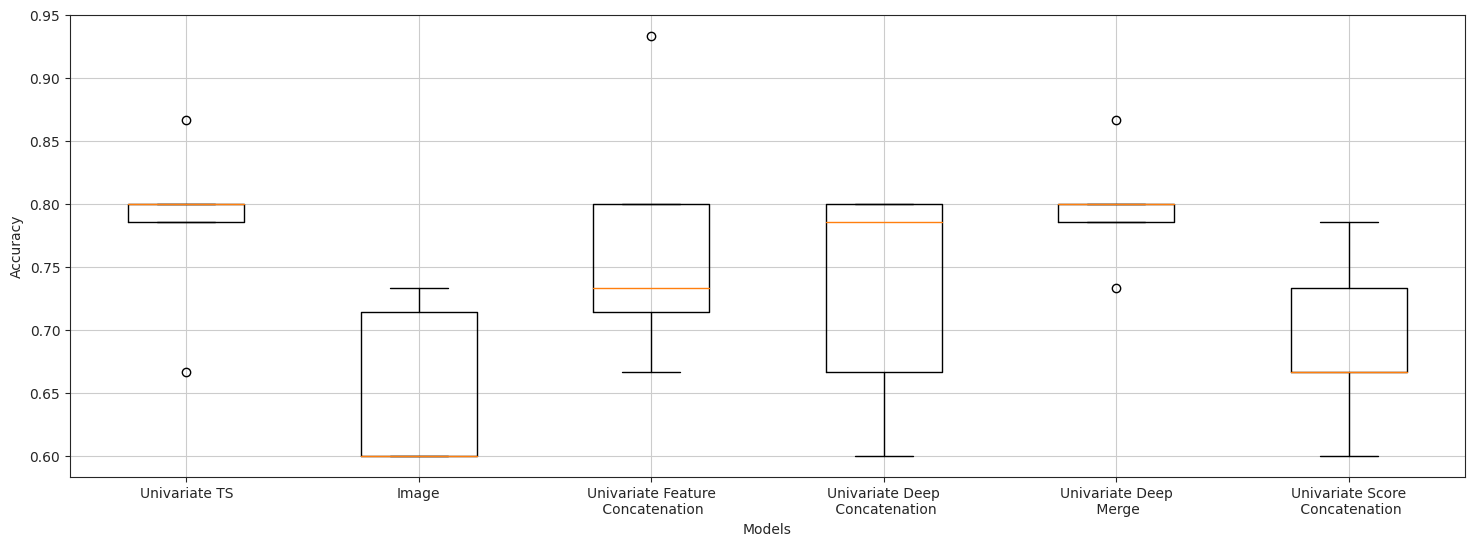

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Sample data
list1 = lst_accu_stratified_TS_Uni_TSF
# list2 = lst_accu_stratified_TS_Multi_TSF
list3 = lst_accu_stratified_Sequence_TSF
list4 = lst_accu_stratified_Concatenation_Uni_TSF
# list5 = lst_accu_stratified_Concatenation_Multi_TSF
list6 = ACC_TSF_Deep_Concatenation_Uni
list7 = ACC_TSF_Deep_Merge_Uni
list8 = lst_accu_stratified_Ensemble_Uni_TSF
# list9 = accuracy_all_Approach1
# list10 = accuracy_all_Approach2

# List of lists
data = [list1, list3, list4, list6, list7, list8]

# Plotting box plots
plt.boxplot(data)

# Adding labels
plt.xticks(range(1, len(data) + 1), ['Univariate TS', 'Image', 'Univariate Feature\n Concatenation', 'Univariate Deep\n Concatenation', 'Univariate Deep\n Merge', 'Univariate Score\n Concatenation'])
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Displaying the plot
plt.show()


Figure saved as boxplot.pdf


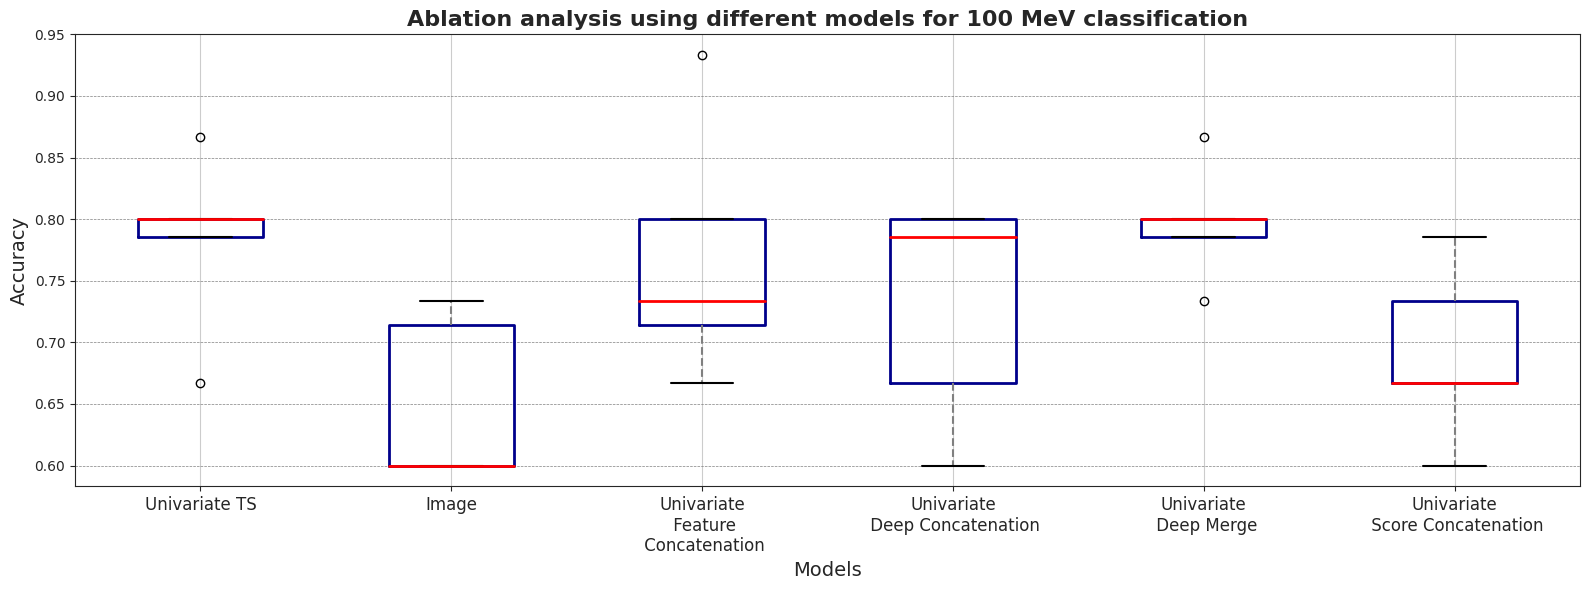

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# Sample data
list1 = lst_accu_stratified_TS_Uni_TSF
# list2 = lst_accu_stratified_TS_Multi_TSF
list3 = lst_accu_stratified_Sequence_TSF
list4 = lst_accu_stratified_Concatenation_Uni_TSF
# list5 = lst_accu_stratified_Concatenation_Multi_TSF
list6 = ACC_TSF_Deep_Concatenation_Uni
list7 = ACC_TSF_Deep_Merge_Uni
list8 = lst_accu_stratified_Ensemble_Uni_TSF
# list9 = accuracy_all_Approach1
# list10 = accuracy_all_Approach2

# List of lists
data = [list1, list3, list4, list6, list7, list8]

# Plotting box plots
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='red')
whiskerprops = dict(linewidth=1.5, linestyle='--', color='gray')
capprops = dict(linewidth=1.5, color='black')
plt.boxplot(data, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

# Adding labels
plt.xticks(range(1, len(data) + 1), ['Univariate TS', 'Image', 'Univariate\n Feature\n Concatenation', 'Univariate\n Deep Concatenation', 'Univariate\n Deep Merge', 'Univariate\n Score Concatenation'], fontsize=12)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Customize font and color
plt.title('Ablation analysis using different models for 100 MeV classification', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Adjusting plot layout
plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('boxplot.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as boxplot.pdf")


Figure saved as boxplot.pdf


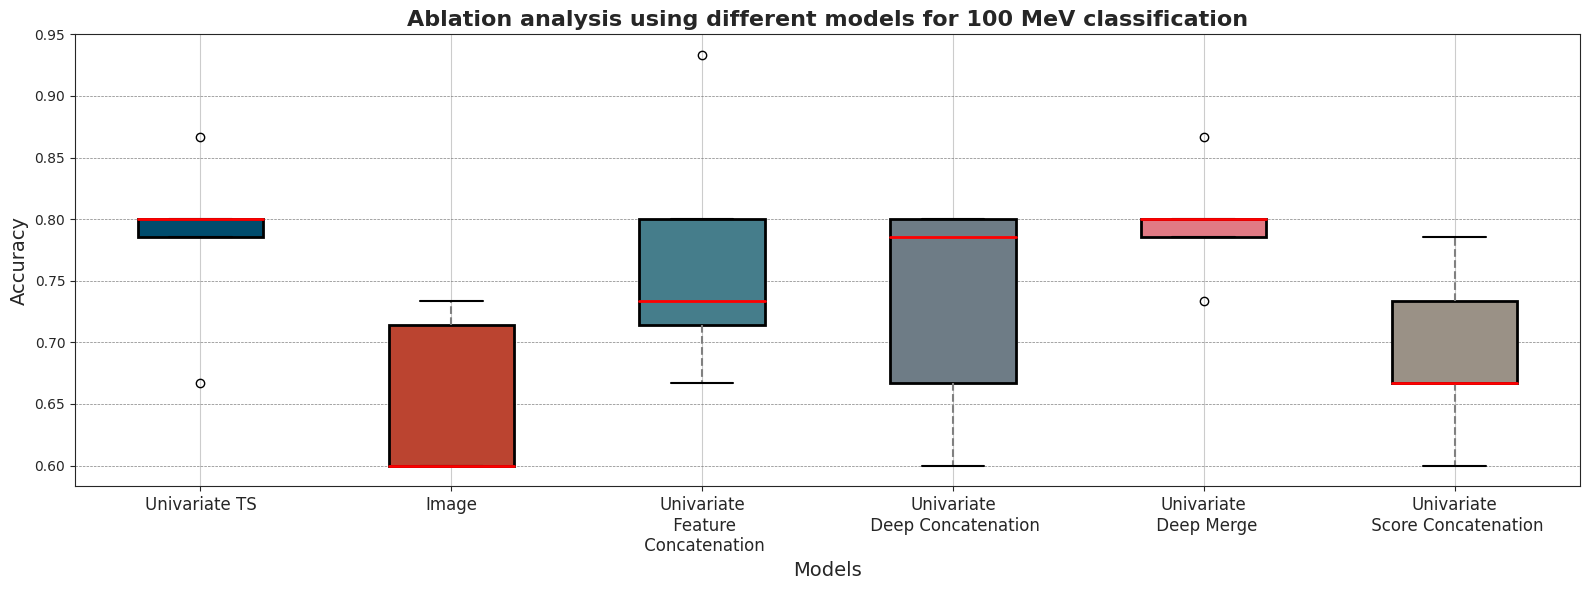

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# Sample data
list1 = lst_accu_stratified_TS_Uni_TSF
# list2 = lst_accu_stratified_TS_Multi_TSF
list3 = lst_accu_stratified_Sequence_TSF
list4 = lst_accu_stratified_Concatenation_Uni_TSF
# list5 = lst_accu_stratified_Concatenation_Multi_TSF
list6 = ACC_TSF_Deep_Concatenation_Uni
list7 = ACC_TSF_Deep_Merge_Uni
list8 = lst_accu_stratified_Ensemble_Uni_TSF
# # list9 = accuracy_all_Approach1  # Add the first list here
# list10 = accuracy_all_Approach2  # Add the second list here

# List of lists
data = [list1, list3, list4, list6, list7, list8]  # Include the new lists in the data

# Academic colors
colors = ['#004c6d', '#bb4430', '#457d8b', '#6e7c86', '#e17a84', '#9a9186']  # Add two more colors for the new lists

# Plotting box plots
boxprops = dict(linewidth=2)
medianprops = dict(linewidth=2, color='red')
whiskerprops = dict(linewidth=1.5, linestyle='--', color='gray')
capprops = dict(linewidth=1.5, color='black')

# Creating box plots with custom colors
parts = plt.boxplot(data, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, patch_artist=True)

# Coloring box plots with academic colors
for patch, color in zip(parts['boxes'], colors):
    patch.set_facecolor(color)

# Adding labels
plt.xticks(range(1, len(data) + 1), ['Univariate TS', 'Image', 'Univariate\n Feature\n Concatenation', 'Univariate\n Deep Concatenation', 'Univariate\n Deep Merge', 'Univariate\n Score Concatenation'], fontsize=12)  # Include the names of the new lists in xticks
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Customize font and color
plt.title('Ablation analysis using different models for 100 MeV classification', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Adjusting plot layout
plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('boxplot.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as boxplot.pdf")


Figure saved as violin_plot.pdf


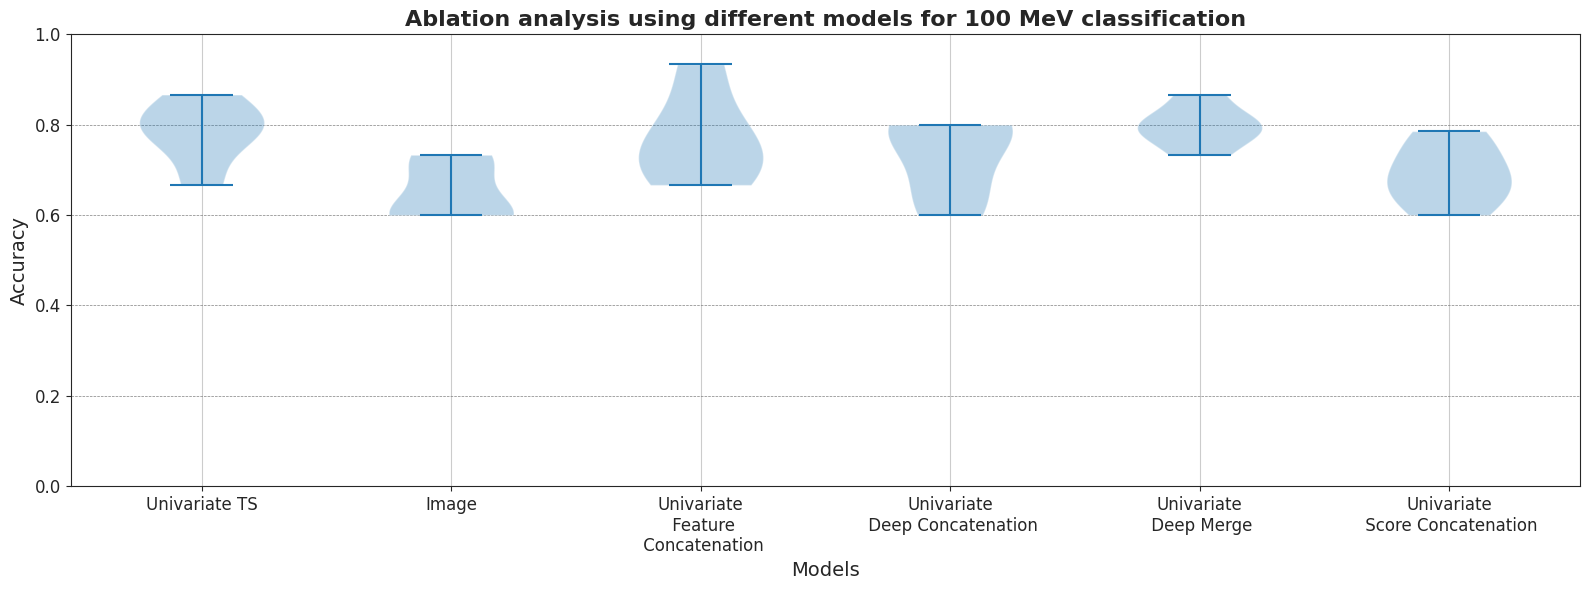

In [ ]:
import matplotlib.pyplot as plt

# Sample data
list1 = lst_accu_stratified_TS_Uni_TSF
# list2 = lst_accu_stratified_TS_Multi_TSF
list3 = lst_accu_stratified_Sequence_TSF
list4 = lst_accu_stratified_Concatenation_Uni_TSF
# list5 = lst_accu_stratified_Concatenation_Multi_TSF
list6 = ACC_TSF_Deep_Concatenation_Uni
list7 = ACC_TSF_Deep_Merge_Uni
list8 = lst_accu_stratified_Ensemble_Uni_TSF
# list9 = accuracy_all_Approach1  # Add the first list here
# list10 = accuracy_all_Approach2  # Add the second list here

# Data for violin plot
data = [list1, list3, list4, list6, list7, list8]  # Include the new lists in the data

# Create violin plot
plt.figure(figsize=(16, 6))
plt.violinplot(data)

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Ablation analysis using different models for 100 MeV classification', fontsize=16, fontweight='bold')

# Customize violin plot
plt.xticks(range(1, len(data) + 1), ['Univariate TS', 'Image', 'Univariate\n Feature\n Concatenation', 'Univariate\n Deep Concatenation', 'Univariate\n Deep Merge', 'Univariate\n Score Concatenation'], fontsize=12)  # Include the names of the new lists in xticks
plt.ylim(0, 1)  # Set the y-axis range

# Customize font and color
plt.tick_params(axis='both', which='both', labelsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Adjusting plot layout
plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('violin_plot.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as violin_plot.pdf")


Figure saved as violin_plot.pdf


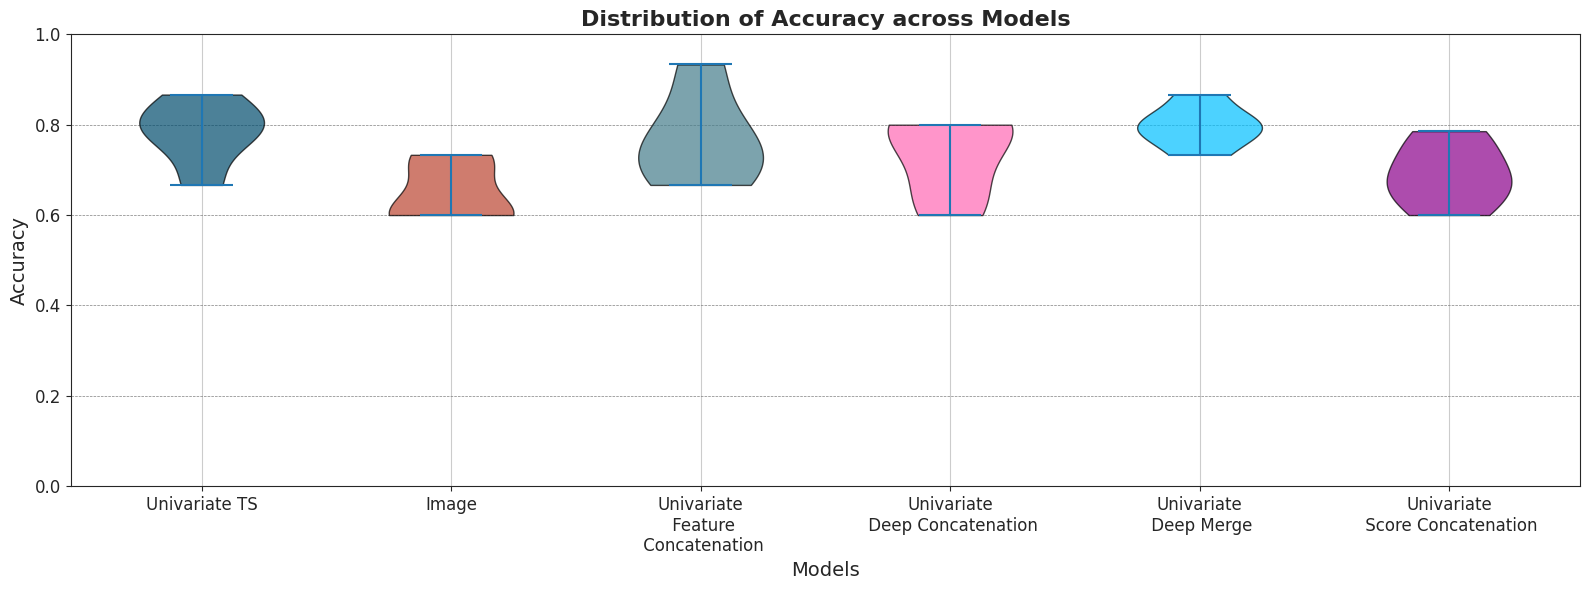

In [ ]:
import matplotlib.pyplot as plt

# Sample data
list1 = lst_accu_stratified_TS_Uni_TSF
# list2 = lst_accu_stratified_TS_Multi_TSF
list3 = lst_accu_stratified_Sequence_TSF
list4 = lst_accu_stratified_Concatenation_Uni_TSF
# list5 = lst_accu_stratified_Concatenation_Multi_TSF
list6 = ACC_TSF_Deep_Concatenation_Uni
list7 = ACC_TSF_Deep_Merge_Uni
list8 = lst_accu_stratified_Ensemble_Uni_TSF
# list9 = accuracy_all_Approach1  # Add the first list here
# list10 = accuracy_all_Approach2  # Add the second list here

# Data for violin plot
data = [list1, list3, list4, list6, list7, list8]  # Include the new lists in the data

# Create violin plot
plt.figure(figsize=(16, 6))
parts = plt.violinplot(data, showmeans=False, showmedians=False)

# Customize violin plot colors
colors = ['#004c6d', '#bb4430', '#457d8b', '#ff69b4', '#00bfff', '#8b008b']  # Add two new colors for the new lists
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Distribution of Accuracy across Models', fontsize=16, fontweight='bold')

# Customize violin plot
plt.xticks(range(1, len(data) + 1), ['Univariate TS', 'Image', 'Univariate\n Feature\n Concatenation', 'Univariate\n Deep Concatenation', 'Univariate\n Deep Merge', 'Univariate\n Score Concatenation'], fontsize=12)  # Include the names of the new lists in xticks
plt.ylim(0, 1)  # Set the y-axis range

# Customize font and color
plt.tick_params(axis='both', which='both', labelsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Adjusting plot layout
plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('violin_plot.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as violin_plot.pdf")


<ipython-input-288-25c135542a42>:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
<ipython-input-288-25c135542a42>:48: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
<ipython-input-288-25c135542a42>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)


Figure saved as violin_plot.pdf


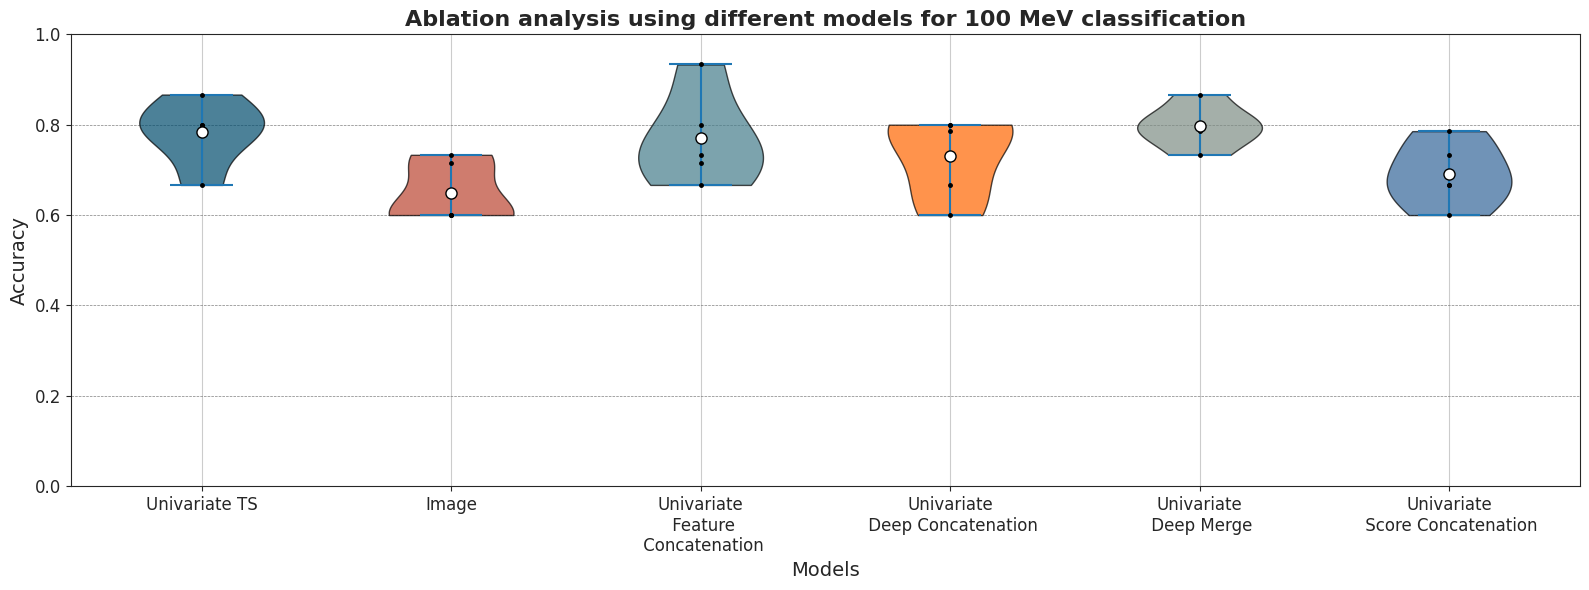

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
list1 = lst_accu_stratified_TS_Uni_TSF
# list2 = lst_accu_stratified_TS_Multi_TSF
list3 = lst_accu_stratified_Sequence_TSF
list4 = lst_accu_stratified_Concatenation_Uni_TSF
# list5 = lst_accu_stratified_Concatenation_Multi_TSF
list6 = ACC_TSF_Deep_Concatenation_Uni
list7 = ACC_TSF_Deep_Merge_Uni
list8 = lst_accu_stratified_Ensemble_Uni_TSF
# list9 = accuracy_all_Approach1  # Add the first list here
# list10 = accuracy_all_Approach2  # Add the second list here

# Data for violin plot
data = [list1, list3, list4, list6, list7, list8]  # Include the new lists in the data

# Create violin plot
plt.figure(figsize=(16, 6))
parts = plt.violinplot(data, showmeans=False, showmedians=False)

# Academic colors
colors = ['#004c6d', '#bb4430', '#457d8b', '#ff6600', '#7e8d85', '#336699']  # Add two new colors for the new lists

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Ablation analysis using different models for 100 MeV classification', fontsize=16, fontweight='bold')

# Customize violin plot
plt.xticks(range(1, len(data) + 1), ['Univariate TS', 'Image', 'Univariate\n Feature\n Concatenation', 'Univariate\n Deep Concatenation', 'Univariate\n Deep Merge', 'Univariate\n Score Concatenation'], fontsize=12)  # Include the names of the new lists in xticks
plt.ylim(0, 1)  # Set the y-axis range

# Customize font and color
plt.tick_params(axis='both', which='both', labelsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Add markers for means
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='white')
for i, d in enumerate(data):
    plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
    plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)

# Adjusting plot layout
plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('violin_plot.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as violin_plot.pdf")


<ipython-input-289-5d19cbe7a497>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
<ipython-input-289-5d19cbe7a497>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
<ipython-input-289-5d19cbe7a497>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)


Figure saved as Violin-Accuracy-100L-100MeV.pdf


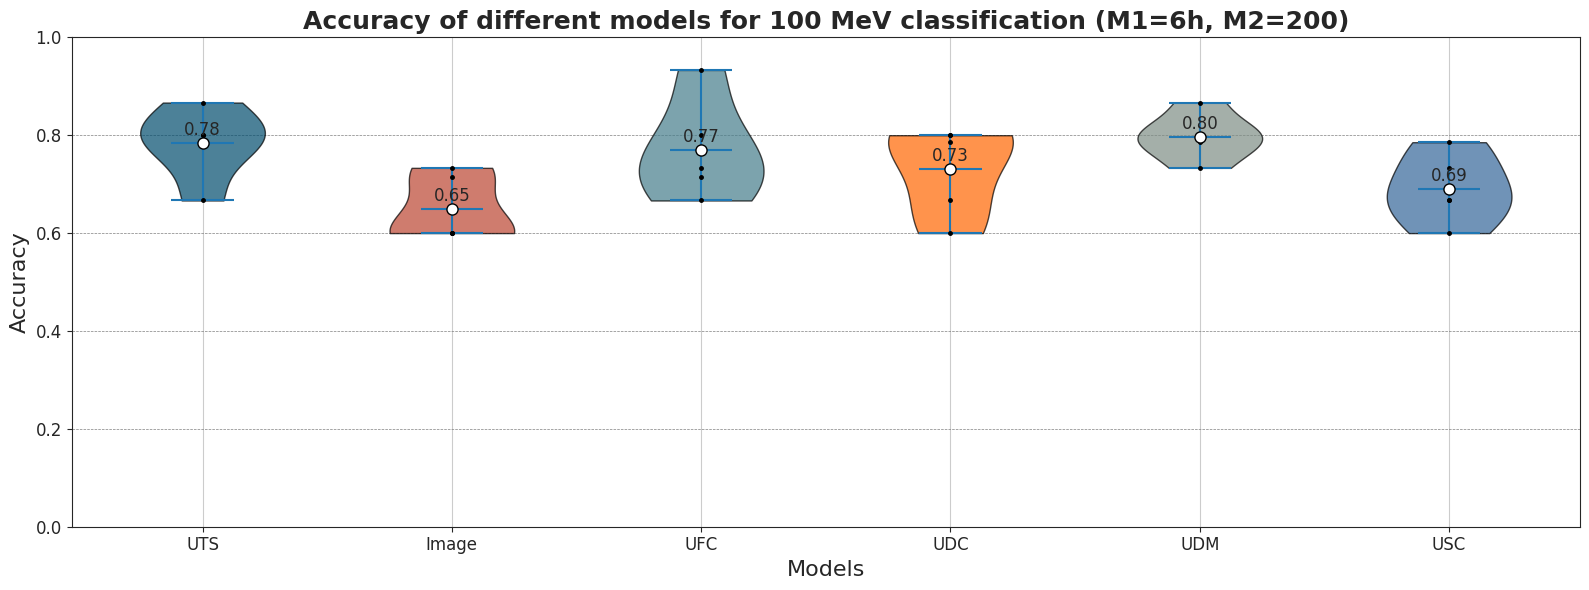

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
list1 = lst_accu_stratified_TS_Uni_TSF
# list2 = lst_accu_stratified_TS_Multi_TSF
list3 = lst_accu_stratified_Sequence_TSF
list4 = lst_accu_stratified_Concatenation_Uni_TSF
# list5 = lst_accu_stratified_Concatenation_Multi_TSF
list6 = ACC_TSF_Deep_Concatenation_Uni
list7 = ACC_TSF_Deep_Merge_Uni
list8 = lst_accu_stratified_Ensemble_Uni_TSF
# list9 = accuracy_all_Approach1
# list10 = accuracy_all_Approach2

# Data for violin plot
data = [list1, list3, list4, list6, list7, list8]

# Create violin plot
plt.figure(figsize=(16, 6))
parts = plt.violinplot(data, showmeans=True, showmedians=False)

# Academic colors
colors = ['#004c6d', '#bb4430', '#457d8b', '#ff6600', '#7e8d85', '#336699']

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add labels and title
plt.xlabel('Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy of different models for 100 MeV classification (M1=6h, M2=200)', fontsize=18, fontweight='bold')

# Customize violin plot
plt.xticks(range(1, len(data) + 1), ['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 1)

# Customize font and color
plt.tick_params(axis='both', which='both', labelsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Add markers for means
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='white')
for i, d in enumerate(data):
    plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
    plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
    plt.text(i + 1, np.mean(d) + 0.008, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=12)

# Adjust plot layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('Violin-Accuracy-100L-100MeV.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as Violin-Accuracy-100L-100MeV.pdf")


Figure saved as Violin-Comparison-Balanced-vs-Imbalanced.pdf


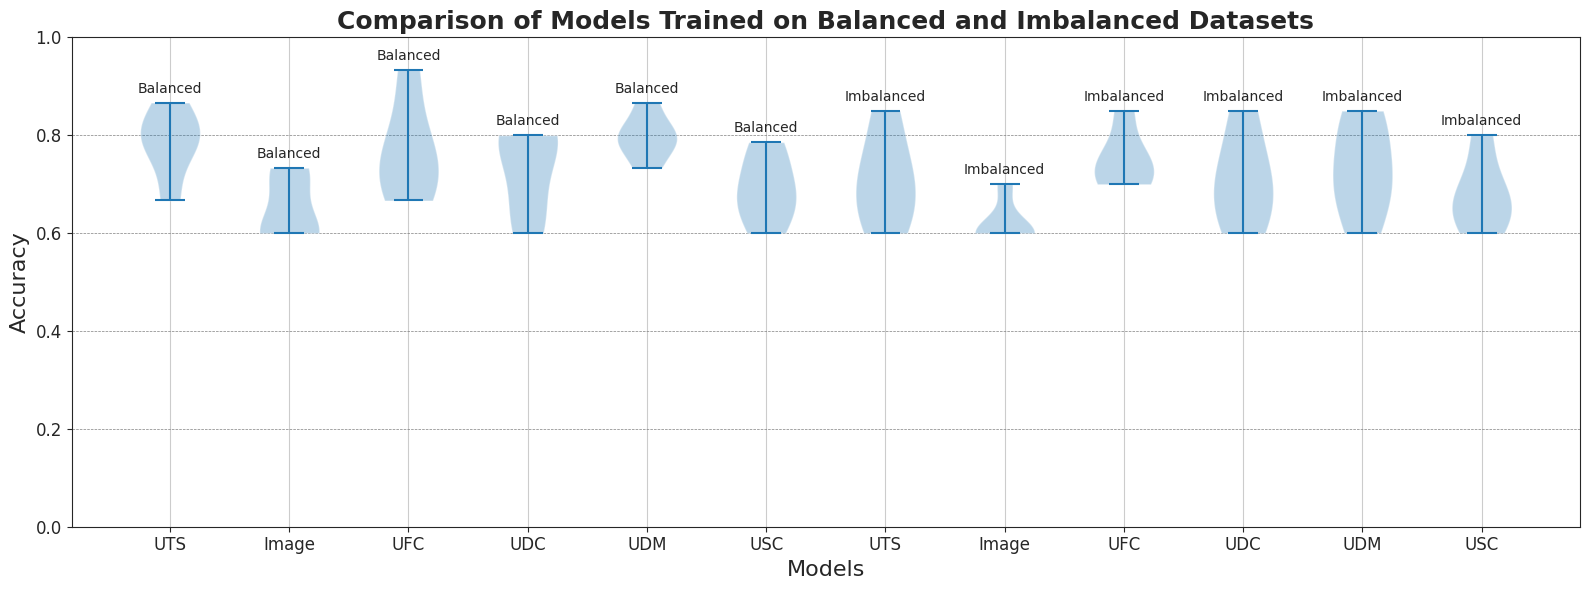

In [ ]:
# Data for violin plot
data_combined = [
    lst_accu_stratified_TS_Uni_TSF,
    lst_accu_stratified_Sequence_TSF,
    lst_accu_stratified_Concatenation_Uni_TSF,
    ACC_TSF_Deep_Concatenation_Uni,
    ACC_TSF_Deep_Merge_Uni,
    lst_accu_stratified_Ensemble_Uni_TSF,
    lst_accu_stratified_TS_Uni_TSF_IMB,
    lst_accu_stratified_Sequence_TSF_IMB,
    lst_accu_stratified_Concatenation_Uni_TSF_IMB,
    ACC_TSF_Deep_Concatenation_Uni_IMB,
    ACC_TSF_Deep_Merge_Uni_IMB,
    lst_accu_stratified_Ensemble_Uni_TSF_IMB
]

# Labels for models
model_labels = ['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'] * 2

# Labels for dataset types
dataset_labels = ['Balanced'] * 6 + ['Imbalanced'] * 6

# Create violin plot
plt.figure(figsize=(16, 6))
plt.violinplot(data_combined)

# Add labels and title
plt.xlabel('Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Comparison of Models Trained on Balanced and Imbalanced Datasets', fontsize=18, fontweight='bold')

# Set x-axis ticks and labels
plt.xticks(np.arange(1, len(model_labels) + 1), model_labels, fontsize=12)

# Add dataset type labels as annotations
for i in range(len(model_labels)):
    plt.text(i + 1, max(data_combined[i]) + 0.02, dataset_labels[i], ha='center', fontsize=10)

# Customize font and color
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Adjust plot layout
plt.tight_layout()

# Save the plot as a PDF file
# plt.savefig('Violin-Comparison-Balanced-vs-Imbalanced.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as Violin-Comparison-Balanced-vs-Imbalanced.pdf")


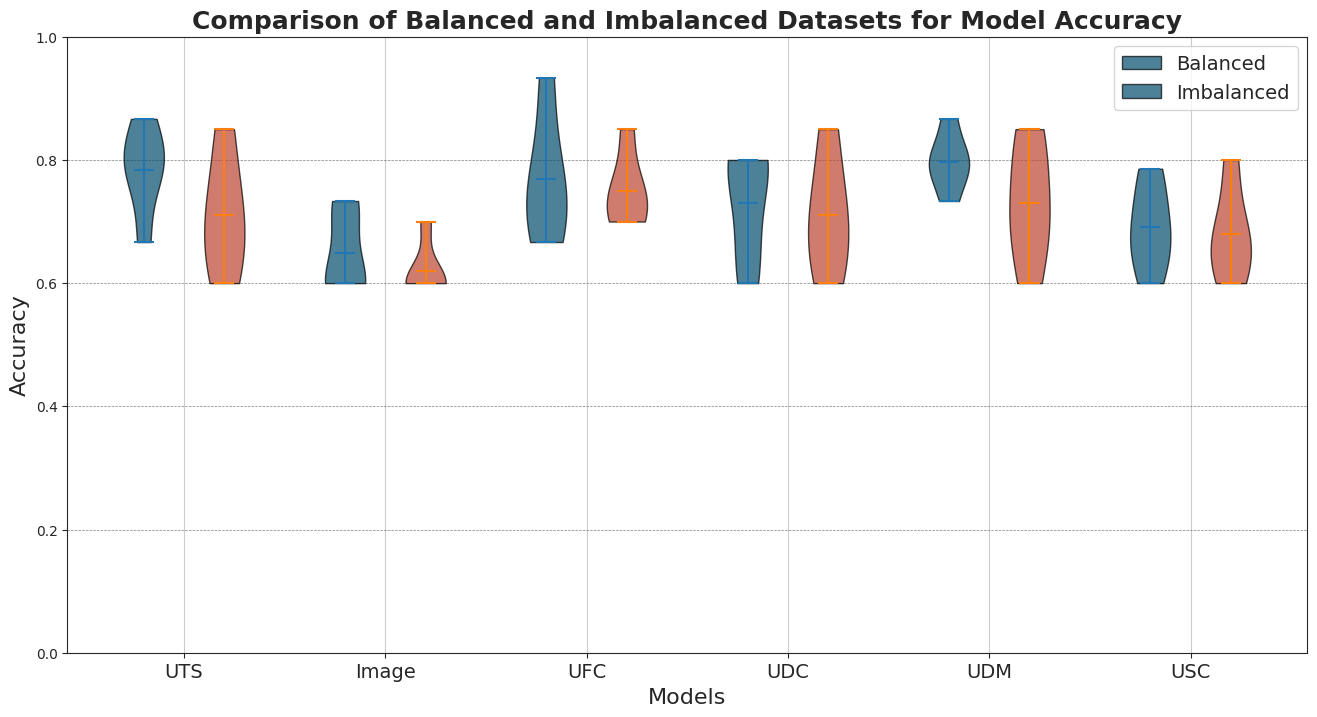

In [ ]:
# Data for balanced models
data_balanced = [
    lst_accu_stratified_TS_Uni_TSF,
    lst_accu_stratified_Sequence_TSF,
    lst_accu_stratified_Concatenation_Uni_TSF,
    ACC_TSF_Deep_Concatenation_Uni,
    ACC_TSF_Deep_Merge_Uni,
    lst_accu_stratified_Ensemble_Uni_TSF
]

# Data for imbalanced models
data_imbalanced = [
    lst_accu_stratified_TS_Uni_TSF_IMB,
    lst_accu_stratified_Sequence_TSF_IMB,
    lst_accu_stratified_Concatenation_Uni_TSF_IMB,
    ACC_TSF_Deep_Concatenation_Uni_IMB,
    ACC_TSF_Deep_Merge_Uni_IMB,
    lst_accu_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(16, 8))

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.4, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.4, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add labels and title
ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model Accuracy', fontsize=18, fontweight='bold')

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=14)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend
ax.legend(['Balanced', 'Imbalanced'], fontsize=14)

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_Accuracy_Comparison.pdf', format='pdf')

# Display the plot
plt.show()

<ipython-input-292-8038e3a5bb25>:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=8, color='red')
<ipython-input-292-8038e3a5bb25>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=8, color='red')


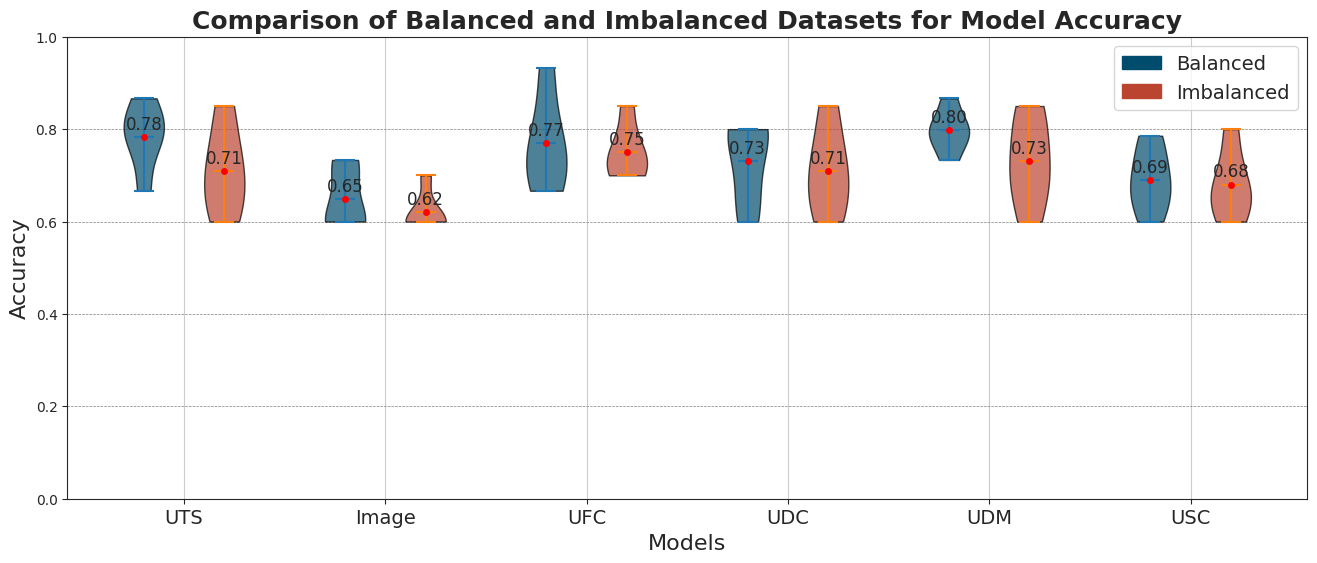

In [ ]:
# Data for balanced models
data_balanced = [
    lst_accu_stratified_TS_Uni_TSF,
    lst_accu_stratified_Sequence_TSF,
    lst_accu_stratified_Concatenation_Uni_TSF,
    ACC_TSF_Deep_Concatenation_Uni,
    ACC_TSF_Deep_Merge_Uni,
    lst_accu_stratified_Ensemble_Uni_TSF
]

# Data for imbalanced models
data_imbalanced = [
    lst_accu_stratified_TS_Uni_TSF_IMB,
    lst_accu_stratified_Sequence_TSF_IMB,
    lst_accu_stratified_Concatenation_Uni_TSF_IMB,
    ACC_TSF_Deep_Concatenation_Uni_IMB,
    ACC_TSF_Deep_Merge_Uni_IMB,
    lst_accu_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(16, 6))

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.4, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.4, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=8, color='red')
    ax.text(positions_balanced[i], np.mean(d) + 0.008, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=12)

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=8, color='red')
    ax.text(positions_imbalanced[i], np.mean(d) + 0.008, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model Accuracy', fontsize=18, fontweight='bold')

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=14)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# # Add legend with corrected colors
# ax.legend(['Balanced', 'Imbalanced'], loc='upper right', fontsize=14, labelcolor=['#004c6d', '#bb4430'])

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=14)


# Save the plot as a PDF file
plt.savefig('Grouped_Violin_Accuracy_Comparison.pdf', format='pdf')

# Display the plot
plt.show()

<ipython-input-294-55f638990eac>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
<ipython-input-294-55f638990eac>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size


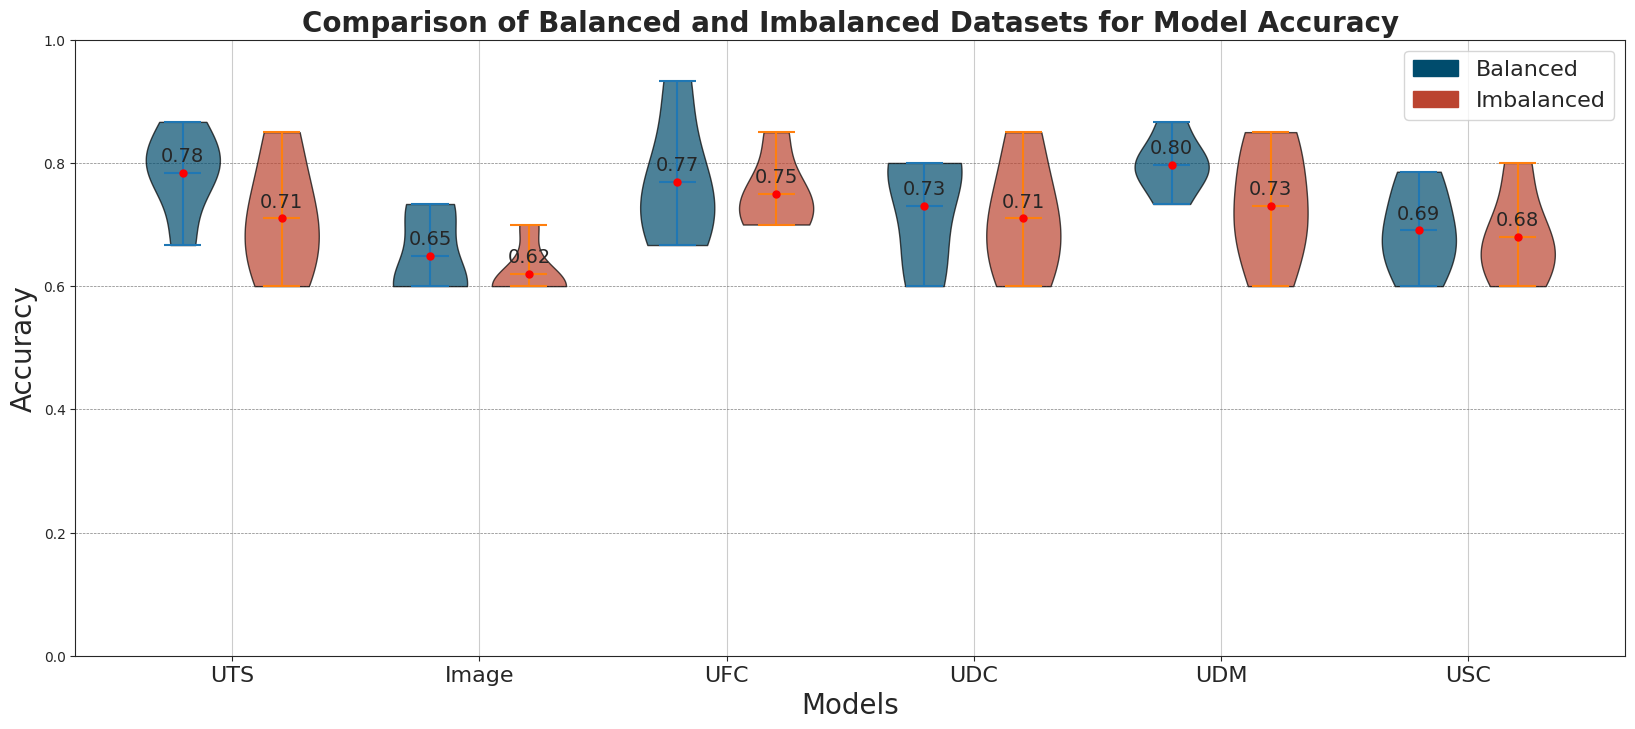

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    lst_accu_stratified_TS_Uni_TSF,
    lst_accu_stratified_Sequence_TSF,
    lst_accu_stratified_Concatenation_Uni_TSF,
    ACC_TSF_Deep_Concatenation_Uni,
    ACC_TSF_Deep_Merge_Uni,
    lst_accu_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    lst_accu_stratified_TS_Uni_TSF_IMB,
    lst_accu_stratified_Sequence_TSF_IMB,
    lst_accu_stratified_Concatenation_Uni_TSF_IMB,
    ACC_TSF_Deep_Concatenation_Uni_IMB,
    ACC_TSF_Deep_Merge_Uni_IMB,
    lst_accu_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('Accuracy', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model Accuracy', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_Accuracy_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-314-d50c9f4d0558>:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
<ipython-input-314-d50c9f4d0558>:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size


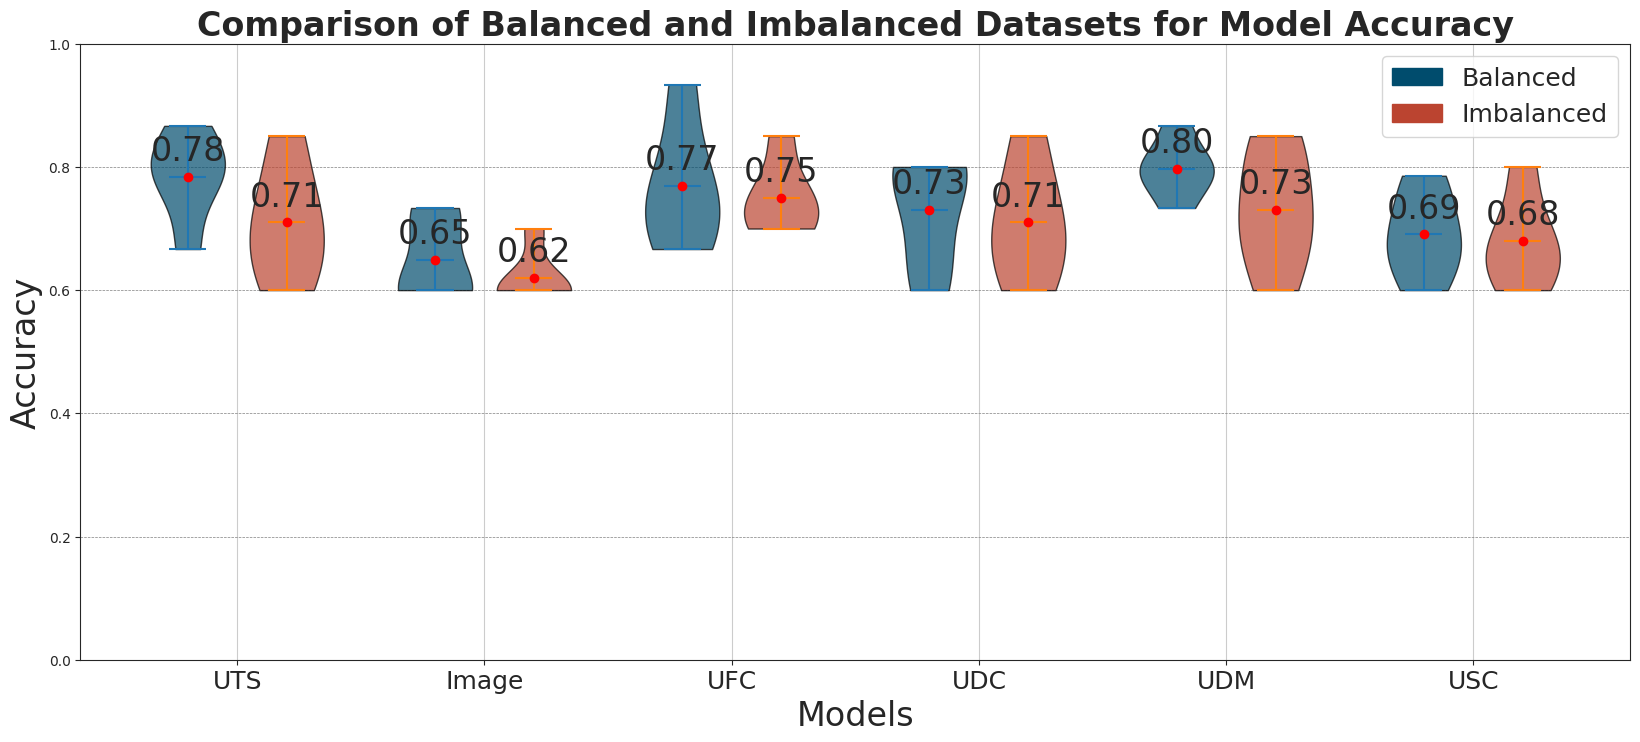

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
data_balanced = [
    lst_accu_stratified_TS_Uni_TSF,
    lst_accu_stratified_Sequence_TSF,
    lst_accu_stratified_Concatenation_Uni_TSF,
    ACC_TSF_Deep_Concatenation_Uni,
    ACC_TSF_Deep_Merge_Uni,
    lst_accu_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
data_imbalanced = [
    lst_accu_stratified_TS_Uni_TSF_IMB,
    lst_accu_stratified_Sequence_TSF_IMB,
    lst_accu_stratified_Concatenation_Uni_TSF_IMB,
    ACC_TSF_Deep_Concatenation_Uni_IMB,
    ACC_TSF_Deep_Merge_Uni_IMB,
    lst_accu_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=24)  # Increase label font size
ax.set_ylabel('Accuracy', fontsize=24)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model Accuracy', fontsize=24, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=18)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=18)  # Increase legend font size

# Increase font size of values on the plot
for txt in ax.texts:
    txt.set_fontsize(24)

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_Accuracy_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-316-7e7f83cd51cd>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
<ipython-input-316-7e7f83cd51cd>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
<ipython-input-316-7e7f83cd51cd>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)


Figure saved as Violin-F1-100L-100MeV.pdf


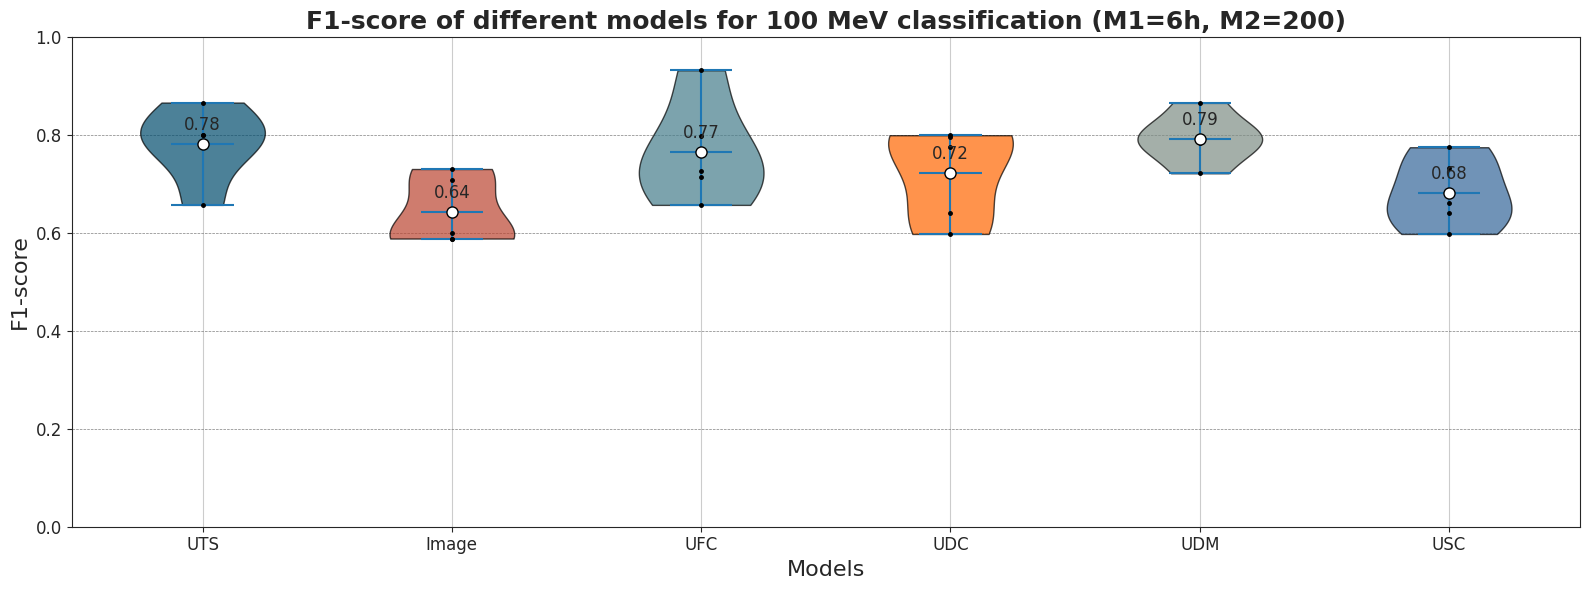

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
list1 = lst_f1_stratified_TS_Uni_TSF
# list2 = lst_f1_stratified_TS_Multi_TSF
list3 = lst_f1_stratified_Sequence_TSF
list4 = lst_f1_stratified_Concatenation_Uni_TSF
# list5 = lst_f1_stratified_Concatenation_Multi_TSF
list6 = F1_TSF_Deep_Concatenation_Uni
list7 = f1_all_Deep_Merge
list8 = lst_f1_stratified_Ensemble_Uni_TSF
# list9 = f1_all_Approach1
# list10 = f1_all_Approach2

# Data for violin plot
data = [list1, list3, list4, list6, list7, list8]

# Create violin plot
plt.figure(figsize=(16, 6))
parts = plt.violinplot(data, showmeans=True, showmedians=False)

# Academic colors
colors = ['#004c6d', '#bb4430', '#457d8b', '#ff6600', '#7e8d85', '#336699']

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add labels and title
plt.xlabel('Models', fontsize=16)
plt.ylabel('F1-score', fontsize=16)
plt.title('F1-score of different models for 100 MeV classification (M1=6h, M2=200)', fontsize=18, fontweight='bold')

# Customize violin plot
plt.xticks(range(1, len(data) + 1), ['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 1)

# Customize font and color
plt.tick_params(axis='both', which='both', labelsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Add markers for means
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='white')
for i, d in enumerate(data):
    plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
    plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
    plt.text(i + 1, np.mean(d) + 0.02, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=12)

# Adjust plot layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('Violin-F1-100L-100MeV.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as Violin-F1-100L-100MeV.pdf")


<ipython-input-317-ada329bc2fda>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
<ipython-input-317-ada329bc2fda>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size


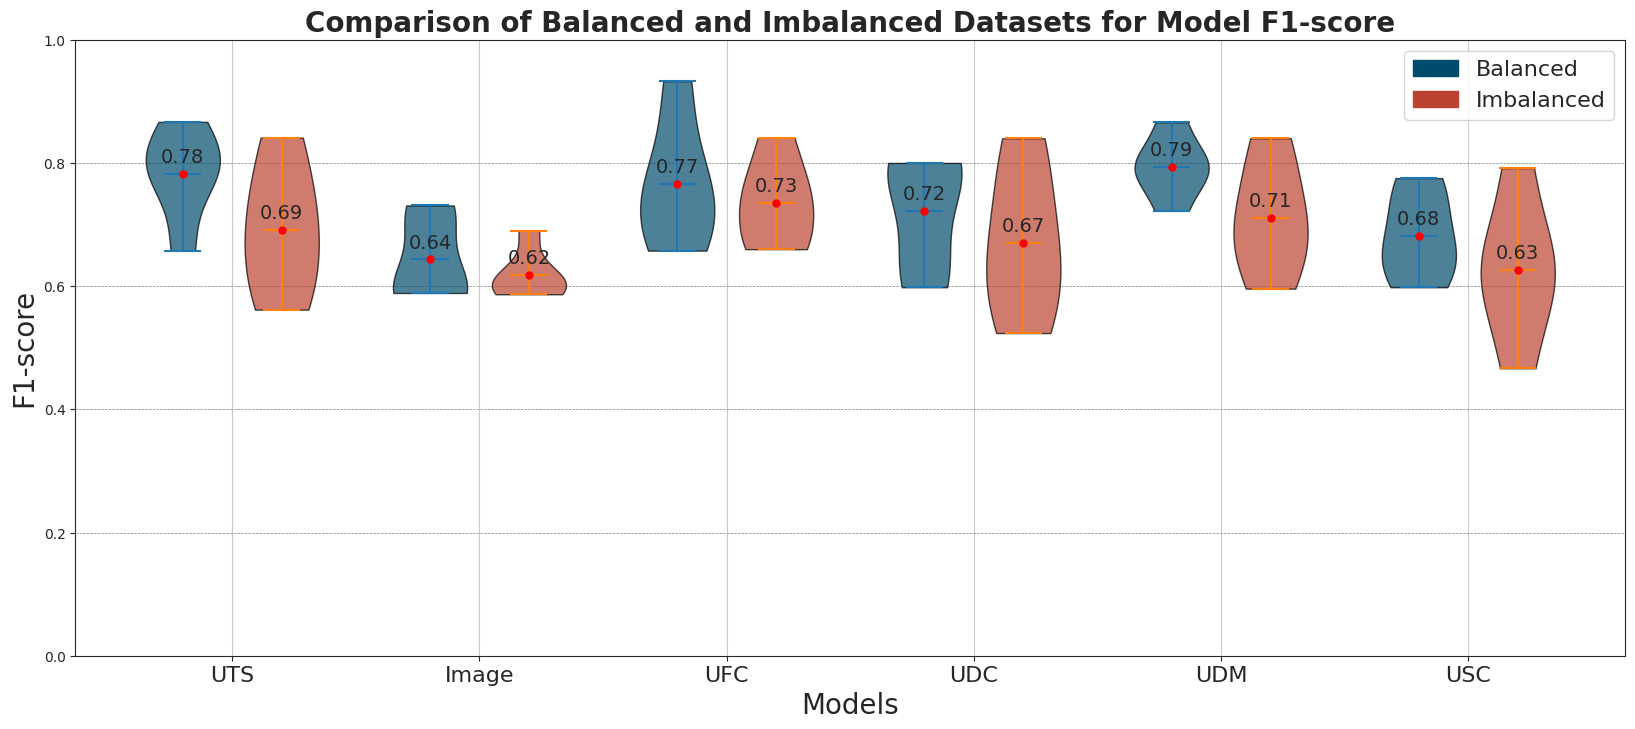

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    lst_f1_stratified_TS_Uni_TSF,
    lst_f1_stratified_Sequence_TSF,
    lst_f1_stratified_Concatenation_Uni_TSF,
    F1_TSF_Deep_Concatenation_Uni,
    f1_all_Deep_Merge,
    lst_f1_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    lst_f1_stratified_TS_Uni_TSF_IMB,
    lst_f1_stratified_Sequence_TSF_IMB,
    lst_f1_stratified_Concatenation_Uni_TSF_IMB,
    F1_TSF_Deep_Concatenation_Uni_IMB,
    f1_all_Deep_Merge_IMB,
    lst_f1_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('F1-score', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model F1-score', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_F1_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-335-d3818f217159>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
<ipython-input-335-d3818f217159>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size


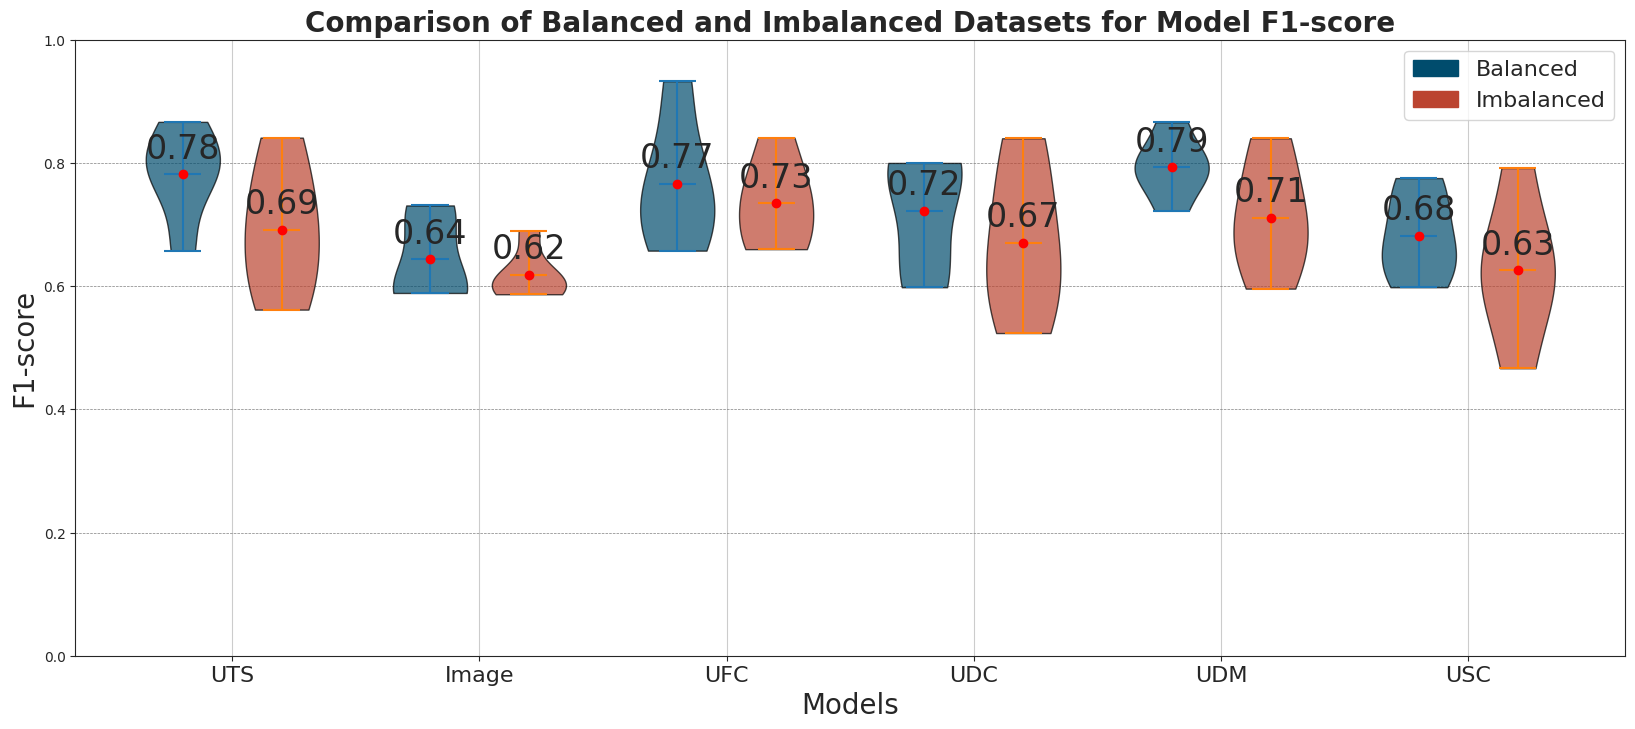

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    lst_f1_stratified_TS_Uni_TSF,
    lst_f1_stratified_Sequence_TSF,
    lst_f1_stratified_Concatenation_Uni_TSF,
    F1_TSF_Deep_Concatenation_Uni,
    f1_all_Deep_Merge,
    lst_f1_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    lst_f1_stratified_TS_Uni_TSF_IMB,
    lst_f1_stratified_Sequence_TSF_IMB,
    lst_f1_stratified_Concatenation_Uni_TSF_IMB,
    F1_TSF_Deep_Concatenation_Uni_IMB,
    f1_all_Deep_Merge_IMB,
    lst_f1_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('F1-score', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model F1-score', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Increase font size of values on the plot
for txt in ax.texts:
    txt.set_fontsize(24)

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_F1_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-319-00416b85068d>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
<ipython-input-319-00416b85068d>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
<ipython-input-319-00416b85068d>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)


Figure saved as Violin-Precision-100L-100MeV.pdf


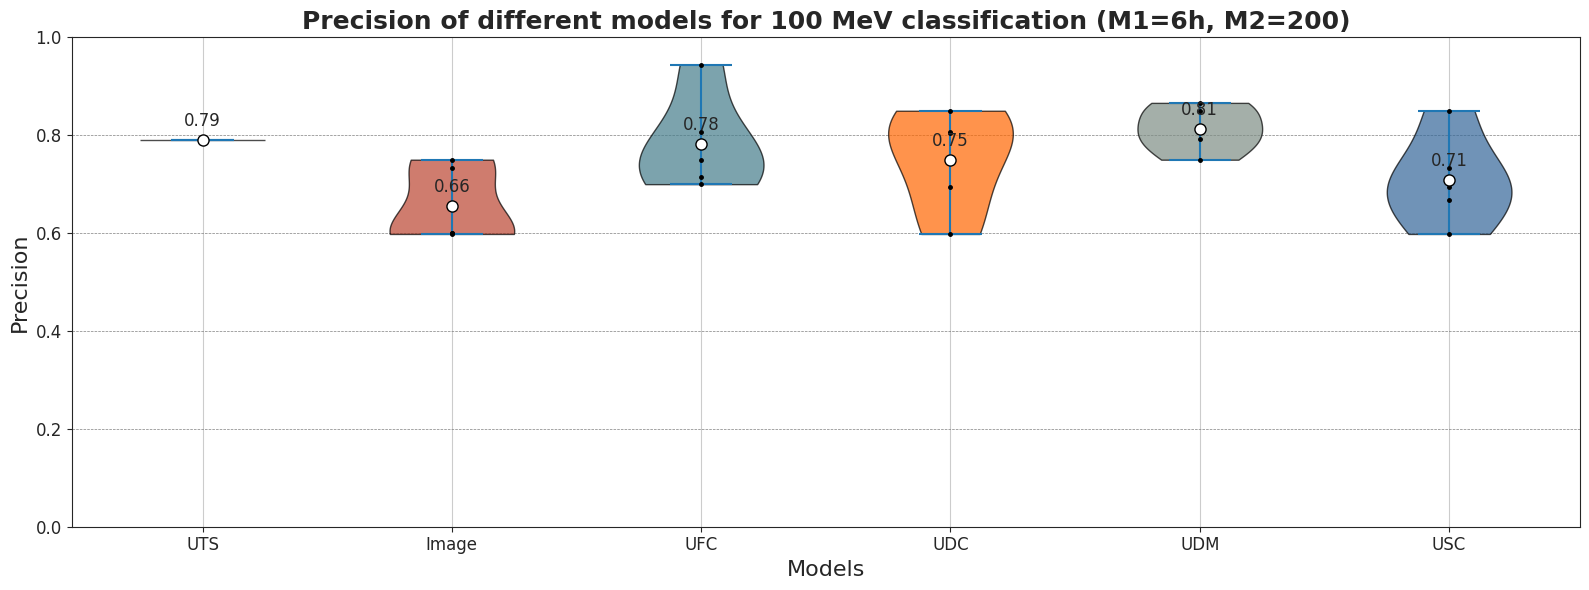

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
list1 = precision_TSF_TS_Uni
# list2 = precision_TSF_TS_Multi
list3 = lst_precision_stratified_Sequence_TSF
list4 = lst_precision_stratified_Concatenation_Uni_TSF
# list5 = lst_precision_stratified_Concatenation_Multi_TSF
list6 = precision_all_Deep_Concatenation
list7 = precision_all_Deep_Merge
list8 = lst_precision_stratified_Ensemble_Uni_TSF
# list9 = precision_all_Approach1
# list10 = precision_all_Approach2

# Data for violin plot
data = [list1, list3, list4, list6, list7, list8]

# Create violin plot
plt.figure(figsize=(16, 6))
parts = plt.violinplot(data, showmeans=False, showmedians=False)

# Academic colors
colors = ['#004c6d', '#bb4430', '#457d8b', '#ff6600', '#7e8d85', '#336699']

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add labels and title
plt.xlabel('Models', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision of different models for 100 MeV classification (M1=6h, M2=200)', fontsize=18, fontweight='bold')

# Customize violin plot
plt.xticks(range(1, len(data) + 1), ['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 1)

# Customize font and color
plt.tick_params(axis='both', which='both', labelsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Add markers for means
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='white')
for i, d in enumerate(data):
    plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
    plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
    plt.text(i + 1, np.mean(d) + 0.02, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=12)

# Adjust plot layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('Violin-Precision-100L-100MeV.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as Violin-Precision-100L-100MeV.pdf")


<ipython-input-321-fde4b0774672>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
<ipython-input-321-fde4b0774672>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size


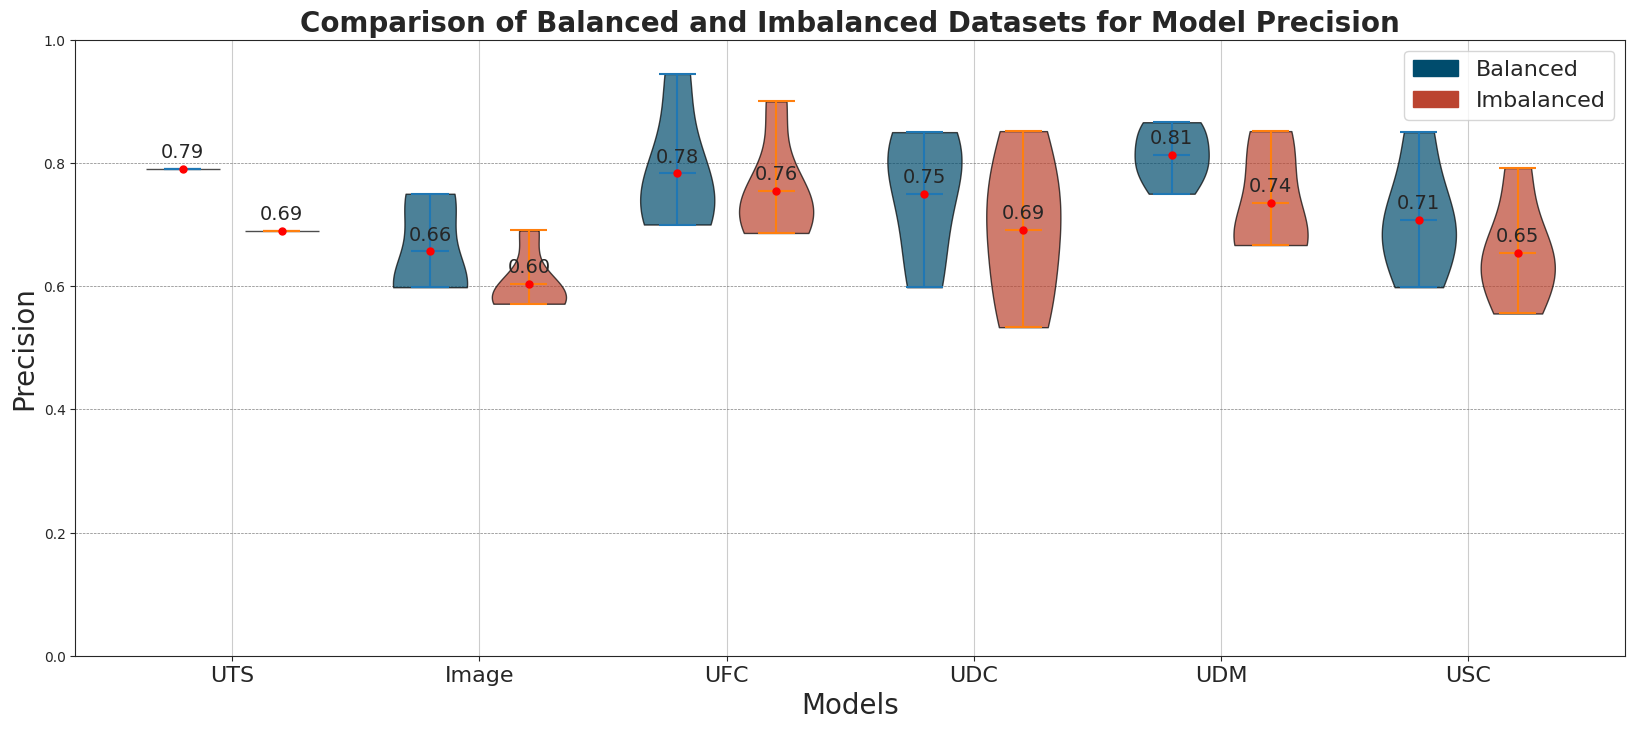

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    precision_TSF_TS_Uni,
    lst_precision_stratified_Sequence_TSF,
    lst_precision_stratified_Concatenation_Uni_TSF,
    precision_all_Deep_Concatenation,
    precision_all_Deep_Merge,
    lst_precision_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    precision_TSF_TS_Uni_IMB,
    lst_precision_stratified_Sequence_TSF_IMB,
    lst_precision_stratified_Concatenation_Uni_TSF_IMB,
    precision_all_Deep_Concatenation_IMB,
    precision_all_Deep_Merge_IMB,
    lst_precision_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('Precision', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model Precision', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_Precision_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-322-f7570958390a>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
<ipython-input-322-f7570958390a>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size


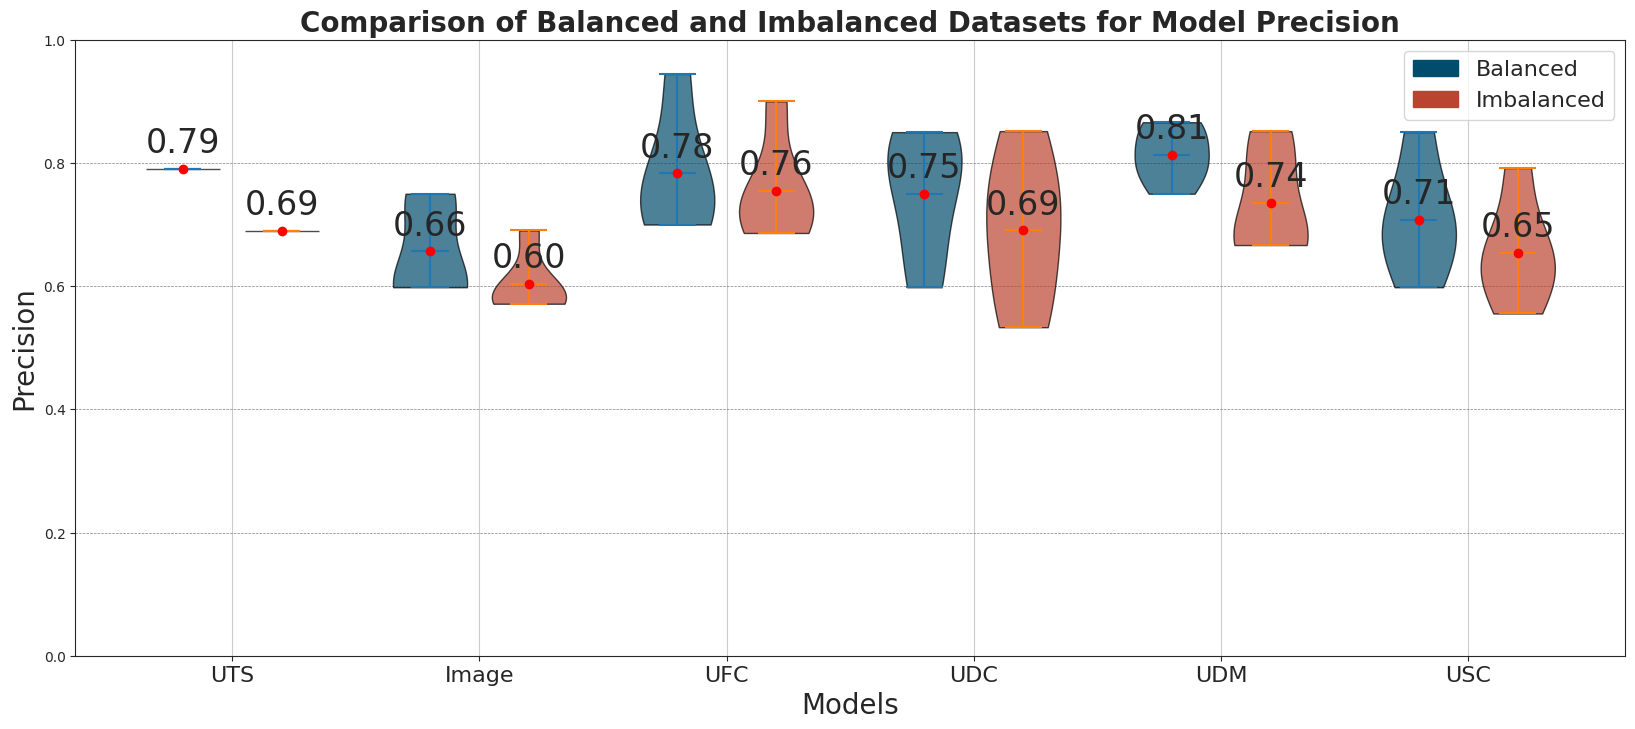

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    precision_TSF_TS_Uni,
    lst_precision_stratified_Sequence_TSF,
    lst_precision_stratified_Concatenation_Uni_TSF,
    precision_all_Deep_Concatenation,
    precision_all_Deep_Merge,
    lst_precision_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    precision_TSF_TS_Uni_IMB,
    lst_precision_stratified_Sequence_TSF_IMB,
    lst_precision_stratified_Concatenation_Uni_TSF_IMB,
    precision_all_Deep_Concatenation_IMB,
    precision_all_Deep_Merge_IMB,
    lst_precision_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('Precision', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model Precision', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Increase font size of values on the plot
for txt in ax.texts:
    txt.set_fontsize(24)

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_Precision_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-323-08b9e7f78786>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
<ipython-input-323-08b9e7f78786>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
<ipython-input-323-08b9e7f78786>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)


Figure saved as Violin-Recall-100L-100MeV.pdf


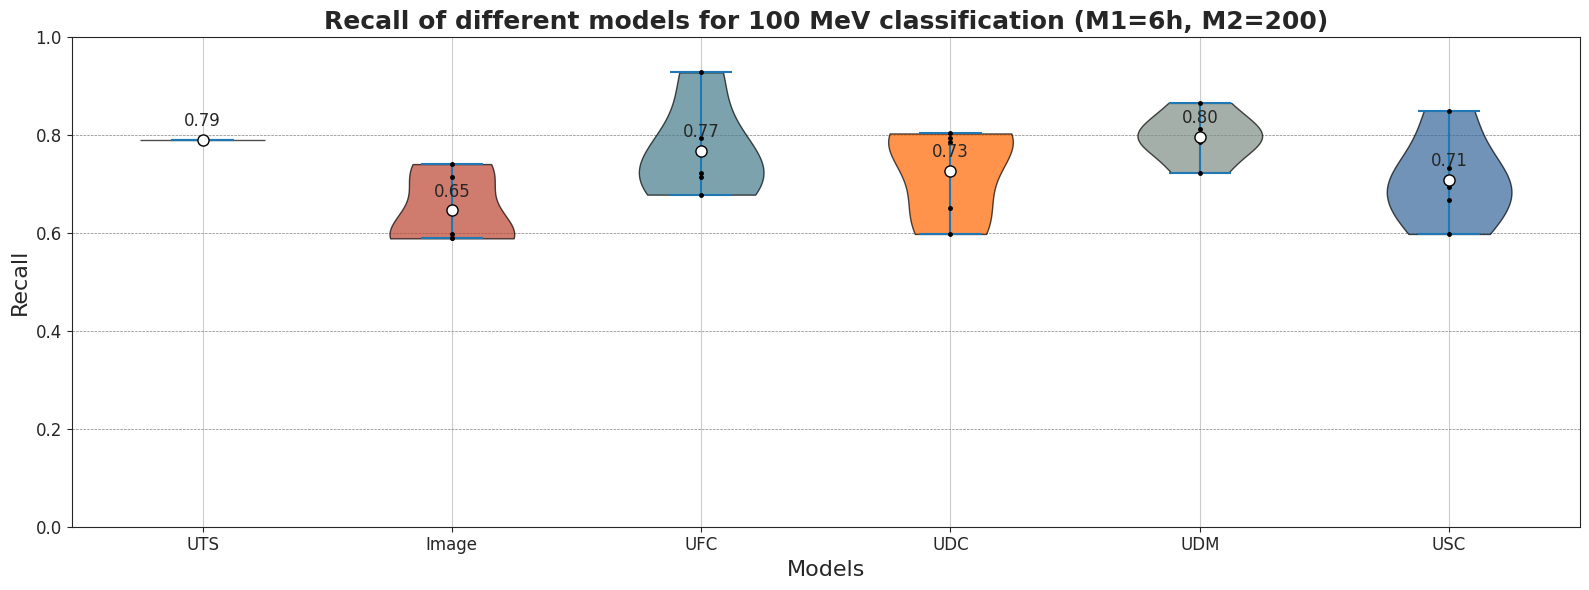

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
list1 = recall_TSF_TS_Uni
# list2 = recall_TSF_TS_Multi
list3 = lst_recall_stratified_Sequence_TSF
list4 = lst_recall_stratified_Concatenation_Uni_TSF
# list5 = lst_recall_stratified_Concatenation_Multi_TSF
list6 = recall_all_Deep_Concatenation
list7 = recall_all_Deep_Merge
list8 = lst_recall_stratified_Ensemble_Uni_TSF
# list9 = recall_all_Approach1
# list10 = recall_all_Approach2

# Data for violin plot
data = [list1, list3, list4, list6, list7, list8]

# Create violin plot
plt.figure(figsize=(16, 6))
parts = plt.violinplot(data, showmeans=False, showmedians=False)

# Academic colors
colors = ['#004c6d', '#bb4430', '#457d8b', '#ff6600', '#7e8d85', '#336699']

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add labels and title
plt.xlabel('Models', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Recall of different models for 100 MeV classification (M1=6h, M2=200)', fontsize=18, fontweight='bold')

# Customize violin plot
plt.xticks(range(1, len(data) + 1), ['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 1)

# Customize font and color
plt.tick_params(axis='both', which='both', labelsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Add markers for means
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='white')
for i, d in enumerate(data):
    plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
    plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
    plt.text(i + 1, np.mean(d) + 0.02, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=12)

# Adjust plot layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('Violin-Recall-100L-100MeV.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as Violin-Recall-100L-100MeV.pdf")


<ipython-input-324-0a86f3d37e31>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
<ipython-input-324-0a86f3d37e31>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size


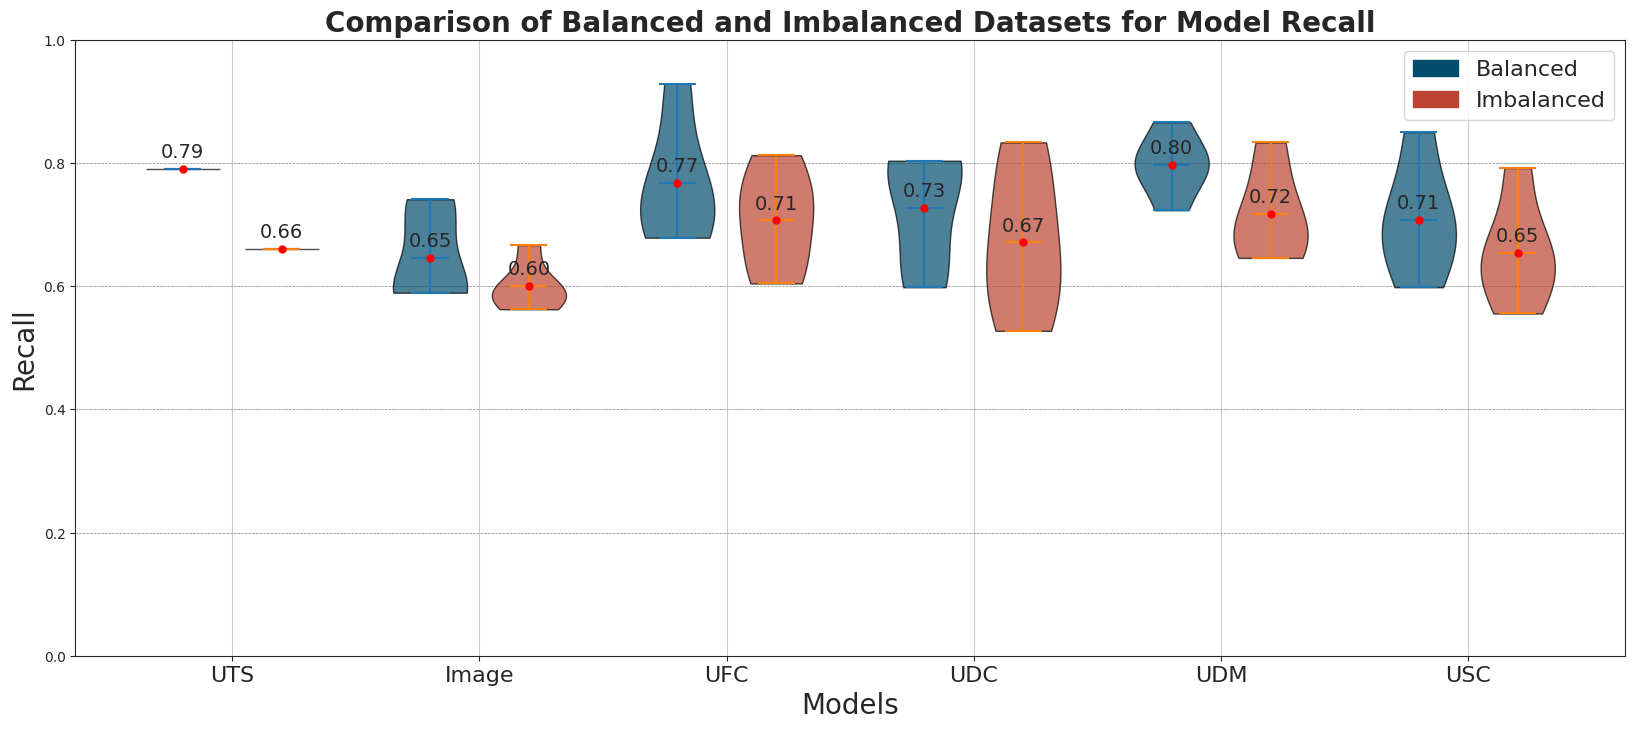

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    recall_TSF_TS_Uni,
    lst_recall_stratified_Sequence_TSF,
    lst_recall_stratified_Concatenation_Uni_TSF,
    recall_all_Deep_Concatenation,
    recall_all_Deep_Merge,
    lst_recall_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    recall_TSF_TS_Uni_IMB,
    lst_recall_stratified_Sequence_TSF_IMB,
    lst_recall_stratified_Concatenation_Uni_TSF_IMB,
    recall_all_Deep_Concatenation_IMB,
    recall_all_Deep_Merge_IMB,
    lst_recall_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('Recall', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model Recall', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_Recall_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-326-26c35c150e91>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
<ipython-input-326-26c35c150e91>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size


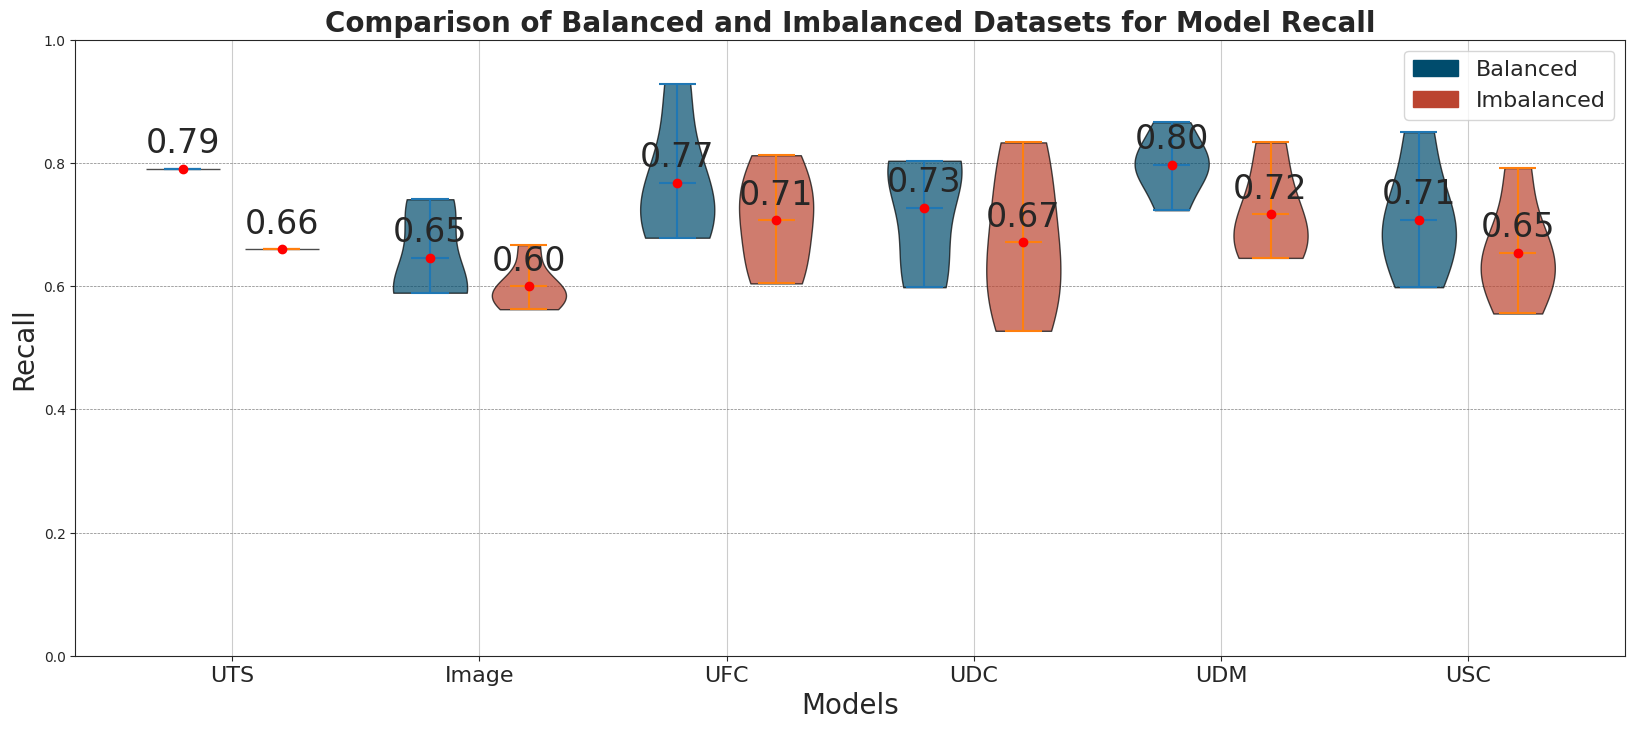

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    recall_TSF_TS_Uni,
    lst_recall_stratified_Sequence_TSF,
    lst_recall_stratified_Concatenation_Uni_TSF,
    recall_all_Deep_Concatenation,
    recall_all_Deep_Merge,
    lst_recall_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    recall_TSF_TS_Uni_IMB,
    lst_recall_stratified_Sequence_TSF_IMB,
    lst_recall_stratified_Concatenation_Uni_TSF_IMB,
    recall_all_Deep_Concatenation_IMB,
    recall_all_Deep_Merge_IMB,
    lst_recall_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('Recall', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model Recall', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Increase font size of values on the plot
for txt in ax.texts:
    txt.set_fontsize(24)

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_Recall_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-327-cb6f954bcf2b>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
<ipython-input-327-cb6f954bcf2b>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
<ipython-input-327-cb6f954bcf2b>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)


Figure saved as Violin-TSS-100L-100MeV.pdf


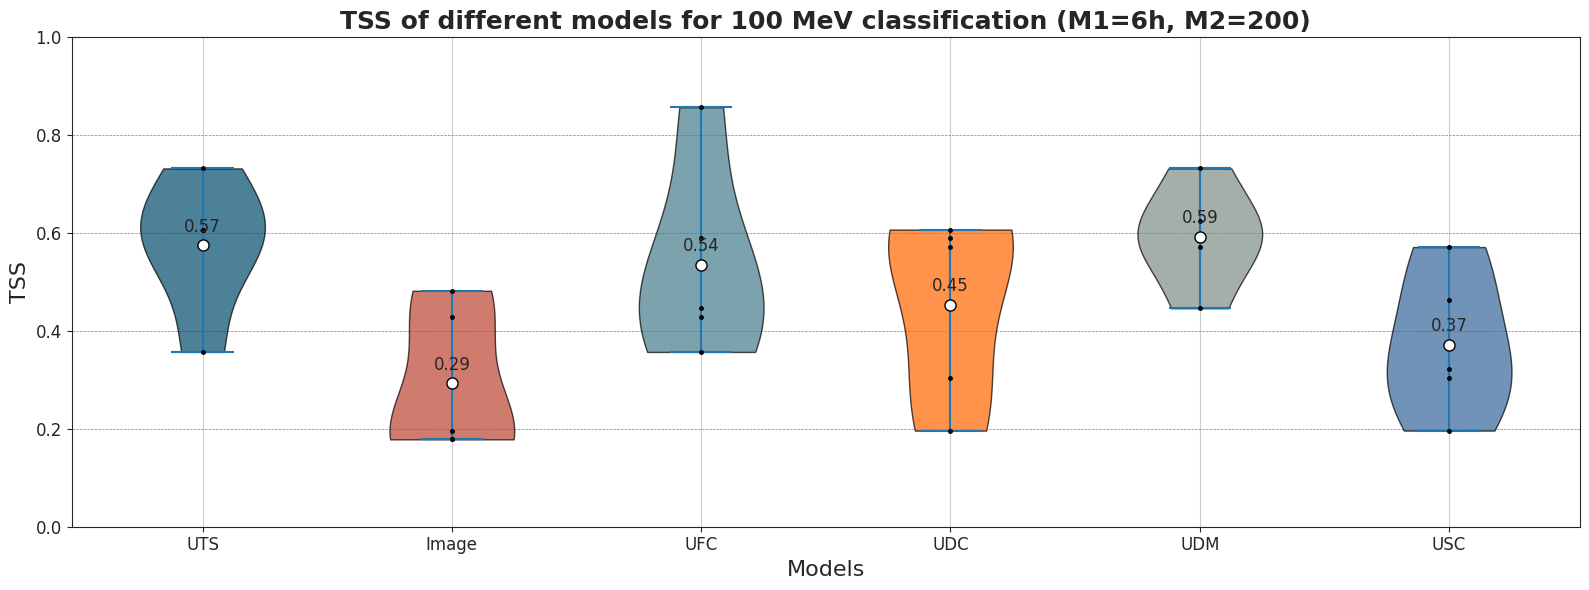

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
list1 = lst_TSS_stratified_A_TSF_Uni
# list2 = lst_TSS_stratified_A_TSF_Multi
list3 = lst_TSS_stratified_Sequence_TSF
list4 = lst_TSS_stratified_Concatenation_Uni_TSF
# list5 = lst_TSS_stratified_Concatenation_Multi_TSF
list6 = TSS_all_Deep_Concatenation
list7 = TSS_all_Deep_Merge
list8 = lst_TSS_stratified_Ensemble_Uni_TSF
# list9 = TSS_all_Approach1
# list10 = TSS_all_Approach2

# Data for violin plot
data = [list1, list3, list4, list6, list7, list8]

# Create violin plot
plt.figure(figsize=(16, 6))
parts = plt.violinplot(data, showmeans=False, showmedians=False)

# Academic colors
colors = ['#004c6d', '#bb4430', '#457d8b', '#ff6600', '#7e8d85', '#336699']

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add labels and title
plt.xlabel('Models', fontsize=16)
plt.ylabel('TSS', fontsize=16)
plt.title('TSS of different models for 100 MeV classification (M1=6h, M2=200)', fontsize=18, fontweight='bold')

# Customize violin plot
plt.xticks(range(1, len(data) + 1), ['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 1)

# Customize font and color
plt.tick_params(axis='both', which='both', labelsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Add markers for means
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='white')
for i, d in enumerate(data):
    plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
    plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
    plt.text(i + 1, np.mean(d) + 0.02, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=12)

# Adjust plot layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('Violin-TSS-100L-100MeV.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as Violin-TSS-100L-100MeV.pdf")


<ipython-input-328-cd4956594966>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
<ipython-input-328-cd4956594966>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size


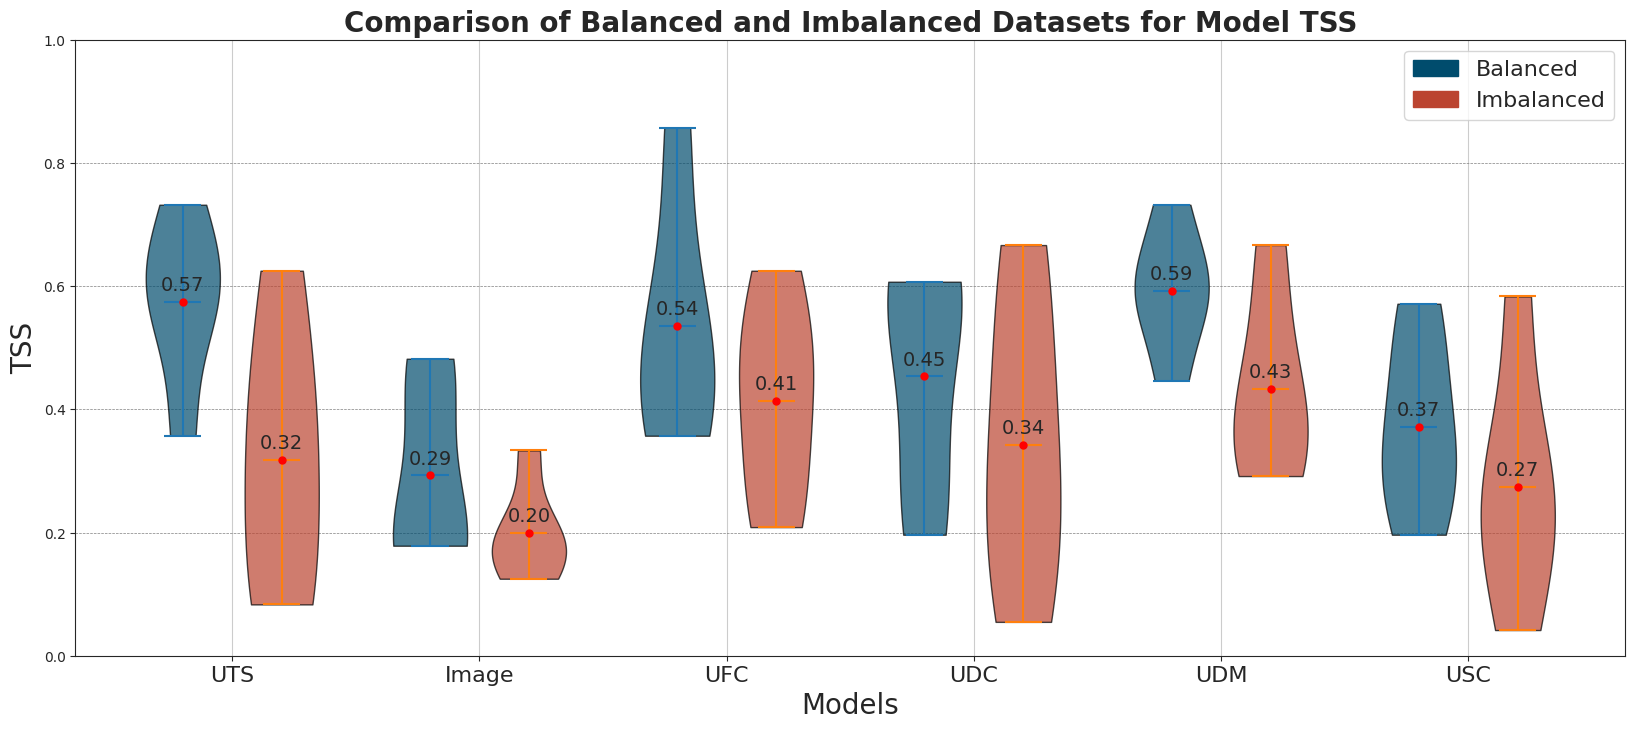

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    lst_TSS_stratified_A_TSF_Uni,
    lst_TSS_stratified_Sequence_TSF,
    lst_TSS_stratified_Concatenation_Uni_TSF,
    TSS_all_Deep_Concatenation,
    TSS_all_Deep_Merge,
    lst_TSS_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    lst_TSS_stratified_A_TSF_Uni_IMB,
    lst_TSS_stratified_Sequence_TSF_IMB,
    lst_TSS_stratified_Concatenation_Uni_TSF_IMB,
    TSS_all_Deep_Concatenation_IMB,
    TSS_all_Deep_Merge_IMB,
    lst_TSS_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('TSS', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model TSS', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_TSS_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-330-f0f5bae34f40>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
<ipython-input-330-f0f5bae34f40>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size


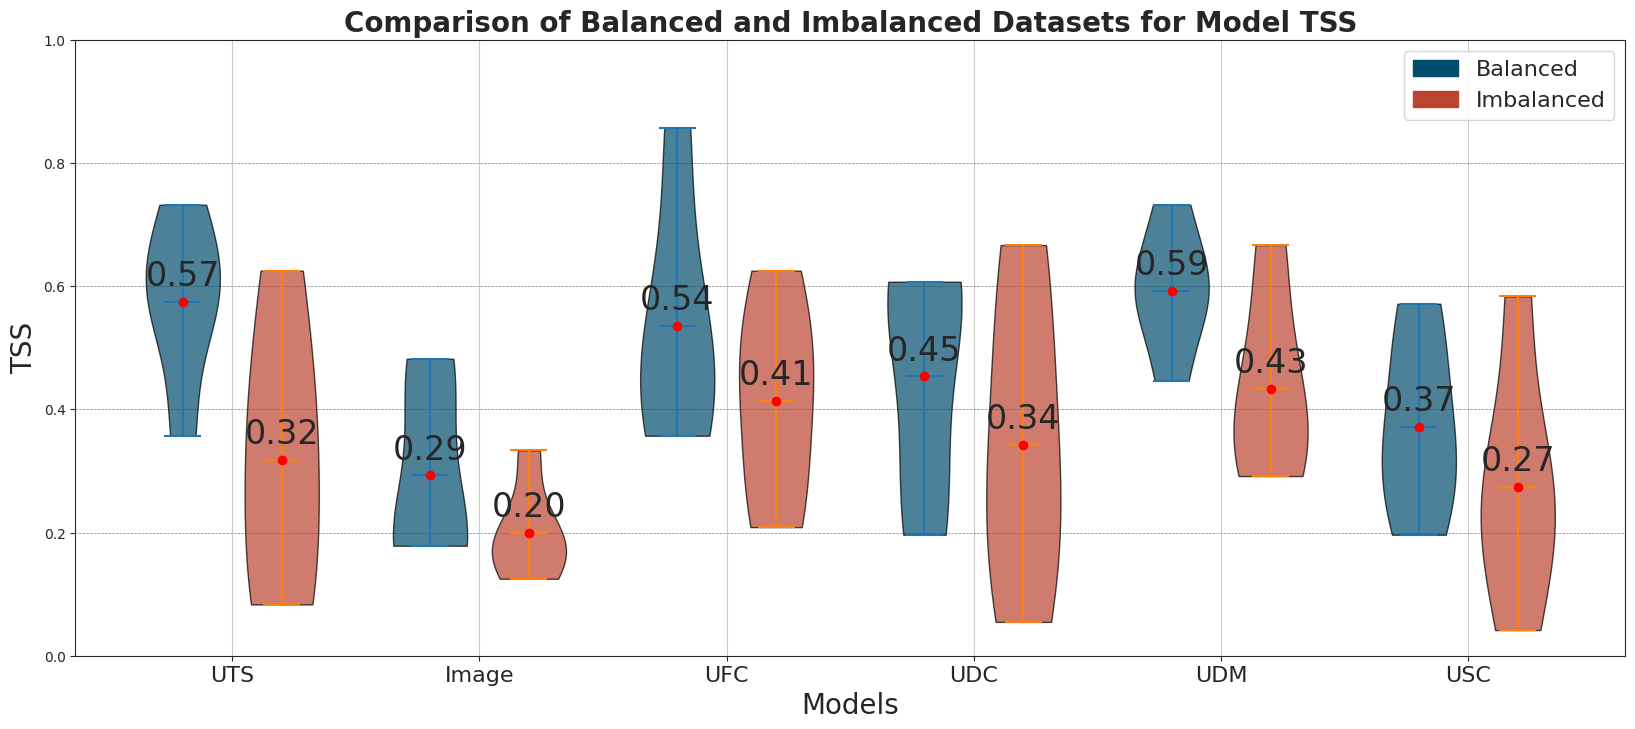

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    lst_TSS_stratified_A_TSF_Uni,
    lst_TSS_stratified_Sequence_TSF,
    lst_TSS_stratified_Concatenation_Uni_TSF,
    TSS_all_Deep_Concatenation,
    TSS_all_Deep_Merge,
    lst_TSS_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    lst_TSS_stratified_A_TSF_Uni_IMB,
    lst_TSS_stratified_Sequence_TSF_IMB,
    lst_TSS_stratified_Concatenation_Uni_TSF_IMB,
    TSS_all_Deep_Concatenation_IMB,
    TSS_all_Deep_Merge_IMB,
    lst_TSS_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('TSS', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model TSS', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Increase font size of values on the plot
for txt in ax.texts:
    txt.set_fontsize(24)

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_TSS_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-331-059cc1f53f07>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
<ipython-input-331-059cc1f53f07>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
<ipython-input-331-059cc1f53f07>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)


Figure saved as Violin-HSS-100L-100MeV.pdf


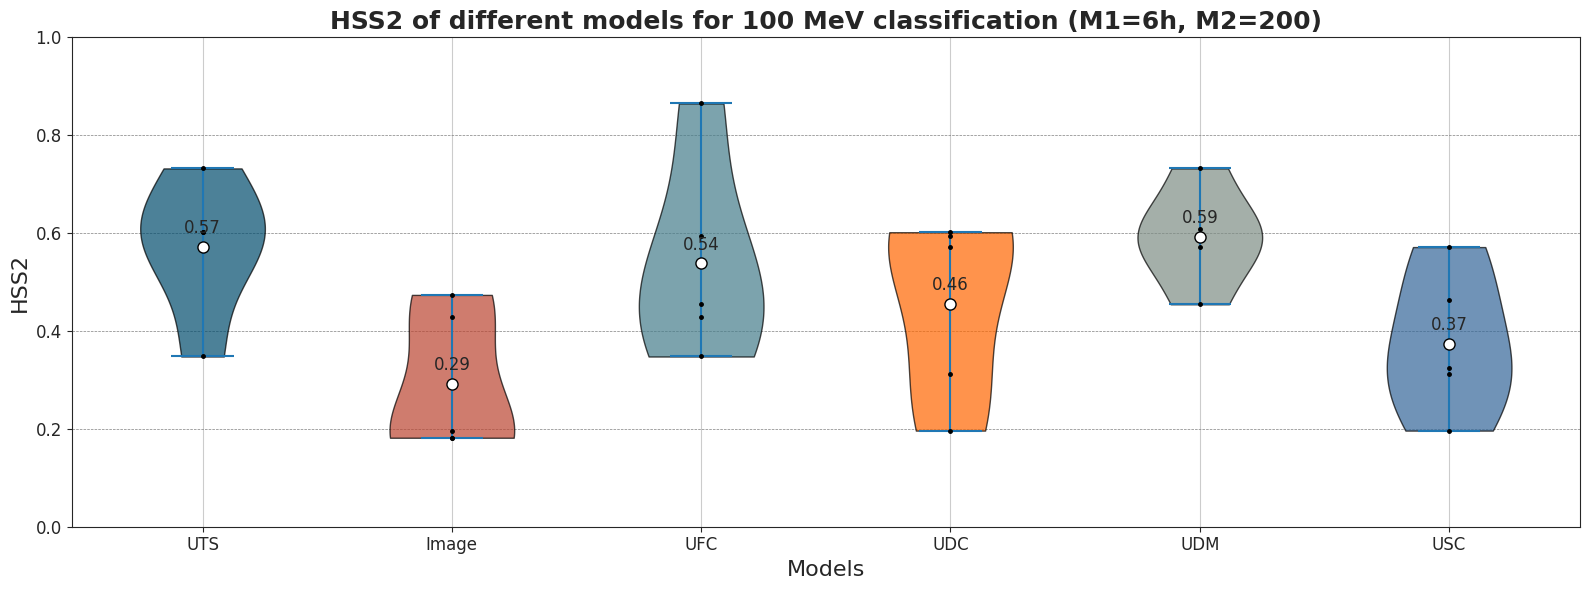

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
list1 = lst_HSS_stratified_A_TSF_Uni
# list2 = lst_HSS_stratified_A_TSF_Multi
list3 = lst_HSS_stratified_Sequence_TSF
list4 = lst_HSS_stratified_Concatenation_Uni_TSF
# list5 = lst_HSS_stratified_Concatenation_Multi_TSF
list6 = HSS_all_Deep_Concatenation
list7 = HSS_all_Deep_Merge
list8 = lst_HSS_stratified_Ensemble_Uni_TSF
# list9 = HSS_all_Approach1
# list10 = HSS_all_Approach2

# Data for violin plot
data = [list1, list3, list4, list6, list7, list8]

# Create violin plot
plt.figure(figsize=(16, 6))
parts = plt.violinplot(data, showmeans=False, showmedians=False)

# Academic colors
colors = ['#004c6d', '#bb4430', '#457d8b', '#ff6600', '#7e8d85', '#336699']

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add labels and title
plt.xlabel('Models', fontsize=16)
plt.ylabel('HSS2', fontsize=16)
plt.title('HSS2 of different models for 100 MeV classification (M1=6h, M2=200)', fontsize=18, fontweight='bold')

# Customize violin plot
plt.xticks(range(1, len(data) + 1), ['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(0, 1)

# Customize font and color
plt.tick_params(axis='both', which='both', labelsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')

# Add markers for means
meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='white')
for i, d in enumerate(data):
    plt.plot(np.ones_like(d) * (i + 1), d, 'k.', markersize=5, color='black')
    plt.plot(i + 1, np.mean(d), 'k.', markersize=8, color='red', **meanprops)
    plt.text(i + 1, np.mean(d) + 0.02, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=12)

# Adjust plot layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('Violin-HSS-100L-100MeV.pdf', format='pdf')

# Display a message indicating successful saving
print("Figure saved as Violin-HSS-100L-100MeV.pdf")


<ipython-input-332-901547e3f5ae>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
<ipython-input-332-901547e3f5ae>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size


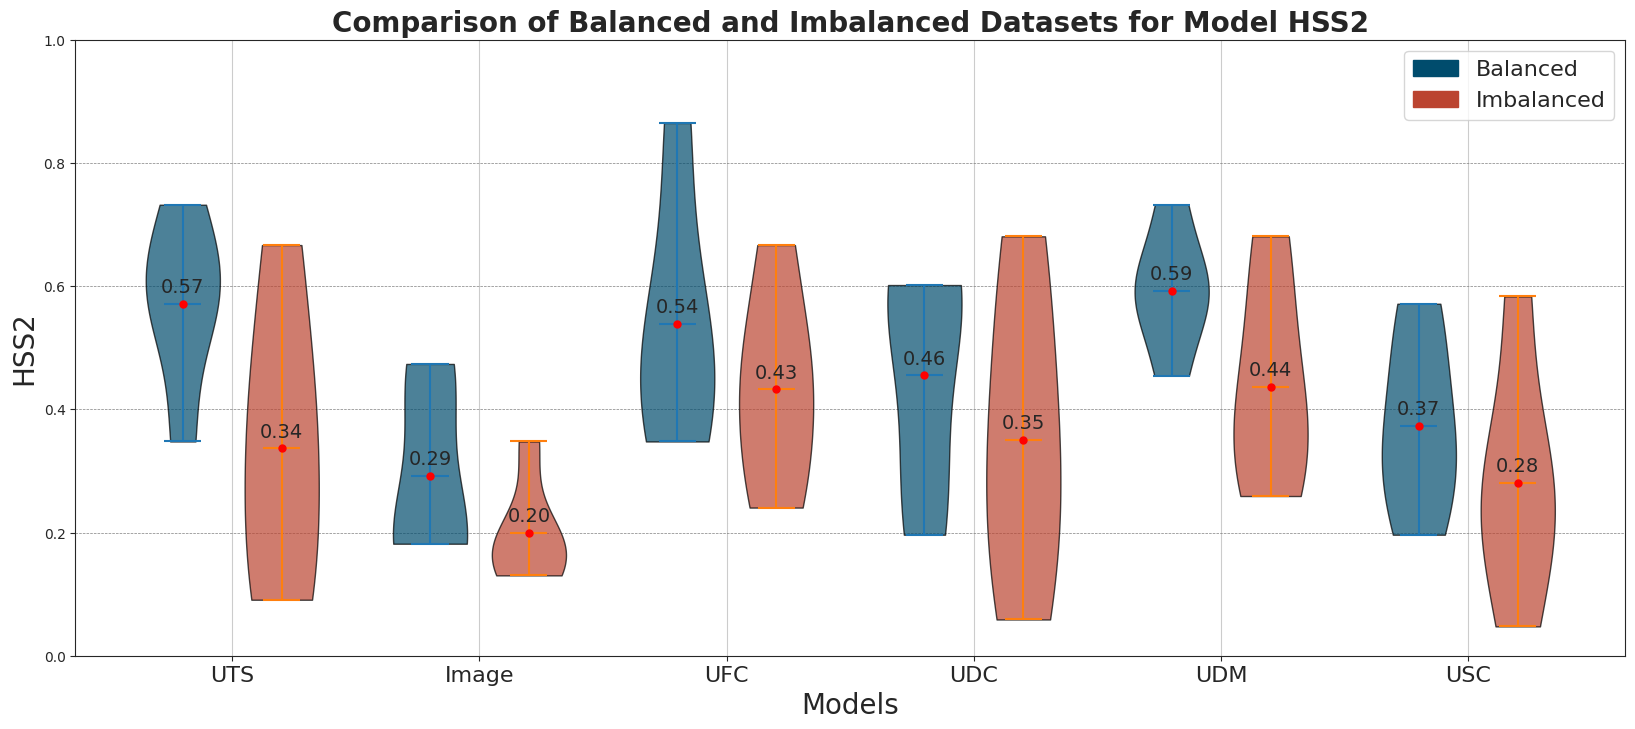

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    lst_HSS_stratified_A_TSF_Uni,
    lst_HSS_stratified_Sequence_TSF,
    lst_HSS_stratified_Concatenation_Uni_TSF,
    HSS_all_Deep_Concatenation,
    HSS_all_Deep_Merge,
    lst_HSS_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    lst_HSS_stratified_A_TSF_Uni_IMB,
    lst_HSS_stratified_Sequence_TSF_IMB,
    lst_HSS_stratified_Concatenation_Uni_TSF_IMB,
    HSS_all_Deep_Concatenation_IMB,
    HSS_all_Deep_Merge_IMB,
    lst_HSS_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=10, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.012, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=14)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('HSS2', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model HSS2', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_HSS_Comparison.pdf', format='pdf')

# Display the plot
plt.show()


<ipython-input-334-225421a9e782>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
<ipython-input-334-225421a9e782>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size


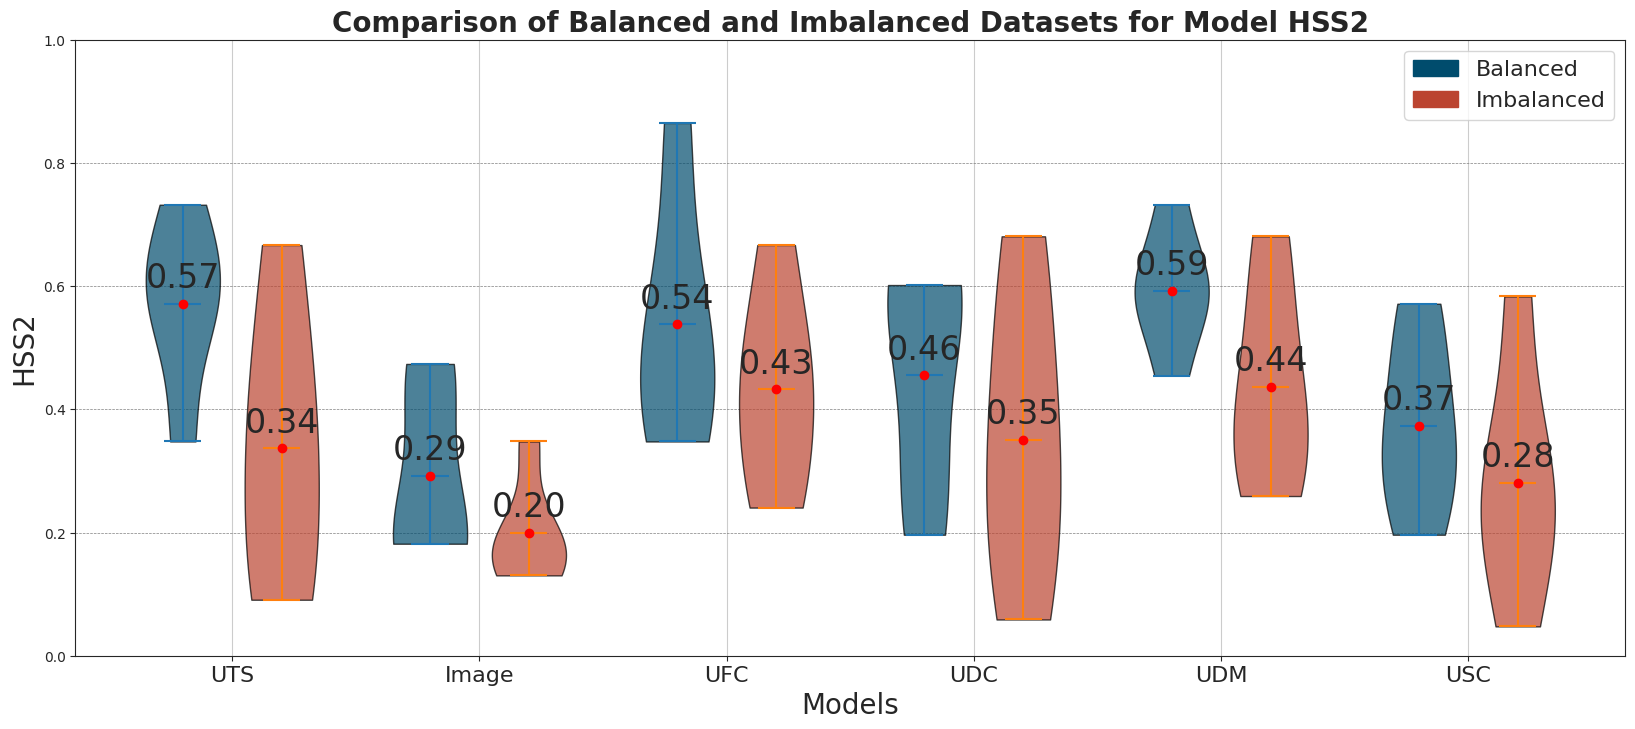

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for balanced dataset
# Sample data for balanced models
data_balanced = [
    lst_HSS_stratified_A_TSF_Uni,
    lst_HSS_stratified_Sequence_TSF,
    lst_HSS_stratified_Concatenation_Uni_TSF,
    HSS_all_Deep_Concatenation,
    HSS_all_Deep_Merge,
    lst_HSS_stratified_Ensemble_Uni_TSF
]

# Sample data for imbalanced dataset
# Sample data for imbalanced models
data_imbalanced = [
    lst_HSS_stratified_A_TSF_Uni_IMB,
    lst_HSS_stratified_Sequence_TSF_IMB,
    lst_HSS_stratified_Concatenation_Uni_TSF_IMB,
    HSS_all_Deep_Concatenation_IMB,
    HSS_all_Deep_Merge_IMB,
    lst_HSS_stratified_Ensemble_Uni_TSF_IMB
]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the figure size

# Positions for each group
positions_balanced = np.arange(len(data_balanced)) * 2
positions_imbalanced = np.arange(len(data_imbalanced)) * 2 + 0.8

# Grouped violin plots for balanced models
parts_balanced = ax.violinplot(data_balanced, positions=positions_balanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_balanced['bodies']:
    pc.set_facecolor('#004c6d')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Grouped violin plots for imbalanced models
parts_imbalanced = ax.violinplot(data_imbalanced, positions=positions_imbalanced, widths=0.6, showmeans=True, showmedians=False)
for pc in parts_imbalanced['bodies']:
    pc.set_facecolor('#bb4430')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add markers for means for balanced models
for i, d in enumerate(data_balanced):
    ax.plot(positions_balanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_balanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add markers for means for imbalanced models
for i, d in enumerate(data_imbalanced):
    ax.plot(positions_imbalanced[i], np.mean(d), 'k.', markersize=12, color='red')  # Increase marker size
    ax.text(positions_imbalanced[i], np.mean(d) + 0.015, f'{np.mean(d):.2f}', ha='center', va='bottom', fontsize=16)  # Increase text size

# Add labels and title
ax.set_xlabel('Models', fontsize=20)  # Increase label font size
ax.set_ylabel('HSS2', fontsize=20)  # Increase label font size
ax.set_title('Comparison of Balanced and Imbalanced Datasets for Model HSS2', fontsize=20, fontweight='bold')  # Increase title font size

# Customize ticks and grid
ax.set_xticks((positions_balanced + positions_imbalanced) / 2)
ax.set_xticklabels(['UTS', 'Image', 'UFC', 'UDC', 'UDM', 'USC'], fontsize=16)  # Increase tick label font size
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.ylim(0, 1)

# Add legend with corrected colors and without markers
legend_labels = ['Balanced', 'Imbalanced']
legend_colors = ['#004c6d', '#bb4430']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=16)  # Increase legend font size

# Increase font size of values on the plot
for txt in ax.texts:
    txt.set_fontsize(24)

# Save the plot as a PDF file
plt.savefig('Grouped_Violin_HSS_Comparison.pdf', format='pdf')

# Display the plot
plt.show()
